# Модель МО для "Вольного Луга"
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
  - Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
  - Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
  
  
С помощью модели нужно отобрать коров по двум критериям:
  - средний удой за год — не менее 6000 килограммов;
  - молоко должно быть вкусным.
  
### Цель исследования:

  1) Изучить исходные данные.\
  2) Изучить и обработать выбросы.\
  3) Провести корреляционный анализ требуемых величин.\
  4) Выполнить задачу регрессии.\
  5) Выполнить задачу классификации.\
  6) Составить требуемый прогноз и представить его в форме итогового вывода.
  
   #### Ход исследования:
  
   Данные получим из файлов ferma_main.csv, ferma_dad.csv, cow_buy.csv. О качестве данных ничего не известно, поэтому необходимо будет тщательно изучить их.
   
   На этапе предобработки данных найдём все пропущенные значения, обработаем их, удалим явные выбросы, избавимся от дубликатов. После этого исследуем зависимости между параметрами, построим необходимые диаграммы и приступим к обучению модели по прогнозам.
   
   Таким образом, работа состоит из следующих этапов:
   
   - обзор полученных данных;
   - предобработка данных;
   - проведение анализа по конкретным столбцам;
   - изучение зависимости удоя от различных признаков;
   - нахождение наиболее сильных связей между признаками;
   - обучение трёх моделей простой линейной регрессии;
   - выбор лучшей модели простой линейной регрессии;
   - обучение модели для задачи классификации;
   - составление требуемых прогнозов;
   - написание общего вывода.

### Загрузка данных

Добавим необходимые для работы библиотеки, откроем исходные данные и сделаем общий обзор по ним.

In [1]:
# Импорт необходимых библиотек:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from scipy import stats as st

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.metrics import (
    r2_score,
    mean_absolute_error as mae,
    mean_squared_error as mse,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

In [2]:
# Открытие файлов, вывод общей информации по ним:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

print(ferma_main.info(), '\n')
print(ferma_dad.info(), '\n')
print(cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Сразу видно несоответствие количества коров в первой таблице и их id во второй. Попытаемся на этом же этапе выяснить причину.

In [3]:
# Выведем последние строки первой таблицы:
display(ferma_main.tail(10))

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
624  625      6812                                  15,4              1964   
625  626      5513                                  12,9              1700   
626  627      5970                                  14,4              1837   
627  628      5746                                  13,8              1994   
628  629      6503                                  16,2              2283   
629  627      5970                                  14,4              1837   
630  627      5970                                  14,4              1837   
631  627      5970                                  14,4              1837   
632  627      5970                                  14,4              1837   
633  627      5970                                  14,4              1837   

    СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
624                                 0,94  РефлешнСоверинг    Равнинное   
625                                 0,88  РефлешнСоверинг    Равнинное   
626                                 0,88  РефлешнСоверинг    Холмистое   
627                                 0,89  РефлешнСоверинг    Равнинное   
628                                 0,94   Вис Бик Айдиал    Холмистое   
629                                 0,88  РефлешнСоверинг    Холмистое   
630                                 0,88  РефлешнСоверинг    Холмистое   
631                                 0,88  РефлешнСоверинг    Холмистое   
632                                 0,88  РефлешнСоверинг    Холмистое   
633                                 0,88  РефлешнСоверинг    Холмистое   

    порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
624           Айдиал       3,74   3,075   не вкусно  более_2_лет  
625          Соверин       3,64   3,073      вкусно  менее_2_лет  
626          Соверин       3,64   3,075   не вкусно  более_2_лет  
627          Соверин       3,64   3,077      вкусно  более_2_лет  
628          Соверин       3,71   3,076      вкусно  более_2_лет  
629          Соверин       3,64   3,075   не вкусно  более_2_лет  
630          Соверин       3,64   3,075   не вкусно  более_2_лет  
631          Соверин       3,64   3,075   не вкусно  более_2_лет  
632          Соверин       3,64   3,075   не вкусно  более_2_лет  
633          Соверин       3,64   3,075   не вкусно  более_2_лет

Причиной несоответствия стали явные дубликаты: корова с id 627 встречается в таблице целых 6 раз.

#### Вывод:
По предварительной оценке данных можно сказать о том, что в первой и третьей таблице необходимо изменить названия некоторых столбцов, а также изменить типы данных в столбцах с количественными данными.

###  Предобработка данных

Первым делом удалим явные дубликаты.

In [4]:
# Удалим явные дубликаты из всех таблиц (если таковые имеются):
ferma_main = ferma_main.drop_duplicates()
ferma_dad = ferma_dad.drop_duplicates()

# Проверим результат:
print(ferma_main.info(), '\n')
print(ferma_dad.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     629 non-null    int64 
 1   Удой, кг                               629 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    object
 3   Сырой протеин, г                       629 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    object
 5   Порода                                 629 non-null    object
 6   Тип пастбища                           629 non-null    object
 7   порода папы_быка                       629 non-null    object
 8   Жирность,%                             629 non-null    object
 9   Белок,%                                629 non-null    object
 10  Вкус молока                            629 non-null    object
 11  Возраст            

Удаление прошло успешно: количество id коров в первой и второй таблицах теперь совпадает; кроме того, третья таблица теперь также содержит 16 строк вместо 20.

In [5]:
# Проверка на неявные дубликаты:
print('Дубликаты в первой таблице:', ferma_main['id'].duplicated().sum())
print('Дубликаты во второй таблице:', ferma_dad['id'].duplicated().sum())

Дубликаты в первой таблице: 0
Дубликаты во второй таблице: 0


Теперь переименуем названия столбцов в первой и третьей таблицах так, чтобы они соответствовали друг другу.

In [6]:
# Переименуем столбцы "ferma_main":
ferma_main = ferma_main.rename(columns={'порода папы_быка': 'Порода папы быка'})

# Переименуем столбцы "ferma_dad":
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'Имя папы'})

# Переименуем столбцы "cow_buy":
cow_buy = cow_buy.rename(columns={'порода папы_быка': 'Порода папы быка', 'Имя_папы': 'Имя папы',
                                  'Текущая_жирность,%': 'Жирность,%', 'Текущий_уровень_белок,%': 'Белок,%'})

#Проверим результат:
print(ferma_main.columns, '\n')
print(ferma_dad.columns, '\n')
print(cow_buy.columns)

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'Порода папы быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object') 

Index(['id', 'Имя папы'], dtype='object') 

Index(['Порода', 'Тип пастбища', 'Порода папы быка', 'Имя папы', 'Жирность,%',
       'Белок,%', 'Возраст'],
      dtype='object')


Изменим типы данных в столбцах первой и третьей таблиц. Для этого необходимо изменить запись данных в столбцах: поменять запятые на точки; чтобы сделать это, воспользуемся лямбда-функцией.

In [7]:
# Замена запятых на точки:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.')
ferma_main['СПО (Сахаро-протеиновое соотношение)'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].str.replace(',', '.')
ferma_main['Жирность,%'] = ferma_main['Жирность,%'].str.replace(',', '.')
ferma_main['Белок,%'] = ferma_main['Белок,%'].str.replace(',', '.')

cow_buy['Жирность,%'] = cow_buy['Жирность,%'].str.replace(',', '.')
cow_buy['Белок,%'] = cow_buy['Белок,%'].str.replace(',', '.')

In [8]:
# Меняем тип данных в "ferma_main":
ferma_main['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].astype('float')
ferma_main['СПО (Сахаро-протеиновое соотношение)'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].astype('float')
ferma_main['Жирность,%'] = ferma_main['Жирность,%'].astype('float')
ferma_main['Белок,%'] = ferma_main['Белок,%'].astype('float')

# Меняем тип данных в "cow_buy":
cow_buy['Жирность,%'] = cow_buy['Жирность,%'].astype('float')
cow_buy['Белок,%'] = cow_buy['Белок,%'].astype('float')

# Проверяем результат:
print(ferma_main.info(), '/n')
print(cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   Порода папы быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

Возраст является количественной характеристикой, однако формат записи не позволяет заменить тип данных в этом столбце. Поэтому создадим новый столбец, в котором отобразим тип возраста: менее 2 лет - 1 тип, более 2 лет - 2 тип.

In [9]:
# Напишем функцию для определния типа возраста:
def age_cat(age):
    if age == 'менее_2_лет':
        return 1
    if age == 'более_2_лет':
        return 2
    
# Применим функцию для создания нового столбца:
ferma_main['Тип возраста'] = ferma_main['Возраст'].apply(age_cat)
cow_buy['Тип возраста'] = cow_buy['Возраст'].apply(age_cat)

# Посмотрим на результат:
display(ferma_main.head())
print()
display(cow_buy.head())

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  Тип возраста  
0           Айдиал        3.58    3.076      вкусно  более_2_лет             2  
1          Соверин        3.54    3.079      вкусно  менее_2_лет             1  
2          Соверин        3.59    3.074   не вкусно  более_2_лет             2  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет             2  
4          Соверин        3.73    3.073      вкусно  менее_2_лет             1

Порода Тип пастбища Порода папы быка  Имя папы  Жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес        3.58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный        3.54   
2  РефлешнСоверинг    равнинное          Соверин     Барин        3.59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный        3.40   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный        3.64   

   Белок,%      Возраст  Тип возраста  
0    3.076  более_2_лет             2  
1    3.081  менее_2_лет             1  
2    3.074  более_2_лет             2  
3    3.061  более_2_лет             2  
4    3.074  более_2_лет             2

Проверим корректность работы функции.

In [10]:
# Посмотрим на уникальные значения нового столбца:
print(ferma_main['Тип возраста'].unique())
print()
print(cow_buy['Тип возраста'].unique())

[2 1]

[2 1]


Проверим запись данных в качественных признаках.

In [11]:
# Вывод уникальных значений для ferma_main:
print(ferma_main['Порода'].unique())
print(ferma_main['Тип пастбища'].unique())
print(ferma_main['Порода папы быка'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']


Один и тот же тип пастбища записан иначе, порода папы быка также некорректна. А что в таблице "cow_buy"?

In [12]:
# Вывод уникальных значений для cow_buy:
print(cow_buy['Порода'].unique())
print(cow_buy['Тип пастбища'].unique())
print(cow_buy['Порода папы быка'].unique())
print(cow_buy['Имя папы'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


In [13]:
# Проверим на всякий случай и датафрейм "ferma_dad":
print(ferma_dad['Имя папы'].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


В "cow_buy" дела обстоят получше, однако тип пастбищ можно переписать с заглавных букв. Исправим обнаруженные недочёты.

In [14]:
# Исправления для "ferma_main":
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace('Равнинные', 'Равнинное', regex = True)
ferma_main['Порода папы быка'] = ferma_main['Порода папы быка'].replace('Айдиалл', 'Айдиал', regex = True)

# Исправления для "cow_buy":
cow_buy['Тип пастбища'] = (cow_buy['Тип пастбища'].replace('равнинное', 'Равнинное', regex = True)
                                                 .replace('холмистое', 'Холмистое', regex = True))
    
# Проверка результата:
print(ferma_main['Тип пастбища'].unique())
print(ferma_main['Порода папы быка'].unique())
print(cow_buy['Тип пастбища'].unique())

['Равнинное' 'Холмистое']
['Айдиал' 'Соверин']
['Холмистое' 'Равнинное']


Все неточности успешно обработаны.

#### Вывод:
В ходе предобработки данных была проделана следующая работа:
  - удалены явные дубликаты; 
  - названия столбцов скорректированы; 
  - изменены типы данных в столбцах с количественными данными; 
  - исправлены неточности в записи качественных данных;
  - добавлен новый столбец "Тип возраста", необходимый для дальнейшего анализа.
  
Вся необходимая подготовка завершена.

### Исследовательский анализ данных

Проведём статистический анализ всех характеристик из таблицы "ferma_main": посмотрим на общее распределение величин, на наличие выбросов и т.д. Для лучшего результата построим для каждой графики (гистограммы, графики размаха и т.д.). Начнём анализ с количественных данных.

Построим boxplot'ы для характеристик корма коров. Сравнивать будем относительно пород коров (их всего две).

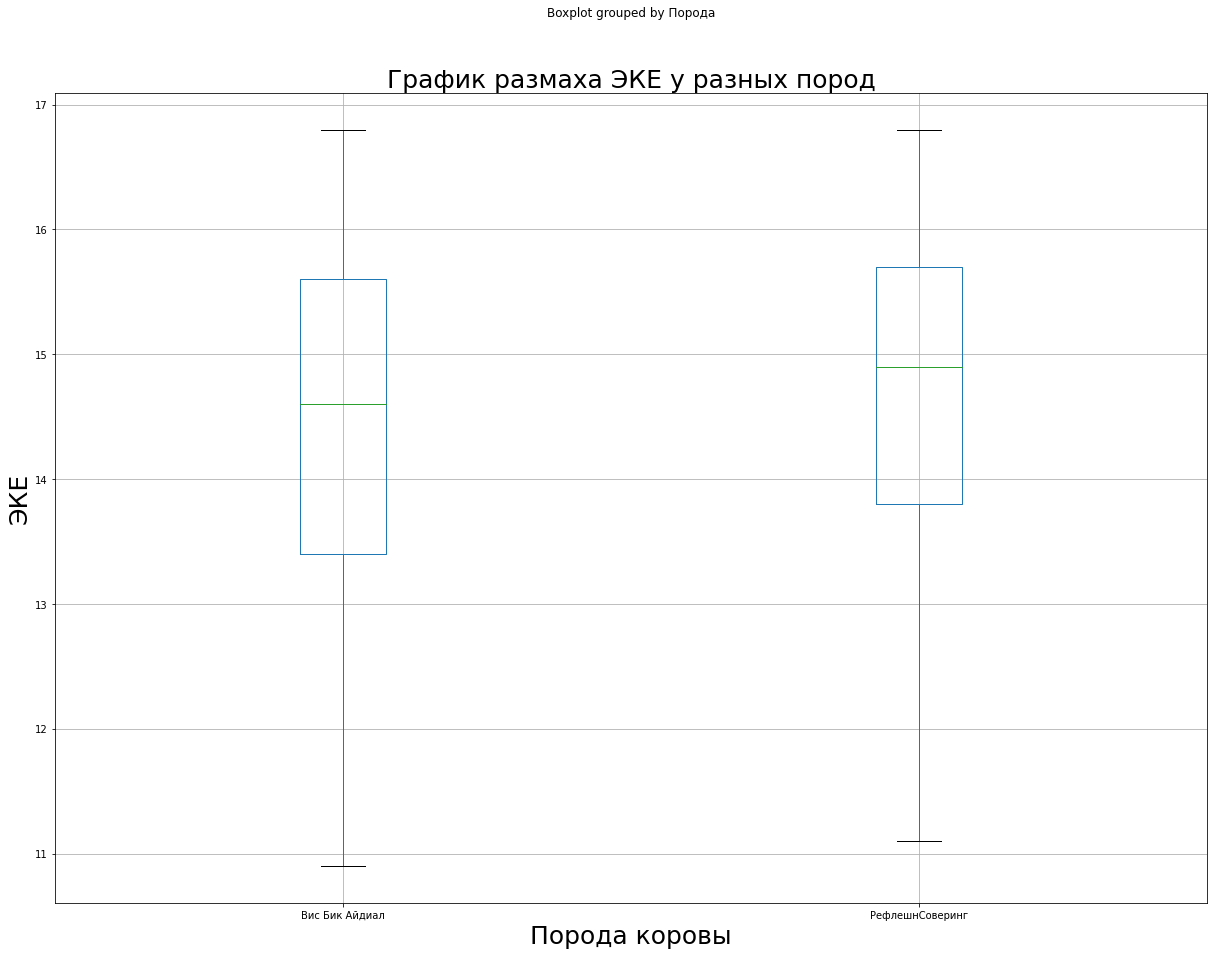

count       mean       std   min   25%   50%   75%   max
Порода                                                                   
Вис Бик Айдиал   373.0  14.436729  1.327325  10.9  13.4  14.6  15.6  16.8
РефлешнСоверинг  256.0  14.700000  1.261652  11.1  13.8  14.9  15.7  16.8

In [15]:
# График размаха для ЭКЕ:
ferma_main.boxplot(column='ЭКЕ (Энергетическая кормовая единица)', by='Порода', figsize=(20, 15))
plt.title('График размаха ЭКЕ у разных пород', fontsize=25)
plt.ylabel('ЭКЕ', fontsize=25)
plt.xlabel('Порода коровы', fontsize=25)
plt.show()

ferma_main.groupby('Порода')['ЭКЕ (Энергетическая кормовая единица)'].describe()

По графику видно, что выбросы в данных отсутствуют; кроме этого, у обеих пород характеристика имеет схожие значения (у Вис Бик Айдиал нижняя граница чуть ниже, однако это большой роли не играет).

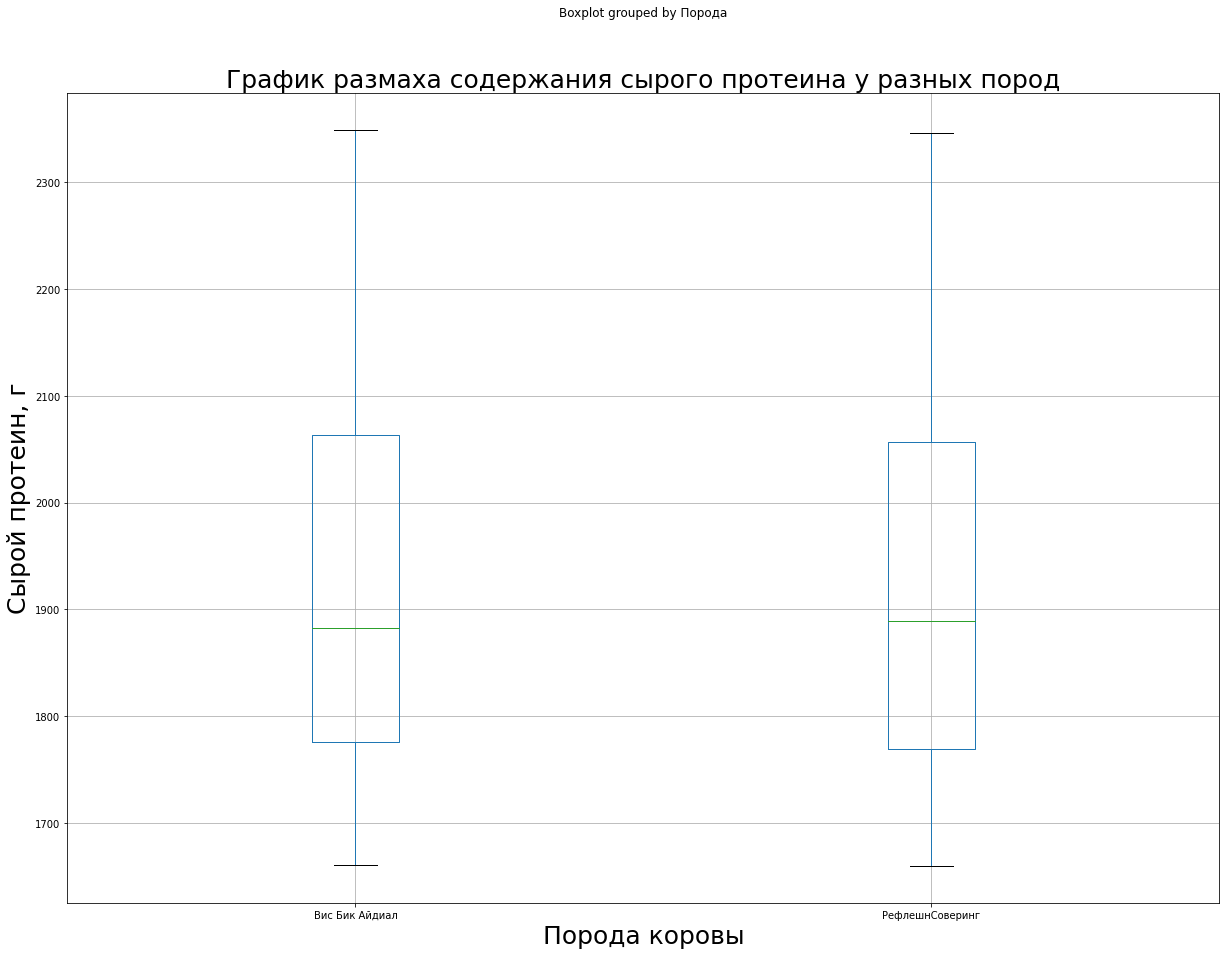

count         mean         std     min     25%     50%  \
Порода                                                                    
Вис Бик Айдиал   373.0  1921.957105  182.111786  1661.0  1776.0  1883.0   
РефлешнСоверинг  256.0  1925.414062  184.517964  1660.0  1769.0  1889.5   

                    75%     max  
Порода                           
Вис Бик Айдиал   2063.0  2349.0  
РефлешнСоверинг  2056.5  2346.0

In [16]:
# График размаха для сырого протеина:
ferma_main.boxplot(column='Сырой протеин, г', by='Порода', figsize=(20, 15))
plt.title('График размаха содержания сырого протеина у разных пород', fontsize=25)
plt.ylabel('Сырой протеин, г', fontsize=25)
plt.xlabel('Порода коровы', fontsize=25)
plt.show()

ferma_main.groupby('Порода')['Сырой протеин, г'].describe()

По содержанию сырого белка в корме данные практически совпадают.

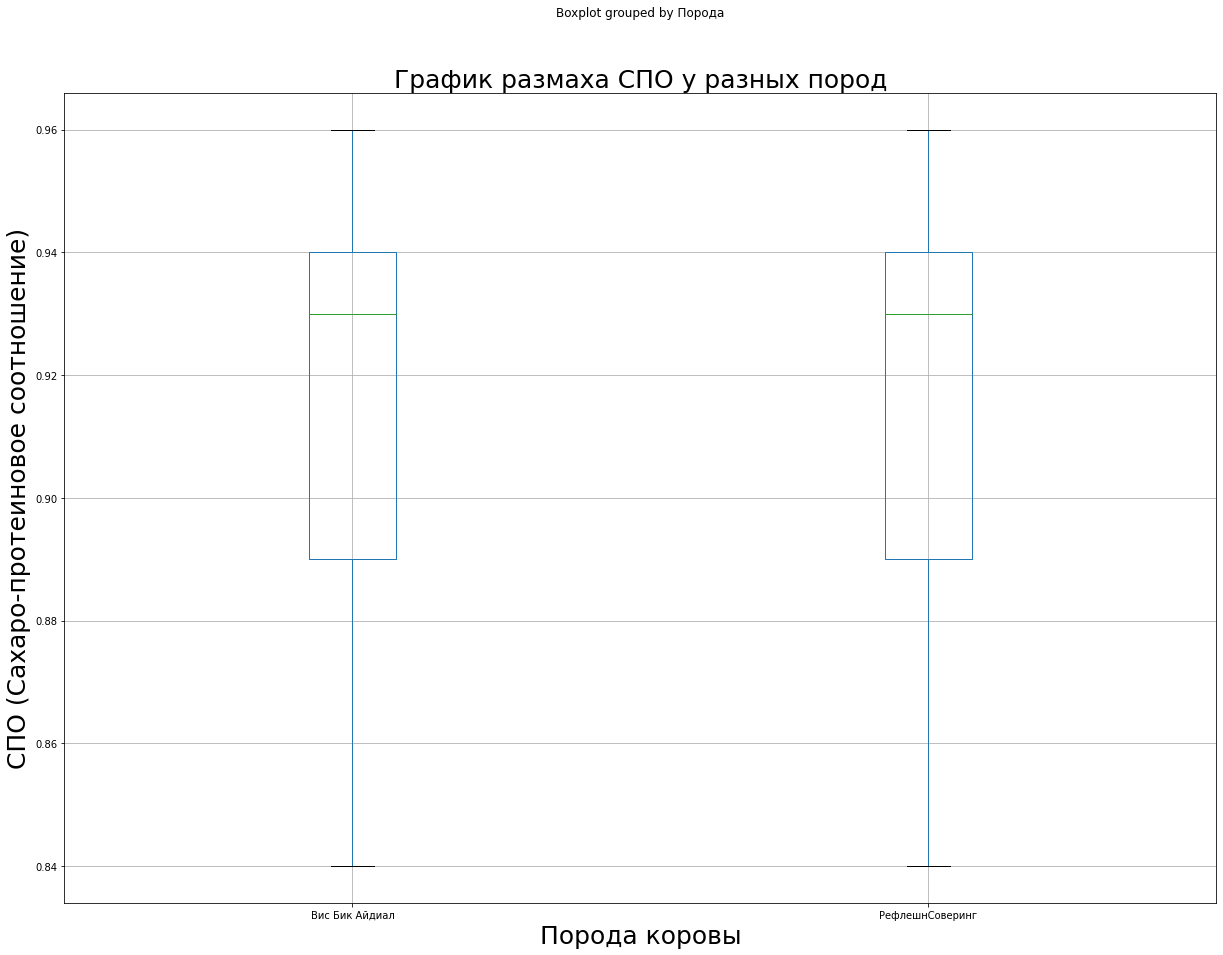

count      mean       std   min   25%   50%   75%   max
Порода                                                                  
Вис Бик Айдиал   373.0  0.911488  0.032826  0.84  0.89  0.93  0.94  0.96
РефлешнСоверинг  256.0  0.915488  0.031183  0.84  0.89  0.93  0.94  0.96

In [17]:
# График размаха для СПО:
ferma_main.boxplot(column='СПО (Сахаро-протеиновое соотношение)', by='Порода', figsize=(20, 15))
plt.title('График размаха СПО у разных пород', fontsize=25)
plt.ylabel('СПО (Сахаро-протеиновое соотношение)', fontsize=25)
plt.xlabel('Порода коровы', fontsize=25)
plt.show()

ferma_main.groupby('Порода')['СПО (Сахаро-протеиновое соотношение)'].describe()

Также всё идентично.

##### Промежуточный вывод:
По своим характеристикам корм у всех коров идентичный, соотношения для конкретных особей не выделяются на общем фоне. Явных выбросов не обнаружено.

Посмотрим на удой коров в зависимости от их породы.

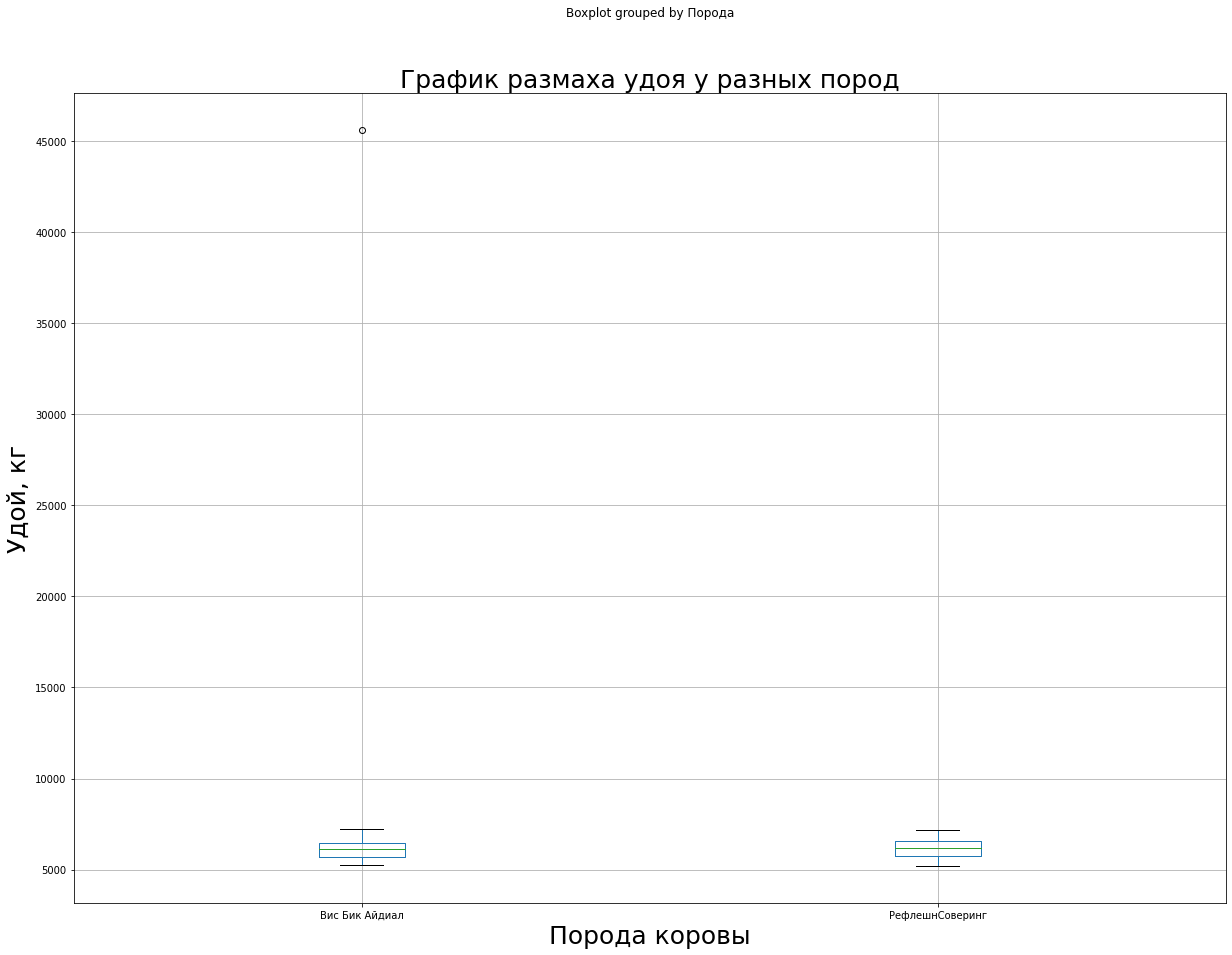

count         mean          std     min     25%     50%  \
Порода                                                                     
Вис Бик Айдиал   373.0  6205.348525  2097.569359  5242.0  5716.0  6112.0   
РефлешнСоверинг  256.0  6164.566406   493.026392  5204.0  5771.0  6178.5   

                     75%      max  
Порода                             
Вис Бик Айдиал   6469.00  45616.0  
РефлешнСоверинг  6559.25   7201.0

In [18]:
# График размаха для удоя:
ferma_main.boxplot(column='Удой, кг', by='Порода', figsize=(20, 15))
plt.title('График размаха удоя у разных пород', fontsize=25)
plt.ylabel('Удой, кг', fontsize=25)
plt.xlabel('Порода коровы', fontsize=25)
plt.show()

ferma_main.groupby('Порода')['Удой, кг'].describe()

Интересно, одна особь породы Вис Бик Айдиал "работает" за девятерых. Возможно, забыли поставить запятую перед последней цифрой, хотя тогда значение получается слишком маленьким и также выбивается из выборки. Удалим явный выброс.

In [19]:
# Удаляем обнаруженный выброс:
ferma_main = ferma_main[ferma_main['Удой, кг'] < 10000]

# Проверяем:
ferma_main.groupby('Порода')['Удой, кг'].describe()

count         mean         std     min     25%     50%  \
Порода                                                                    
Вис Бик Айдиал   372.0  6099.405914  462.472692  5242.0  5715.5  6112.0   
РефлешнСоверинг  256.0  6164.566406  493.026392  5204.0  5771.0  6178.5   

                     75%     max  
Порода                            
Вис Бик Айдиал   6468.25  7222.0  
РефлешнСоверинг  6559.25  7201.0

Далее исследуем данные по характеристике молока.

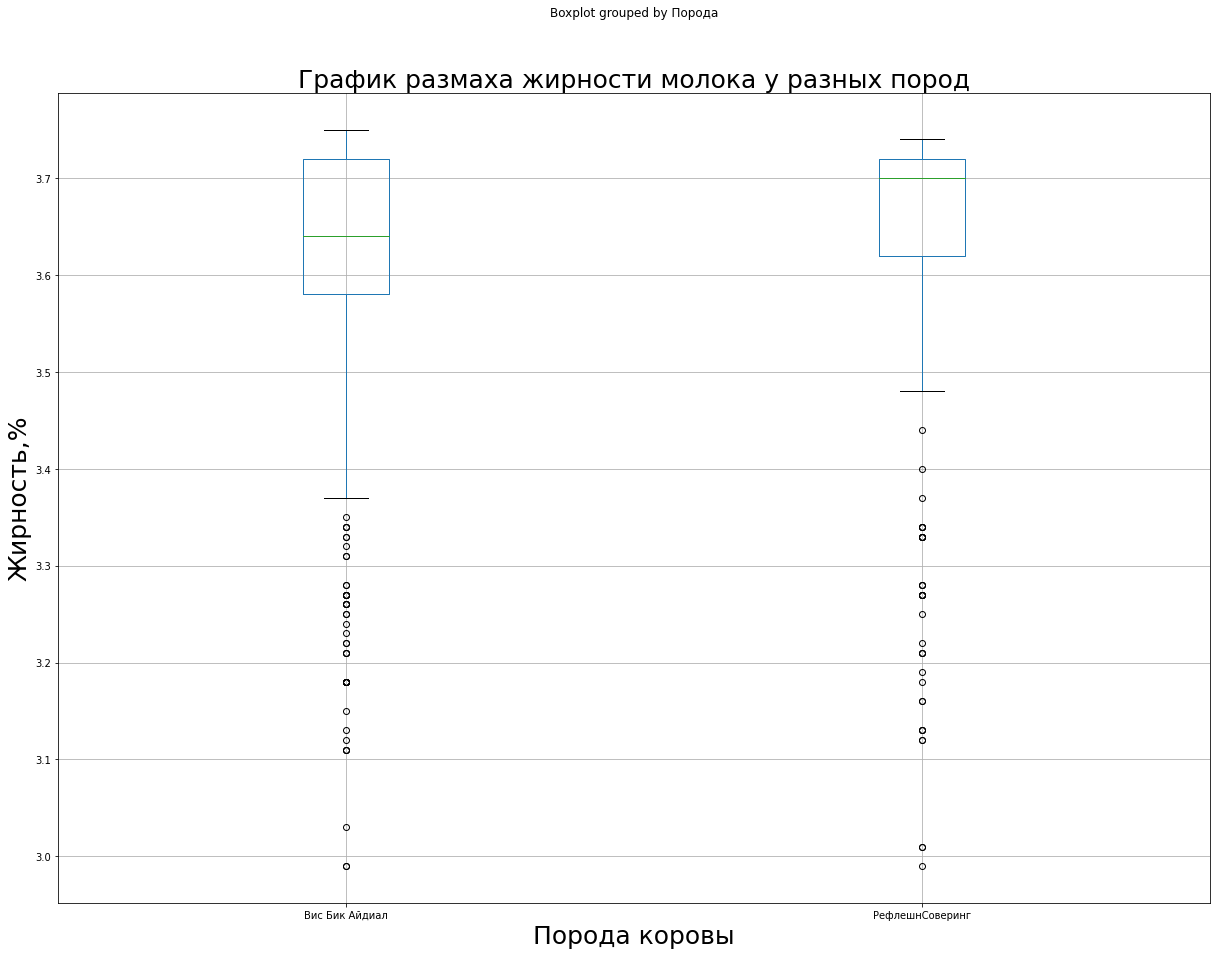

count      mean       std   min   25%   50%   75%   max
Порода                                                                  
Вис Бик Айдиал   372.0  3.596935  0.167189  2.99  3.58  3.64  3.72  3.75
РефлешнСоверинг  256.0  3.614922  0.169157  2.99  3.62  3.70  3.72  3.74

In [20]:
# График размаха по жирности молока:
ferma_main.boxplot(column='Жирность,%', by='Порода', figsize=(20, 15))
plt.title('График размаха жирности молока у разных пород', fontsize=25)
plt.ylabel('Жирность,%', fontsize=25)
plt.xlabel('Порода коровы', fontsize=25)
plt.show()

ferma_main.groupby('Порода')['Жирность,%'].describe()

Максимальные значения одинаковы для обеих пород, как и минимальные. Примерно схожее количество особей (около 40 в сумме) в каждой группе имеют показатели ниже крайних границ. Ввиду малого количества эти данные можно удалить, но пока этого делать не будем.

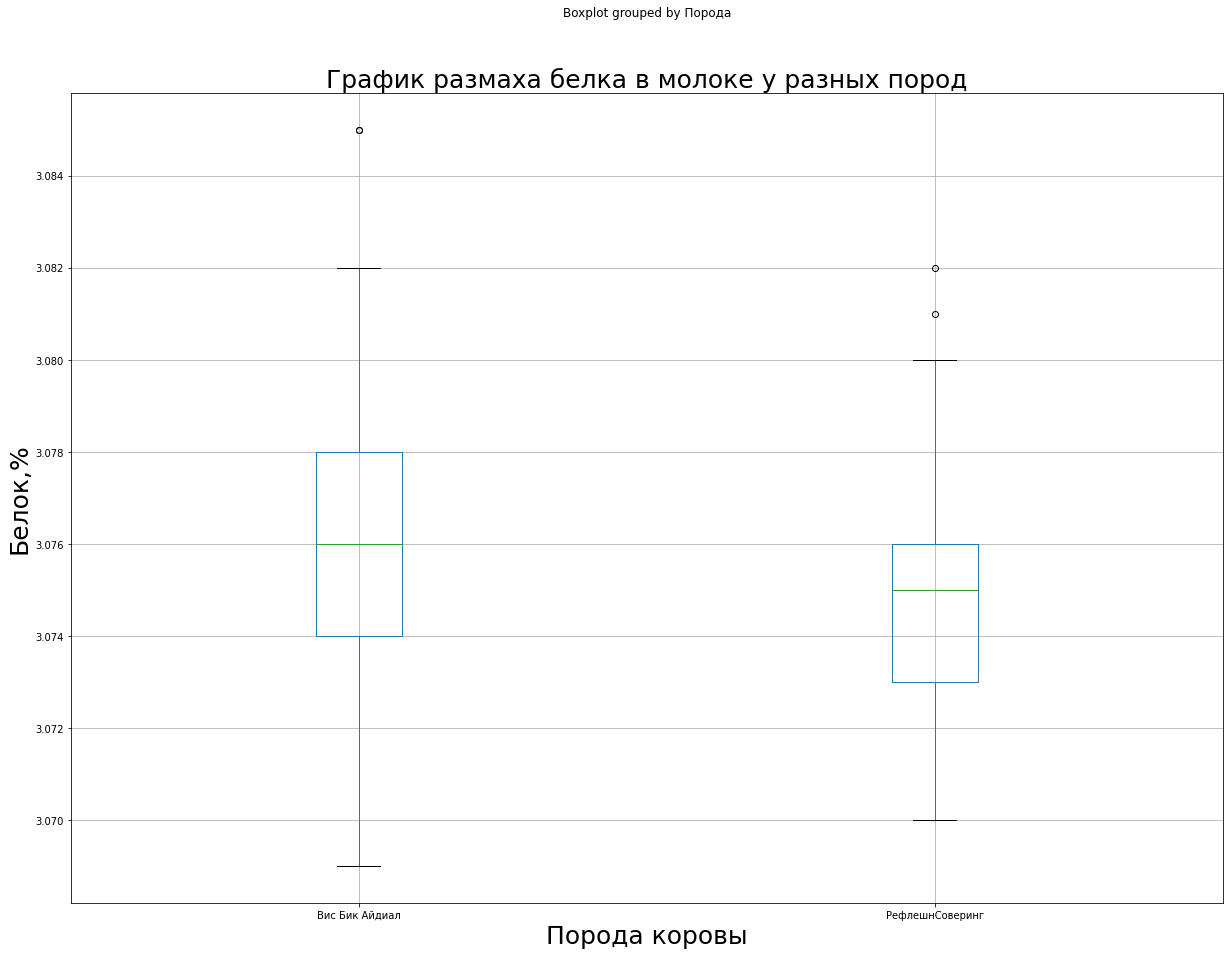

count      mean       std    min    25%    50%    75%    max
Порода                                                                       
Вис Бик Айдиал   372.0  3.076274  0.002477  3.069  3.074  3.076  3.078  3.085
РефлешнСоверинг  256.0  3.074793  0.002403  3.070  3.073  3.075  3.076  3.082

In [21]:
# График размаха по белку в молоке:
ferma_main.boxplot(column='Белок,%', by='Порода', figsize=(20, 15))
plt.title('График размаха белка в молоке у разных пород', fontsize=25)
plt.ylabel('Белок,%', fontsize=25)
plt.xlabel('Порода коровы', fontsize=25)
plt.show()

ferma_main.groupby('Порода')['Белок,%'].describe()

У трёх особей есть выдающиеся значения в группах, однако сами по себе эти значения не выбиваются из общей картины, поэтому удалять их не будем.

Теперь посмотрим на эти зависимости с помощью гистограмм.

In [22]:
# Разделим датафрейм на два по породе коровы:
vis_bik = ferma_main[ferma_main['Порода']=='Вис Бик Айдиал']
ref_sov = ferma_main[ferma_main['Порода']=='РефлешнСоверинг']
display(vis_bik)
display(ref_sov)

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      1      5863                                   14.2              1743   
1      2      5529                                   12.8              2138   
4      5      5302                                   12.8              1675   
6      7      5910                                   13.2              1792   
7      8      6179                                   14.7              1806   
..   ...       ...                                    ...               ...   
612  613      6139                                   14.6              1967   
617  618      6395                                   14.4              2121   
618  619      6692                                   15.8              2028   
621  622      6201                                   14.3              1840   
628  629      6503                                   16.2              2283   

     СПО (Сахаро-протеиновое соотношение)          Порода Тип пастбища  \
0                                   0.890  Вис Бик Айдиал    Равнинное   
1                                   0.890  Вис Бик Айдиал    Равнинное   
4                                   0.885  Вис Бик Айдиал    Равнинное   
6                                   0.885  Вис Бик Айдиал    Равнинное   
7                                   0.930  Вис Бик Айдиал    Равнинное   
..                                    ...             ...          ...   
612                                 0.940  Вис Бик Айдиал    Равнинное   
617                                 0.930  Вис Бик Айдиал    Холмистое   
618                                 0.940  Вис Бик Айдиал    Равнинное   
621                                 0.940  Вис Бик Айдиал    Равнинное   
628                                 0.940  Вис Бик Айдиал    Холмистое   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0             Айдиал        3.58    3.076      вкусно  более_2_лет   
1            Соверин        3.54    3.079      вкусно  менее_2_лет   
4            Соверин        3.73    3.073      вкусно  менее_2_лет   
6            Соверин        3.48    3.077      вкусно  более_2_лет   
7             Айдиал        3.55    3.076      вкусно  более_2_лет   
..               ...         ...      ...         ...          ...   
612           Айдиал        3.64    3.080      вкусно  более_2_лет   
617           Айдиал        3.64    3.074   не вкусно  более_2_лет   
618           Айдиал        3.73    3.079      вкусно  более_2_лет   
621           Айдиал        3.64    3.080   не вкусно  более_2_лет   
628          Соверин        3.71    3.076      вкусно  более_2_лет   

     Тип возраста  
0               2  
1               1  
4               1  
6               2  
7               2  
..            ...  
612             2  
617             2  
618             2  
621             2  
628             2  

[372 rows x 13 columns]

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
2      3      5810                                   14.0              1854   
3      4      5895                                   12.4              2012   
5      6      5254                                   12.7              1806   
8      9      6783                                   14.2              1918   
10    11      5591                                   13.7              1678   
..   ...       ...                                    ...               ...   
623  624      5928                                   13.6              1832   
624  625      6812                                   15.4              1964   
625  626      5513                                   12.9              1700   
626  627      5970                                   14.4              1837   
627  628      5746                                   13.8              1994   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
2                                   0.885  РефлешнСоверинг    Холмистое   
3                                   0.885  РефлешнСоверинг    Холмистое   
5                                   0.885  РефлешнСоверинг    Холмистое   
8                                   0.940  РефлешнСоверинг    Холмистое   
10                                  0.895  РефлешнСоверинг    Холмистое   
..                                    ...              ...          ...   
623                                 0.880  РефлешнСоверинг    Холмистое   
624                                 0.940  РефлешнСоверинг    Равнинное   
625                                 0.880  РефлешнСоверинг    Равнинное   
626                                 0.880  РефлешнСоверинг    Холмистое   
627                                 0.890  РефлешнСоверинг    Равнинное   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
2            Соверин        3.59    3.074   не вкусно  более_2_лет   
3             Айдиал        3.40    3.075   не вкусно  более_2_лет   
5            Соверин        3.13    3.078      вкусно  менее_2_лет   
8             Айдиал        3.71    3.077      вкусно  более_2_лет   
10            Айдиал        3.13    3.075      вкусно  менее_2_лет   
..               ...         ...      ...         ...          ...   
623          Соверин        3.64    3.077   не вкусно  более_2_лет   
624           Айдиал        3.74    3.075   не вкусно  более_2_лет   
625          Соверин        3.64    3.073      вкусно  менее_2_лет   
626          Соверин        3.64    3.075   не вкусно  более_2_лет   
627          Соверин        3.64    3.077      вкусно  более_2_лет   

     Тип возраста  
2               2  
3               2  
5               1  
8               2  
10              1  
..            ...  
623             2  
624             2  
625             1  
626             2  
627             2  

[256 rows x 13 columns]

Замечание: сразу видно, что коров Вис Бик Айдиал на 120 голов больше.

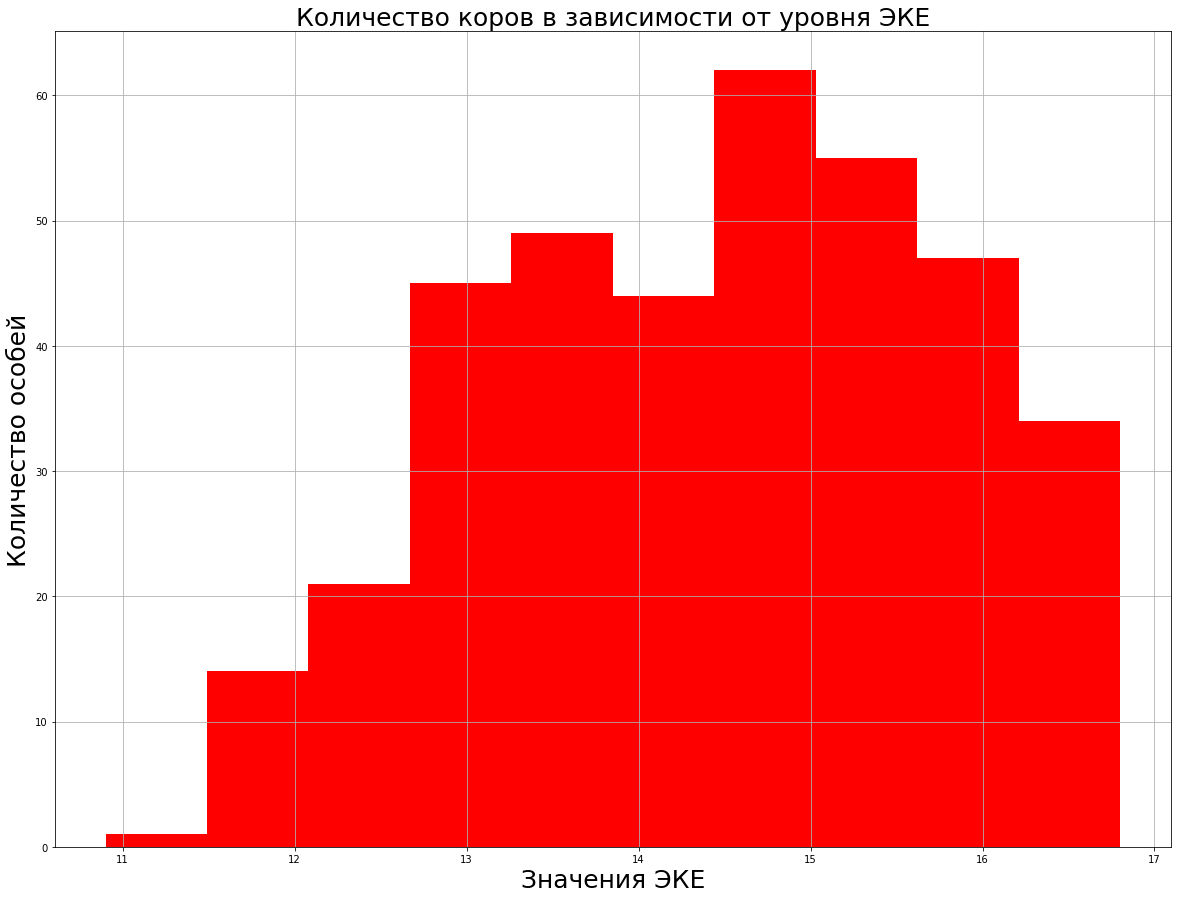

In [23]:
# Диаграмма зависимости количество голов от ЭКЕ по vis_bik:
vis_bik.hist(column='ЭКЕ (Энергетическая кормовая единица)', grid=True, figsize=(20, 15), color='red')
plt.title('Количество коров в зависимости от уровня ЭКЕ', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения ЭКЕ', fontsize=25)
plt.show()

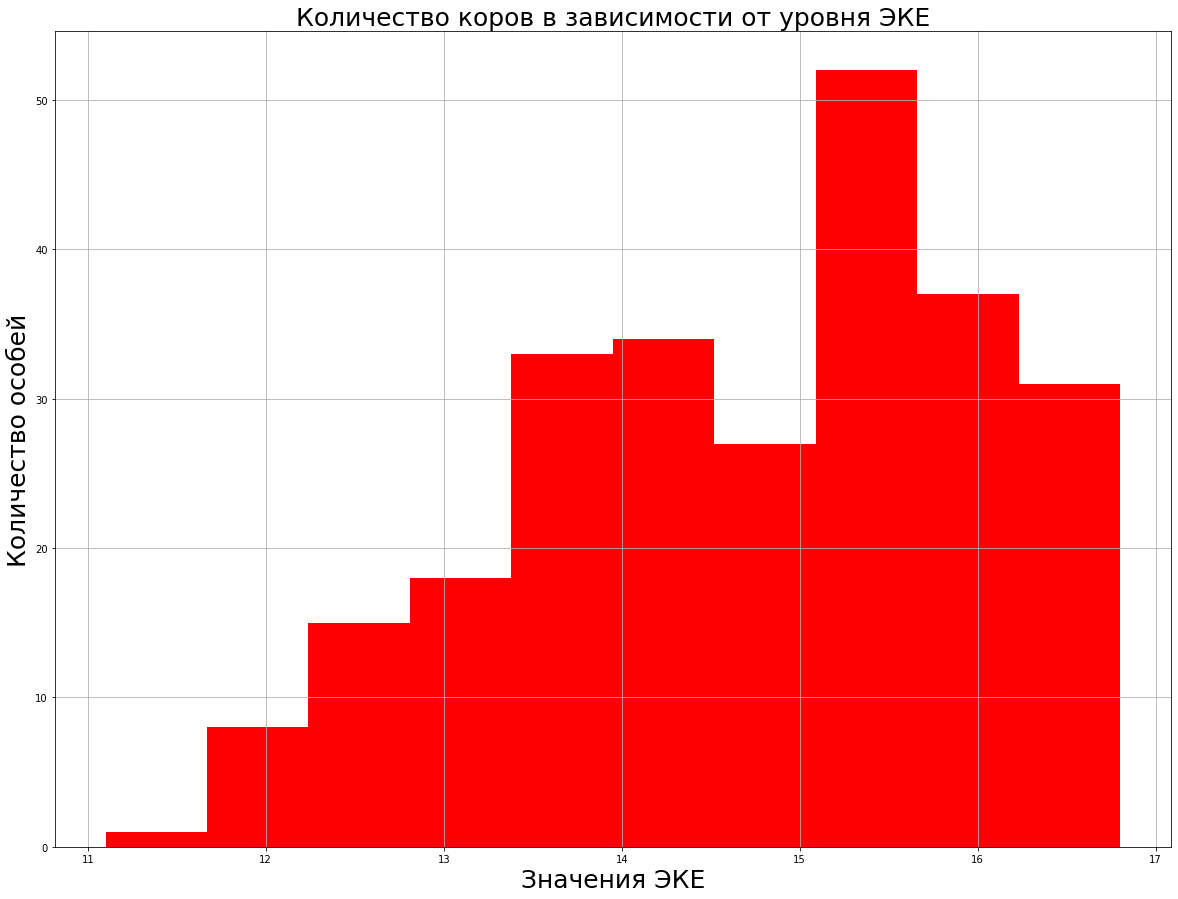

In [24]:
# Диаграмма зависимости количество голов от ЭКЕ по ref_sov:
ref_sov.hist(column='ЭКЕ (Энергетическая кормовая единица)', grid=True, figsize=(20, 15), color='red')
plt.title('Количество коров в зависимости от уровня ЭКЕ', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения ЭКЕ', fontsize=25)
plt.show()

В случае зависимости от ЭКЕ видно, что оно отклоняется от нормального; пик за счёт выбросов сдвинут вправо, приходится на интервал от 14 до 16 для обеих пород.

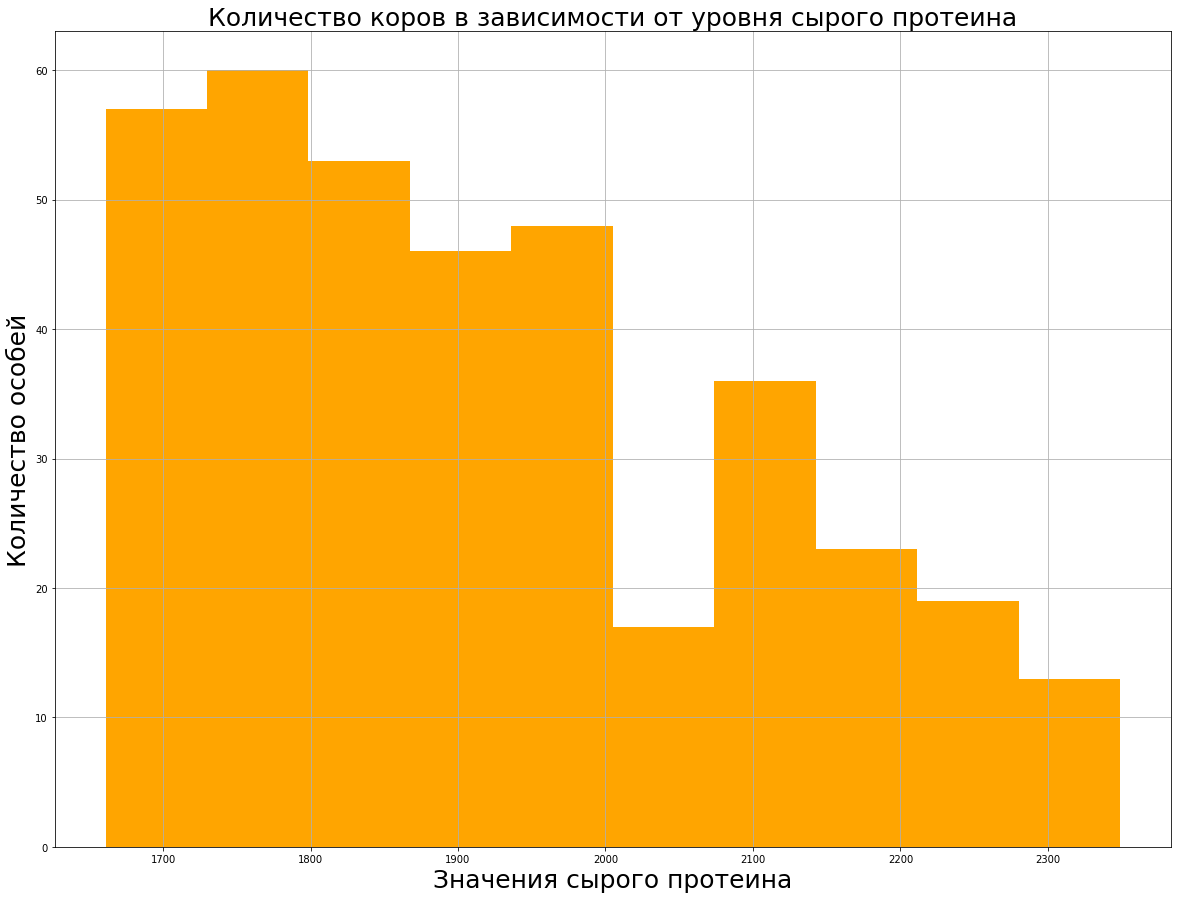

In [25]:
# Диаграмма зависимости количество голов от сырого протеина по vis_bik:
vis_bik.hist(column='Сырой протеин, г', grid=True, figsize=(20, 15), color='orange')
plt.title('Количество коров в зависимости от уровня сырого протеина', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения сырого протеина', fontsize=25)
plt.show()

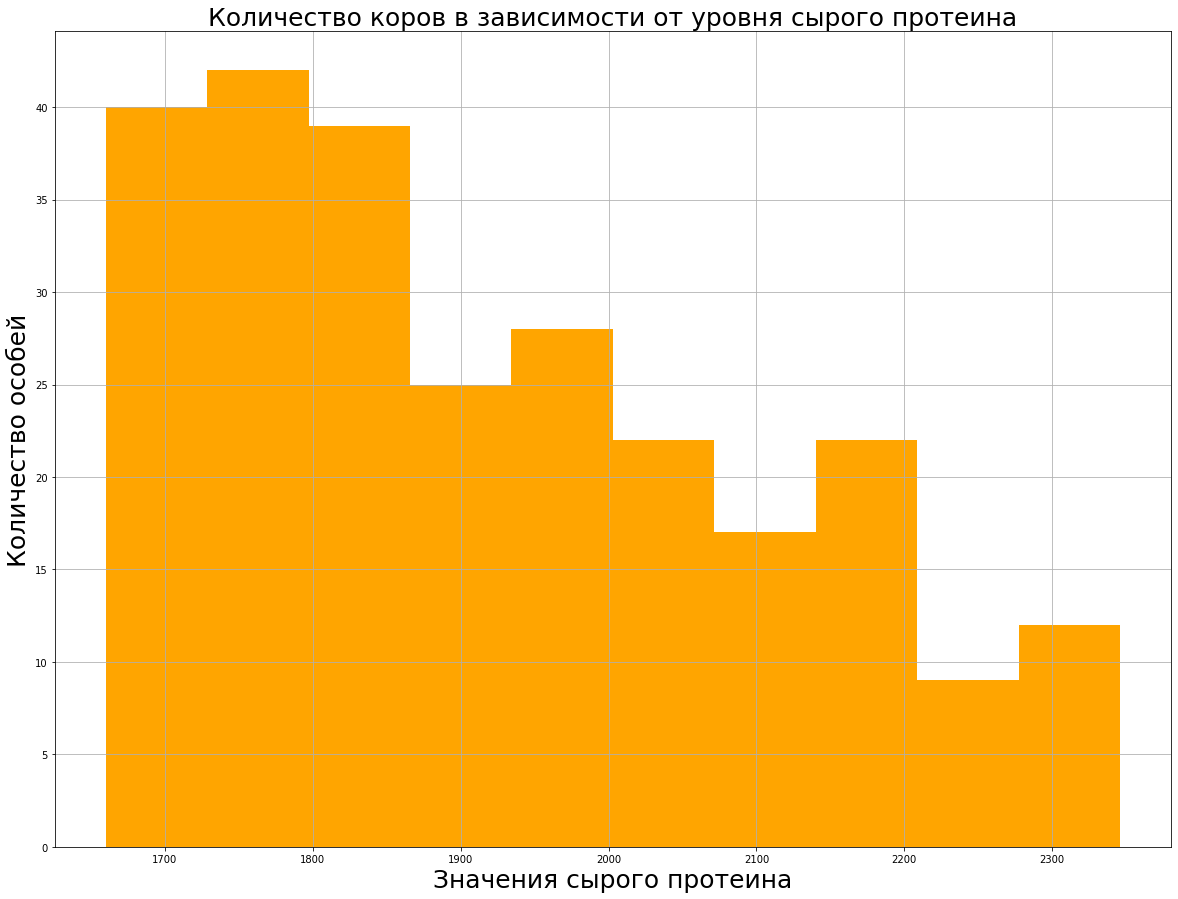

In [26]:
# Диаграмма зависимости количество голов от сырого протеина по ref_sov:
ref_sov.hist(column='Сырой протеин, г', grid=True, figsize=(20, 15), color='orange')
plt.title('Количество коров в зависимости от уровня сырого протеина', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения сырого протеина', fontsize=25)
plt.show()

Зависимость от сырого протеина явно не является нормальным распределением, видны конкретные ступеньки, рост количества голов идёт с уменьшением значения протеина в корме.

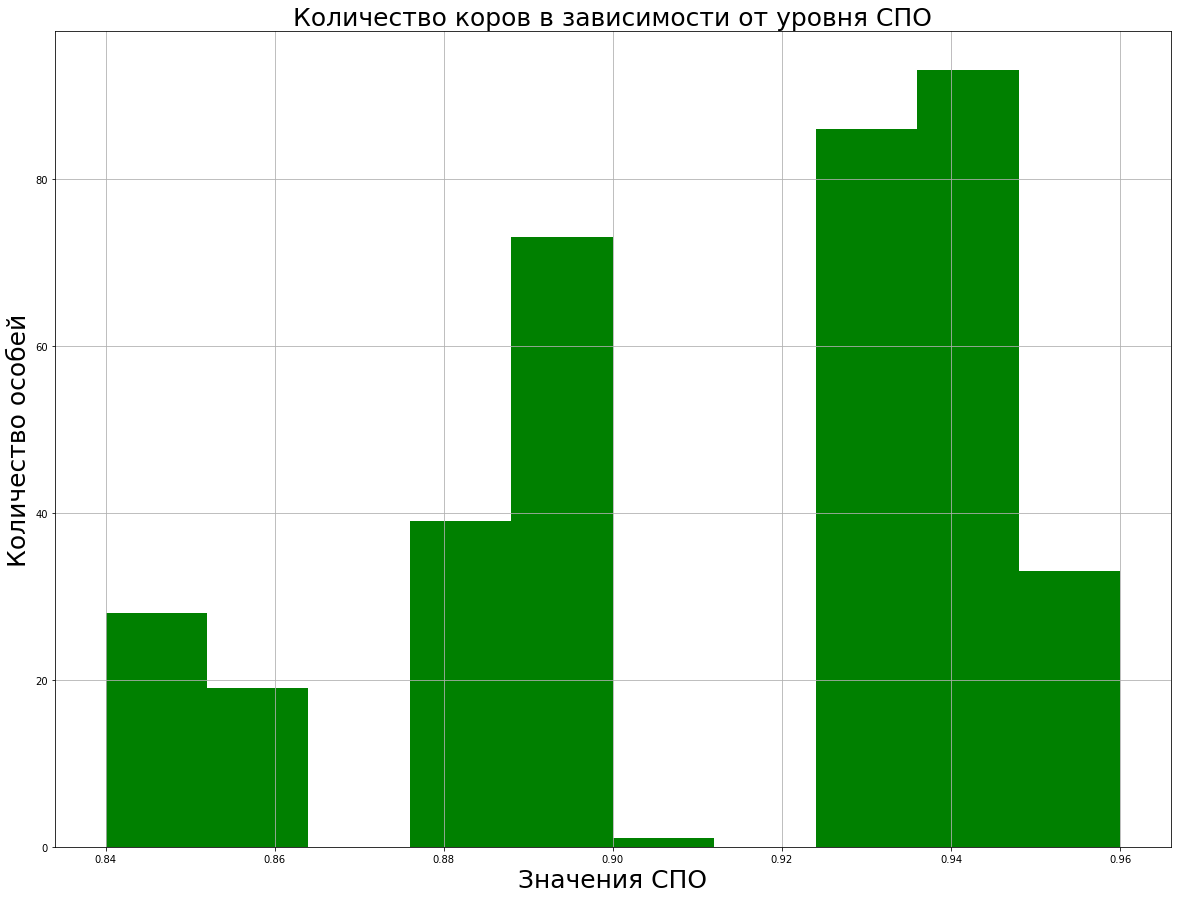

In [27]:
# Диаграмма зависимости количество голов от СПО по vis_bik:
vis_bik.hist(column='СПО (Сахаро-протеиновое соотношение)', grid=True, figsize=(20, 15), color='green')
plt.title('Количество коров в зависимости от уровня СПО', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения СПО', fontsize=25)
plt.show()

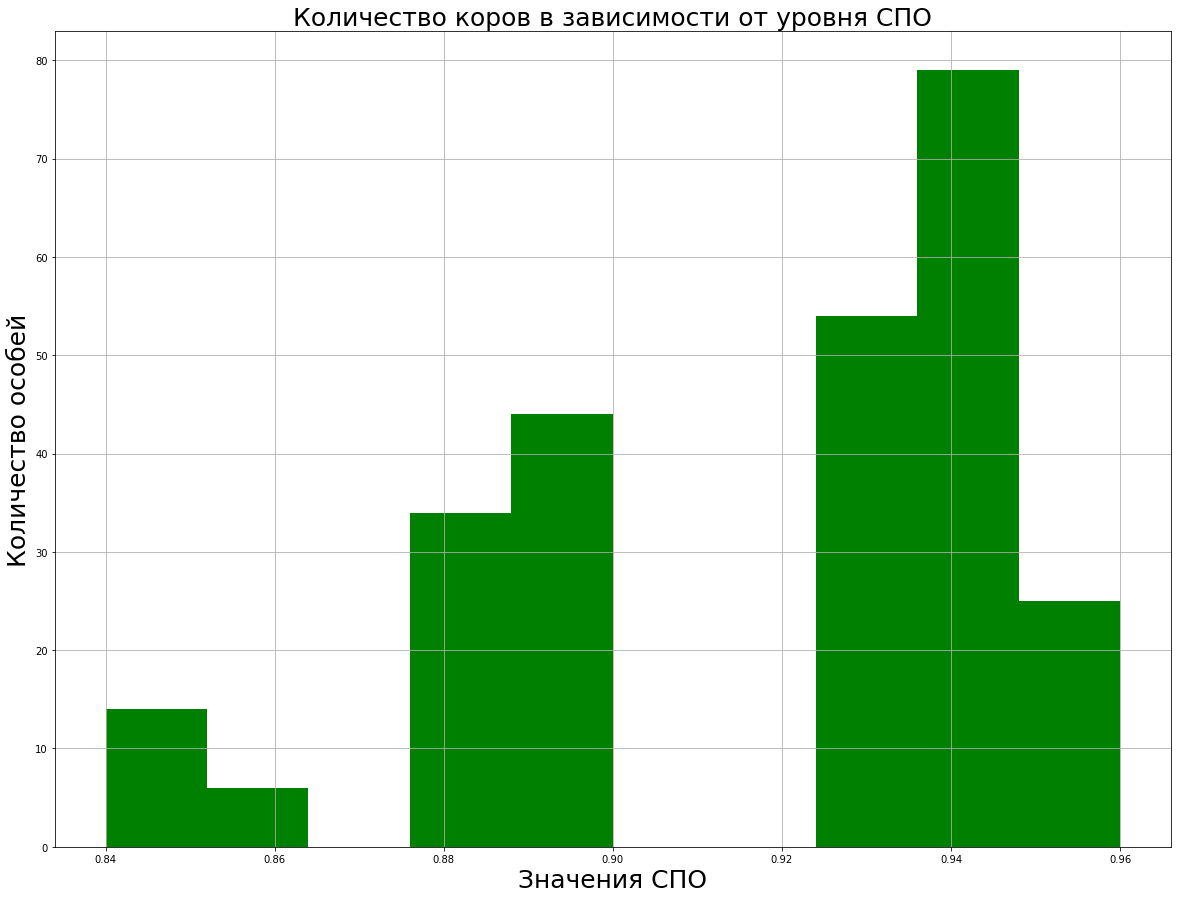

In [28]:
# Диаграмма зависимости количество голов от СПО по ref_sov:
ref_sov.hist(column='СПО (Сахаро-протеиновое соотношение)', grid=True, figsize=(20, 15), color='green')
plt.title('Количество коров в зависимости от уровня СПО', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения СПО', fontsize=25)
plt.show()

Пики немного отличаются в зависимости от породы, но оба графика явно разделены на 3 кластера.

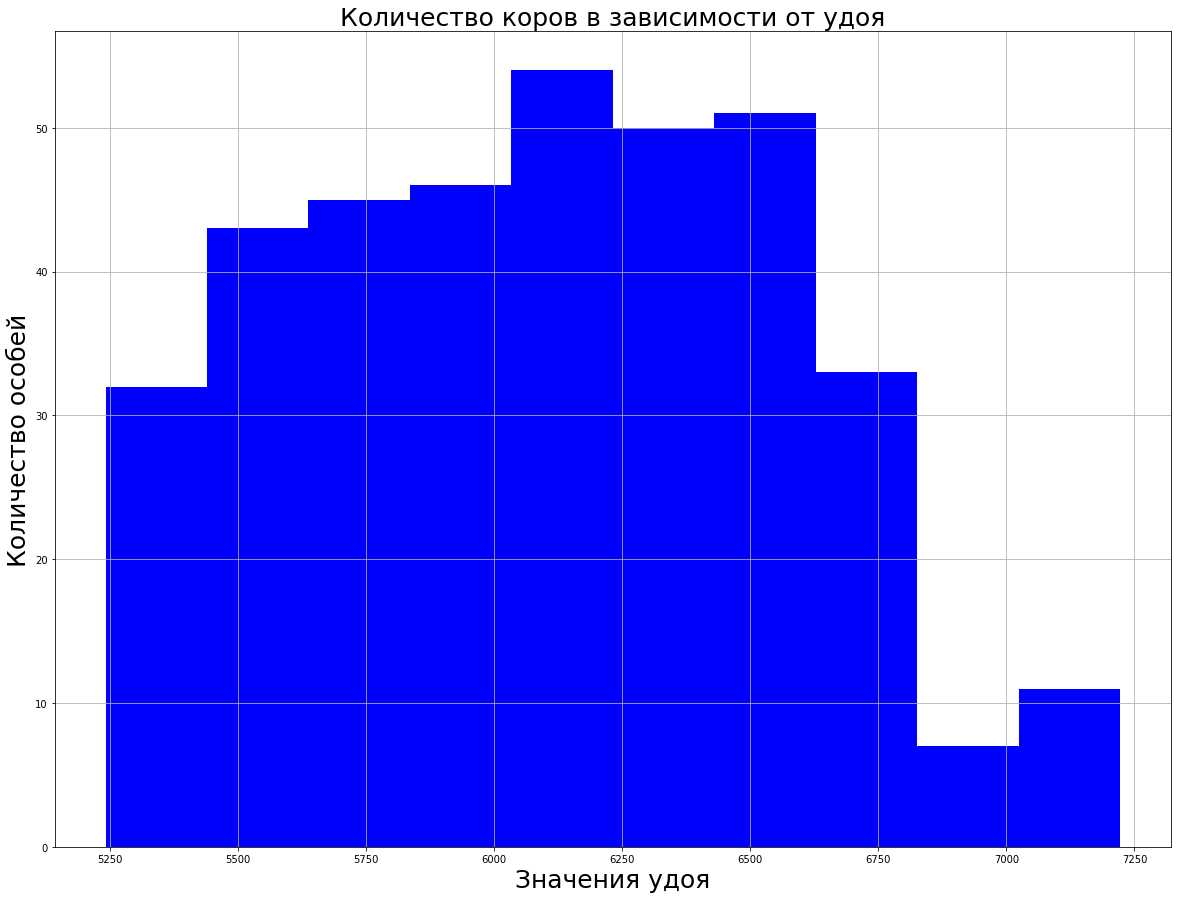

In [29]:
# Диаграмма зависимости количество голов от СПО по vis_bik:
vis_bik.hist(column='Удой, кг', grid=True, figsize=(20, 15), color='blue')
plt.title('Количество коров в зависимости от удоя', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения удоя', fontsize=25)
plt.show()

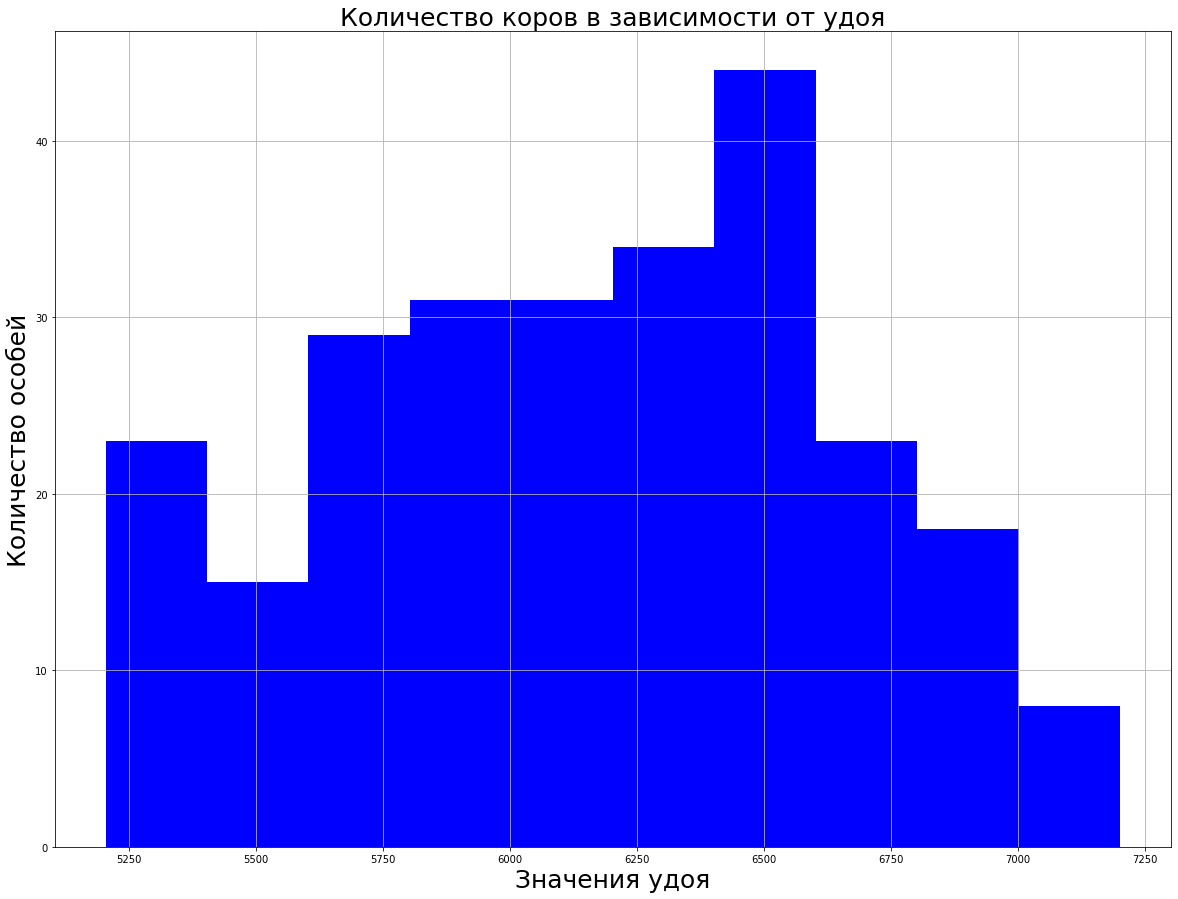

In [30]:
# Диаграмма зависимости количество голов от СПО по ref_sov:
ref_sov.hist(column='Удой, кг', grid=True, figsize=(20, 15), color='blue')
plt.title('Количество коров в зависимости от удоя', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения удоя', fontsize=25)
plt.show()

Зависимости далеки от нормальных, присутствуют сильные выбросы.

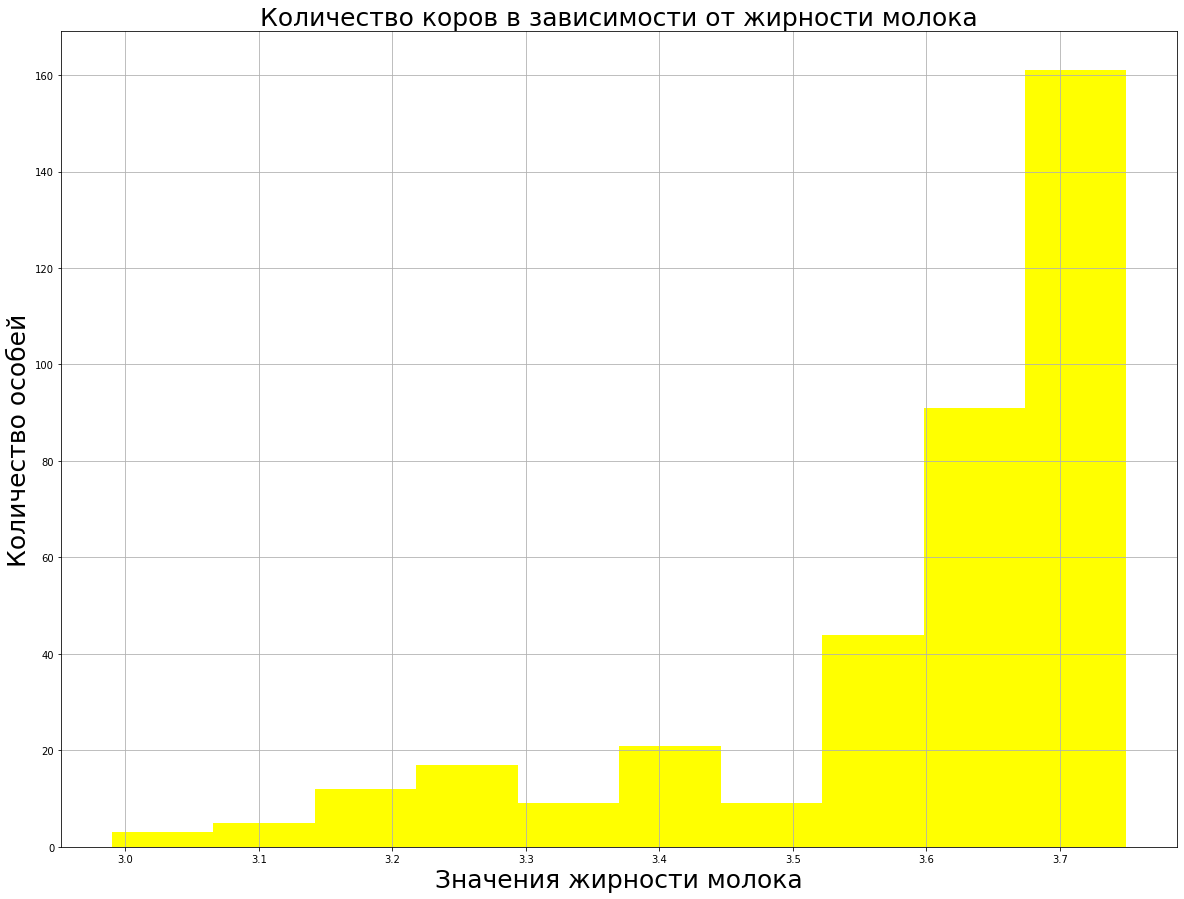

In [31]:
# Диаграмма зависимости количество голов от жирности молока по vis_bik:
vis_bik.hist(column='Жирность,%', grid=True, figsize=(20, 15), color='yellow')
plt.title('Количество коров в зависимости от жирности молока', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения жирности молока', fontsize=25)
plt.show()

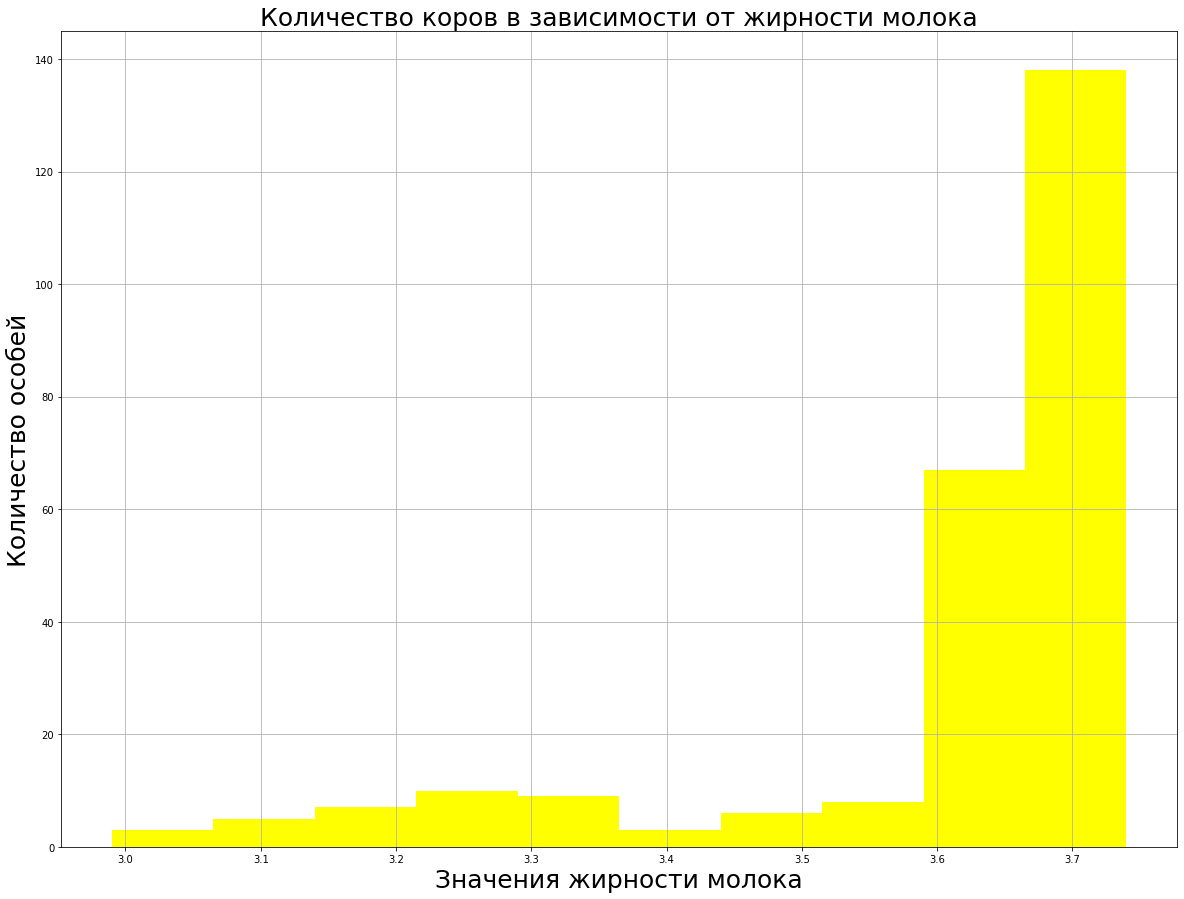

In [32]:
# Диаграмма зависимости количество голов от жирности молока по ref_sov:
ref_sov.hist(column='Жирность,%', grid=True, figsize=(20, 15), color='yellow')
plt.title('Количество коров в зависимости от жирности молока', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения жирности молока', fontsize=25)
plt.show()

Гистограммы очень похожи друг на друга. Линейной зависимости явно нет.

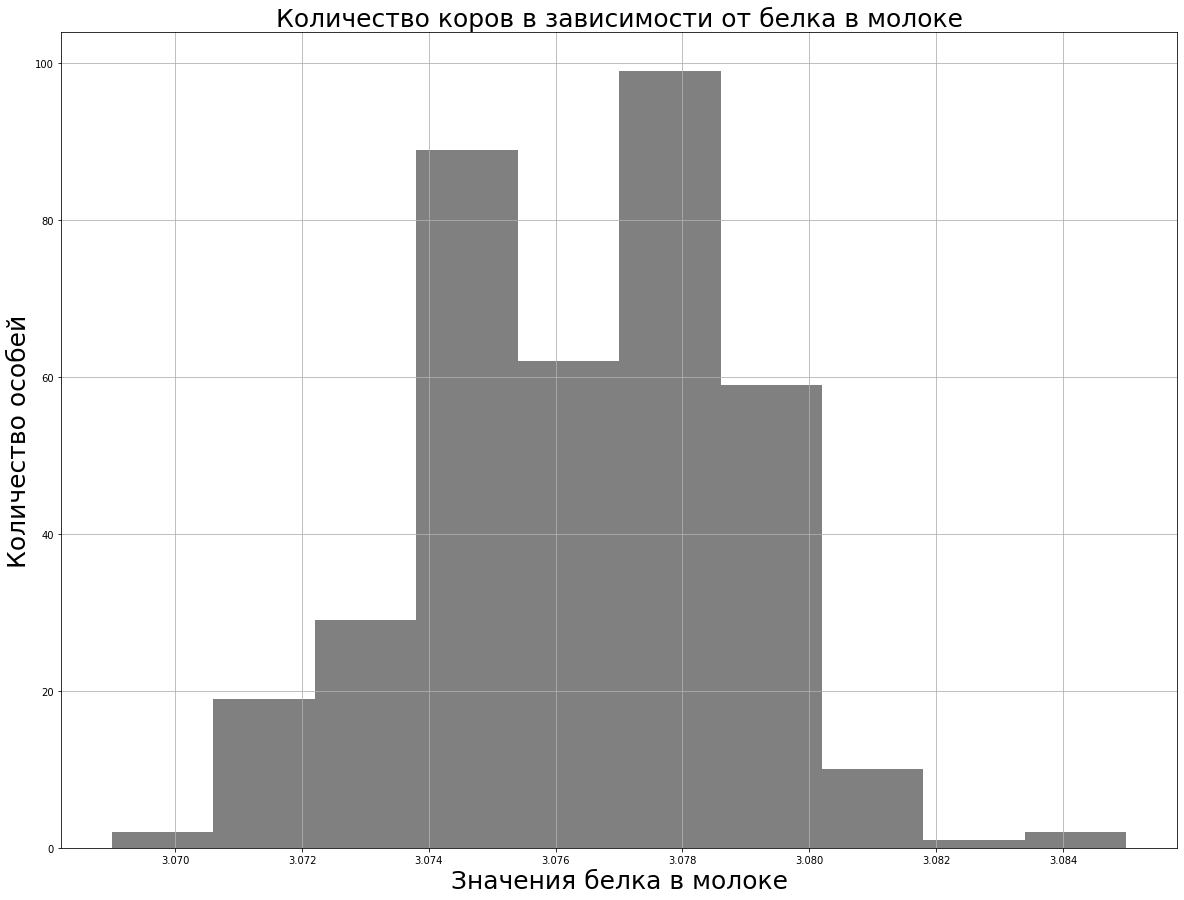

In [33]:
# Диаграмма зависимости количество голов от белка в молоке по vis_bik:
vis_bik.hist(column='Белок,%', grid=True, figsize=(20, 15), color='grey')
plt.title('Количество коров в зависимости от белка в молоке', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения белка в молоке', fontsize=25)
plt.show()

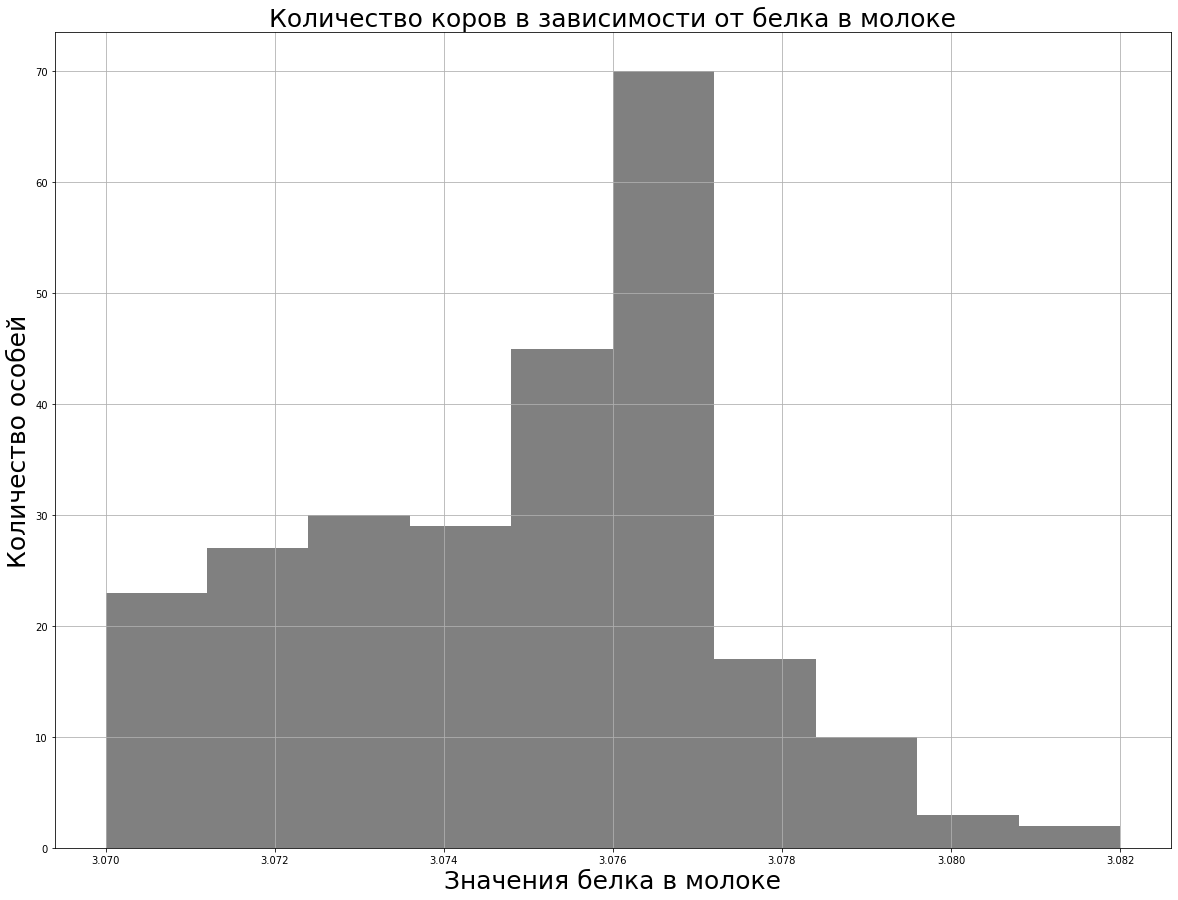

In [34]:
# Диаграмма зависимости количество голов от белка в молоке по ref_sov:
ref_sov.hist(column='Белок,%', grid=True, figsize=(20, 15), color='grey')
plt.title('Количество коров в зависимости от белка в молоке', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Значения белка в молоке', fontsize=25)
plt.show()

В случае с Вис Бик Айдиал распределение можно назвать нормальным, за исключением некоторых выбросов, но у РефлешнСоверинг картина иная.

##### Промежуточный вывод:
В ключевой характеристике "удой" был обнаружен и удалён один явный выброс. 

По характеристикам молока наблюдаем небольшие выдающиеся значения, которые сами по себе сильно не выбиваются из общего массива данных.

По гистограммам можно сказать, что нормальное распределение данных наблюдается только по количеству белка в молоке у породы Вис Бик Айдиал. В случаях обеих пород по показателю СПО наблюдается явная кластеризация данных.

Переходим к качественным характеристикам из таблицы "ferma_main".

In [35]:
# Составим сводную таблицу:
breed_count = ferma_main.pivot_table(index='Порода', values='id', aggfunc='count')
breed_count.columns = ['Количество голов']
breed_count = breed_count.sort_values('Количество голов', ascending = True)
print(breed_count)

                 Количество голов
Порода                           
РефлешнСоверинг               256
Вис Бик Айдиал                372


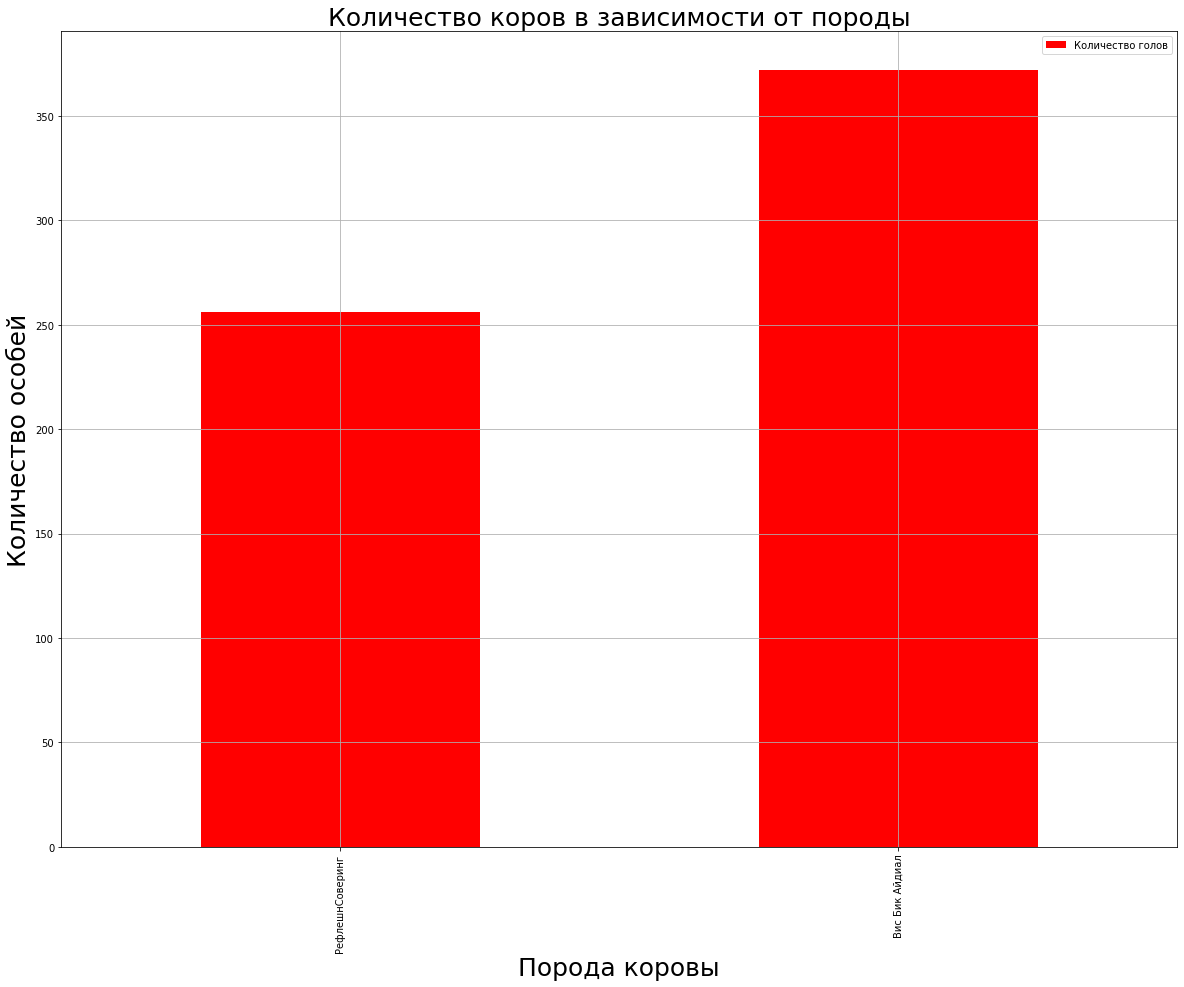

In [36]:
# Диаграмма зависимости количество голов от породы:
breed_count.plot(y='Количество голов', kind='bar', grid=True, figsize=(20, 15), color='red')
plt.title('Количество коров в зависимости от породы', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Порода коровы', fontsize=25)
plt.show()

Количество коров породы Вис Бик Айдиал на 40+% больше, чем Рефлешн Соверинг.

In [37]:
# Составим сводную таблицу:
type_of_pasture = ferma_main.pivot_table(index='Тип пастбища', values='id', aggfunc='count')
type_of_pasture.columns = ['Количество голов']
type_of_pasture = type_of_pasture.sort_values('Количество голов', ascending = True)
print(type_of_pasture)

              Количество голов
Тип пастбища                  
Равнинное                  278
Холмистое                  350


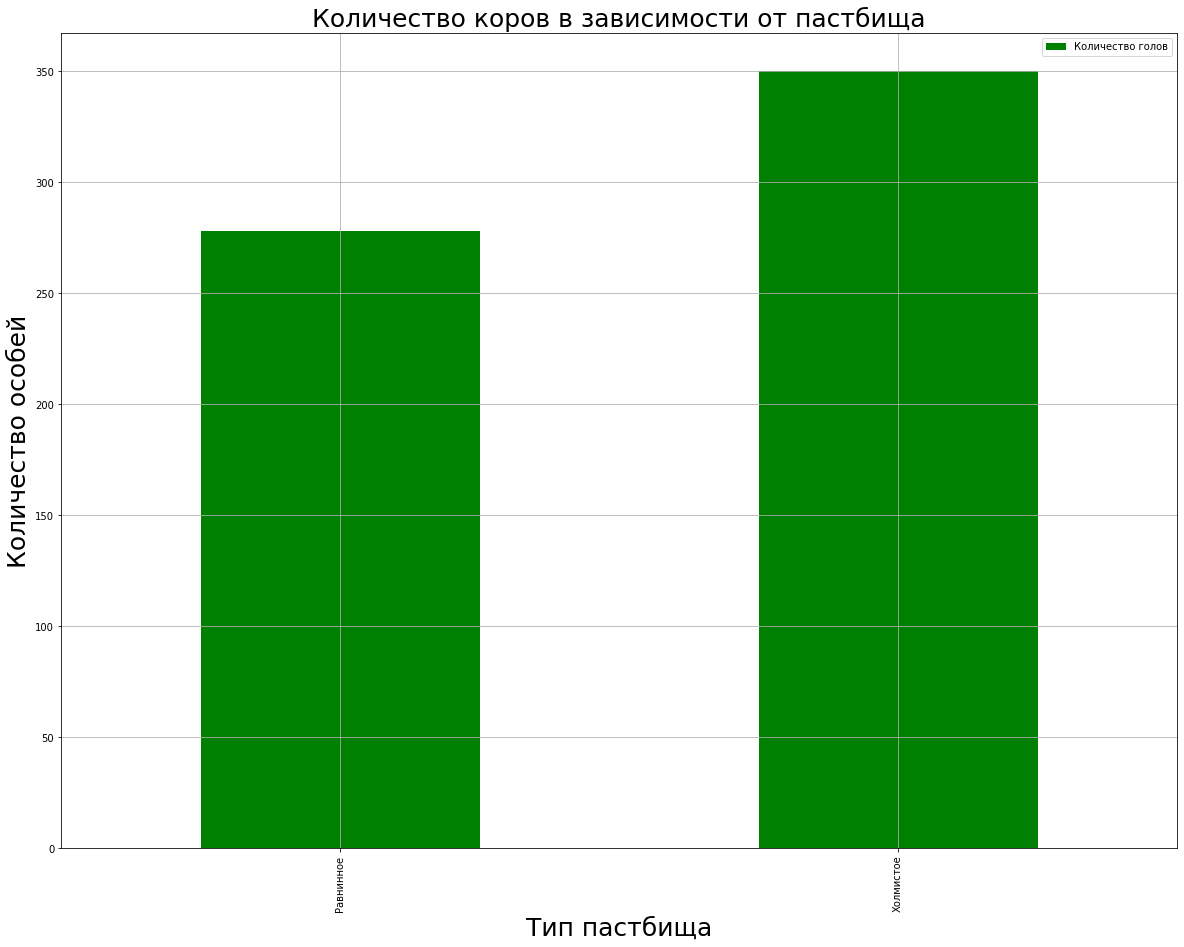

In [38]:
# Диаграмма зависимости количество голов от пастбища:
type_of_pasture.plot(y='Количество голов', kind='bar', grid=True, figsize=(20, 15), color='green')
plt.title('Количество коров в зависимости от пастбища', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Тип пастбища', fontsize=25)
plt.show()

Соотношение животных по данному показателю примерно как и с породами.

In [39]:
# Составим сводную таблицу:
bull_breed = ferma_main.pivot_table(index='Порода папы быка', values='id', aggfunc='count')
bull_breed.columns = ['Количество голов']
bull_breed = bull_breed.sort_values('Количество голов', ascending = True)
print(bull_breed)

                  Количество голов
Порода папы быка                  
Соверин                        311
Айдиал                         317


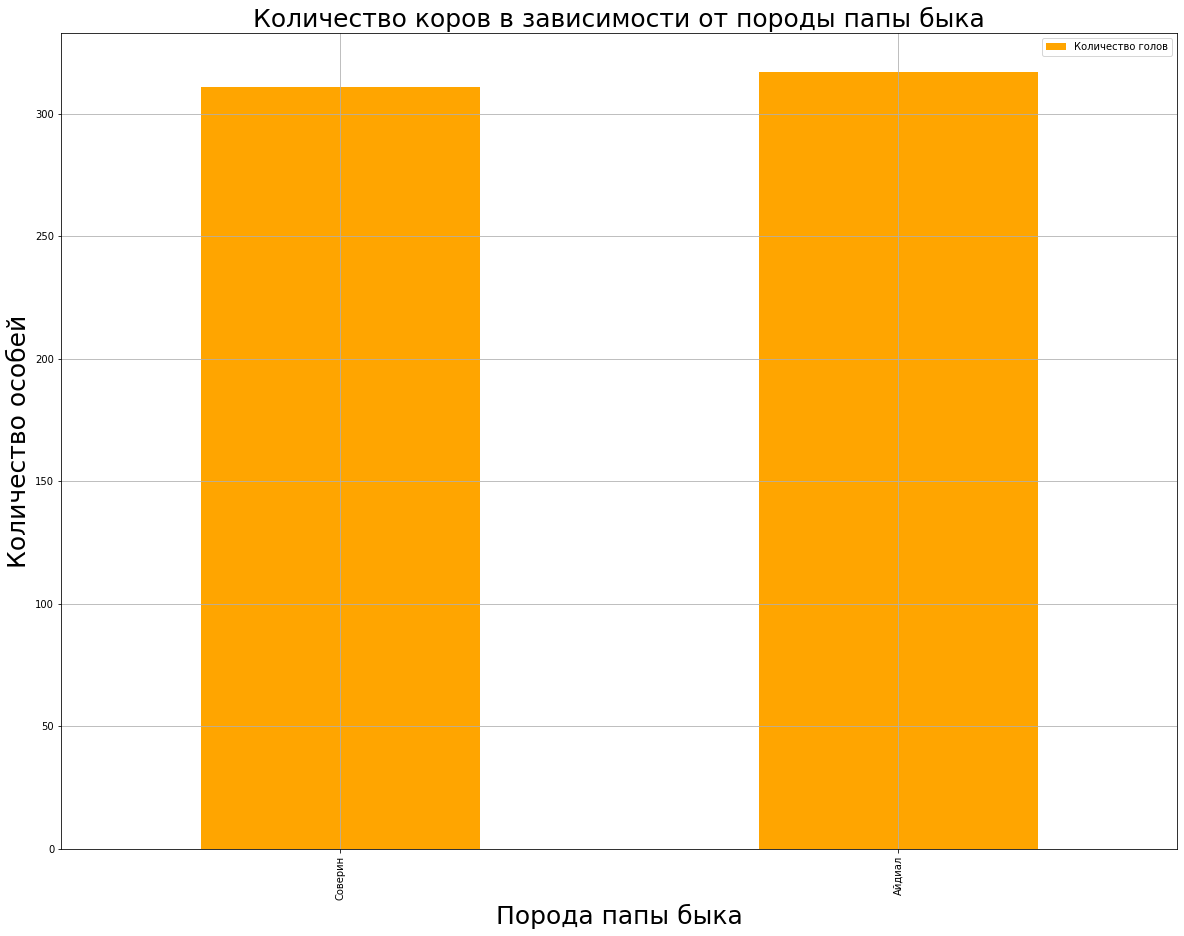

In [40]:
# Диаграмма зависимости количество голов от пастбища:
bull_breed.plot(y='Количество голов', kind='bar', grid=True, figsize=(20, 15), color='orange')
plt.title('Количество коров в зависимости от породы папы быка', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Порода папы быка', fontsize=25)
plt.show()

Видим, что изначально никакой породе предпочтения не отдавались.

In [41]:
# Составим сводную таблицу:
taste_of_milk = ferma_main.pivot_table(index='Вкус молока', values='id', aggfunc='count')
taste_of_milk.columns = ['Количество голов']
taste_of_milk = taste_of_milk.sort_values('Количество голов', ascending = True)
print(taste_of_milk)

             Количество голов
Вкус молока                  
не вкусно                 258
вкусно                    370


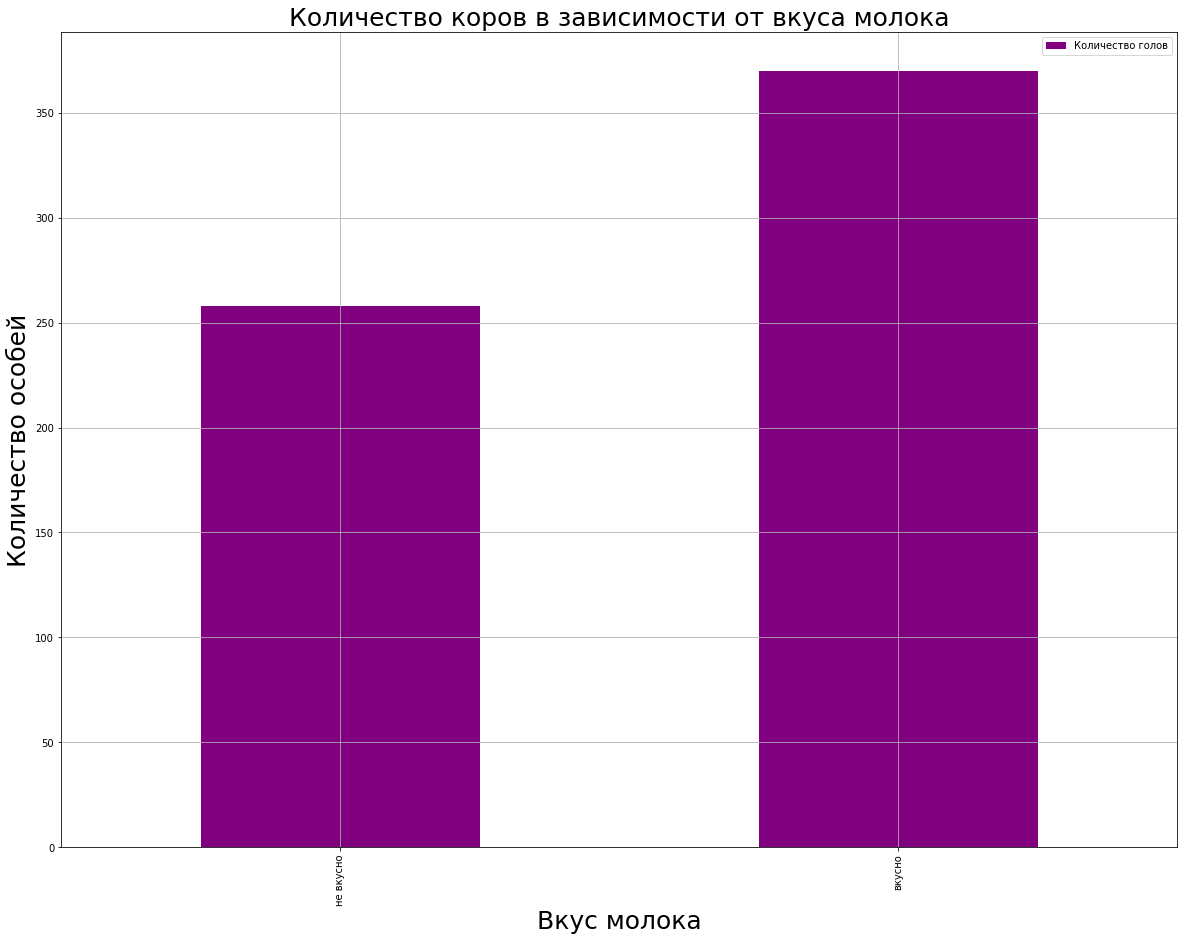

In [42]:
# Диаграмма зависимости количество голов от вкуса молока:
taste_of_milk.plot(y='Количество голов', kind='bar', grid=True, figsize=(20, 15), color='purple')
plt.title('Количество коров в зависимости от вкуса молока', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Вкус молока', fontsize=25)
plt.show()

Также около 40% коров дают невкусное молоко.

In [43]:
# Составим сводную таблицу:
age_of_cow = ferma_main.pivot_table(index='Возраст', values='id', aggfunc='count')
age_of_cow.columns = ['Количество голов']
age_of_cow = age_of_cow.sort_values('Количество голов', ascending = True)
print(age_of_cow)

             Количество голов
Возраст                      
менее_2_лет               110
более_2_лет               518


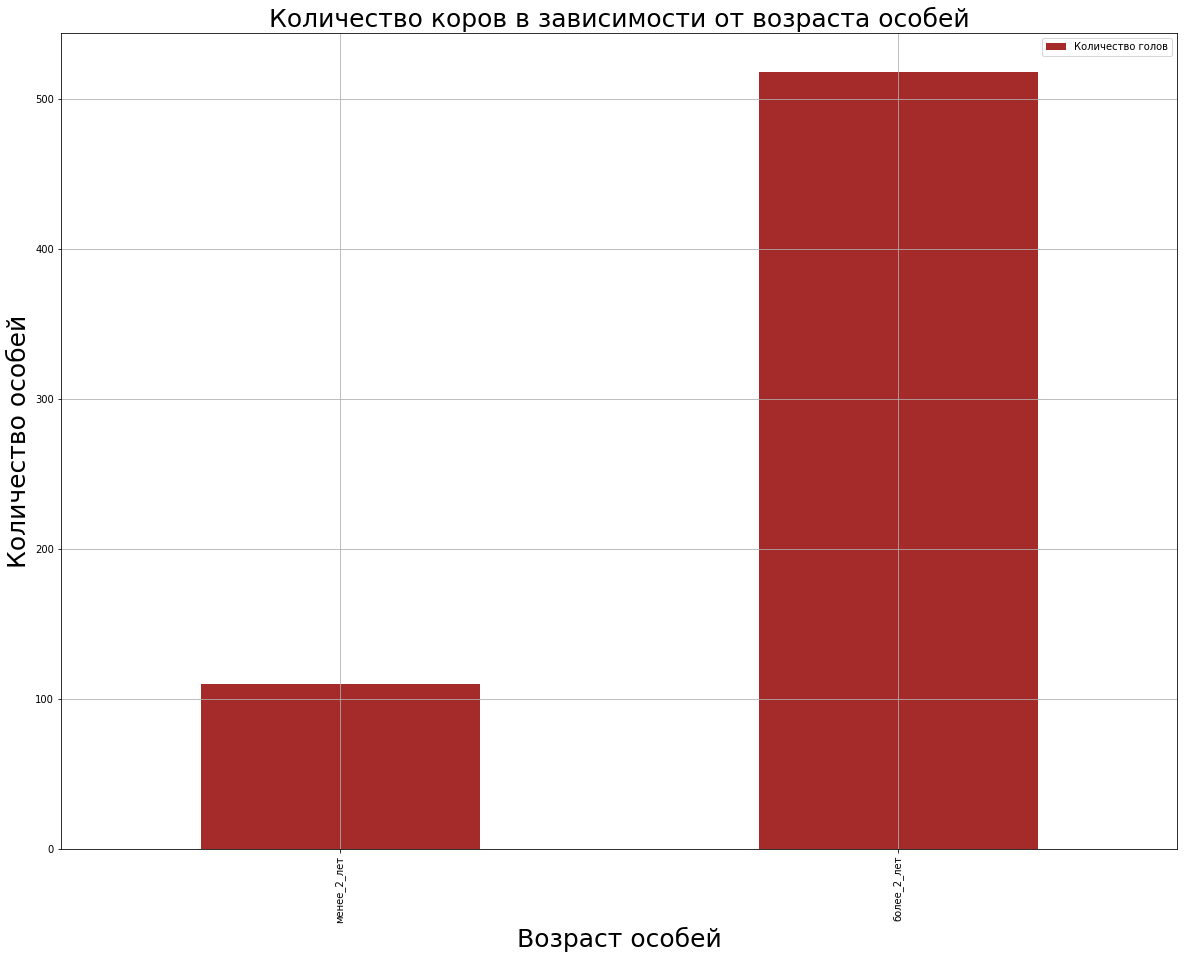

In [44]:
# Диаграмма зависимости количество голов от возраста особей:
age_of_cow.plot(y='Количество голов', kind='bar', grid=True, figsize=(20, 15), color='brown')
plt.title('Количество коров в зависимости от возраста особей', fontsize=25)
plt.ylabel('Количество особей', fontsize=25)
plt.xlabel('Возраст особей', fontsize=25)
plt.show()

Молодых особей на ферме оказалось в 5 раз меньше.

#### Вывод:
В ходе исследовательского анализа были подробно рассмотрены все характеристики датафрейма "ferma_main". Можно сделать следующие выводы:
  1) По своим характеристикам корм у всех коров идентичный, соотношения для конкретных особей не выделяются на общем фоне. Явных выбросов не обнаружено;\
  2) По удою был обнаружен и удалён 1 явный выброс;\
  3) По характеристикам молока наблюдаем небольшие выдающиеся значения, которые сами по себе сильно не выбиваются из общего массива данных;\
  4) С некоторой натяжкой можно сказать, что есть нормальное распределение данных по количеству белка в молоке, остальные количественные данные распределены ненормально, в случае СПО наблюдается явная кластеризация;\
  5) Количество коров породы Вис Бик Айдиал на 40+% больше, чем Рефлешн Соверинг;\
  6) Соотношение животных по типу пастбища примерно как и с породами;\
  7) Около 40% из стада дают невкусное молоко;\
  8) Молодых особей (менее 2 лет) в 5 раз меньше.
  
Теперь данные готовы к корреляционному анализу и дальнейшему обучению моделей.

### Корреляционный анализ

Ключевыми характеристиками, на основе которых в дальнейшем наши модели будут производить прогнозы, являются удой и вкус молока. Для начала необходимо понять их зависимость от остальных параметров по отдельности, на это и будет направлена работа в разделе корреляционного анализа.

Для начала рассчитаем коэффициенты корреляции между количественными признаками в таблице "ferma_main". Напомним, что нормальное распределение данных наблюдается только в случае рассмотрения белка в молоке, для остальных характеристик коэффициент корреляции Пирсона будет плохим вариантом. Будем использовать ранговую корреляцию Спирмана.

In [45]:
# Расчёт коэффициентов корреляции для удоя:
print('По удою:')
print()
print('Корреляция с ЭКЕ (коэффициент):', spearmanr(ferma_main['ЭКЕ (Энергетическая кормовая единица)'], ferma_main['Удой, кг'])[0])
print('Корреляция с ЭКЕ (p-значение):', spearmanr(ferma_main['ЭКЕ (Энергетическая кормовая единица)'], ferma_main['Удой, кг'])[1])
print()
print('Корреляция с протеином (коэффициент):', spearmanr(ferma_main['Сырой протеин, г'], ferma_main['Удой, кг'])[0])
print('Корреляция с протеином (p-значение):', spearmanr(ferma_main['Сырой протеин, г'], ferma_main['Удой, кг'])[1])
print()
print('Корреляция с СПО (коэффициент):', spearmanr(ferma_main['СПО (Сахаро-протеиновое соотношение)'], ferma_main['Удой, кг'])[0])
print('Корреляция с СПО (p-значение):', spearmanr(ferma_main['СПО (Сахаро-протеиновое соотношение)'], ferma_main['Удой, кг'])[1])
print()
print('Корреляция с жирностью молока (коэффициент):', spearmanr(ferma_main['Жирность,%'], ferma_main['Удой, кг'])[0])
print('Корреляция с жирностью молока (p-значение):', spearmanr(ferma_main['Жирность,%'], ferma_main['Удой, кг'])[1])
print()
print('Корреляция с белком в молоке:', ferma_main['Белок,%'].corr(ferma_main['Удой, кг']))

По удою:

Корреляция с ЭКЕ (коэффициент): 0.7651443116006692
Корреляция с ЭКЕ (p-значение): 8.359783320590403e-122

Корреляция с протеином (коэффициент): 0.43754251989802084
Корреляция с протеином (p-значение): 9.395930002891475e-31

Корреляция с СПО (коэффициент): 0.7879040908519489
Корреляция с СПО (p-значение): 6.236376891917409e-134

Корреляция с жирностью молока (коэффициент): 0.688505794761783
Корреляция с жирностью молока (p-значение): 2.1035311214189552e-89

Корреляция с белком в молоке: 0.002965710114691232


По p-значениям делаем вывод, что все зависимости статистически значимы.

По данным коэффициентам можно сделать следующие заключения: сильная линейная связь наблюдается между удоем и ЭКЕ с СПО, умеренная связь между удоем и протеином в корме, заметная связь с жирностью молока. Связи с белком в молоке практически нет.

Построим диаграммы рассеяния для подтверждённых связей с учётом качественных признаков.

Диаграммы по породе особи:

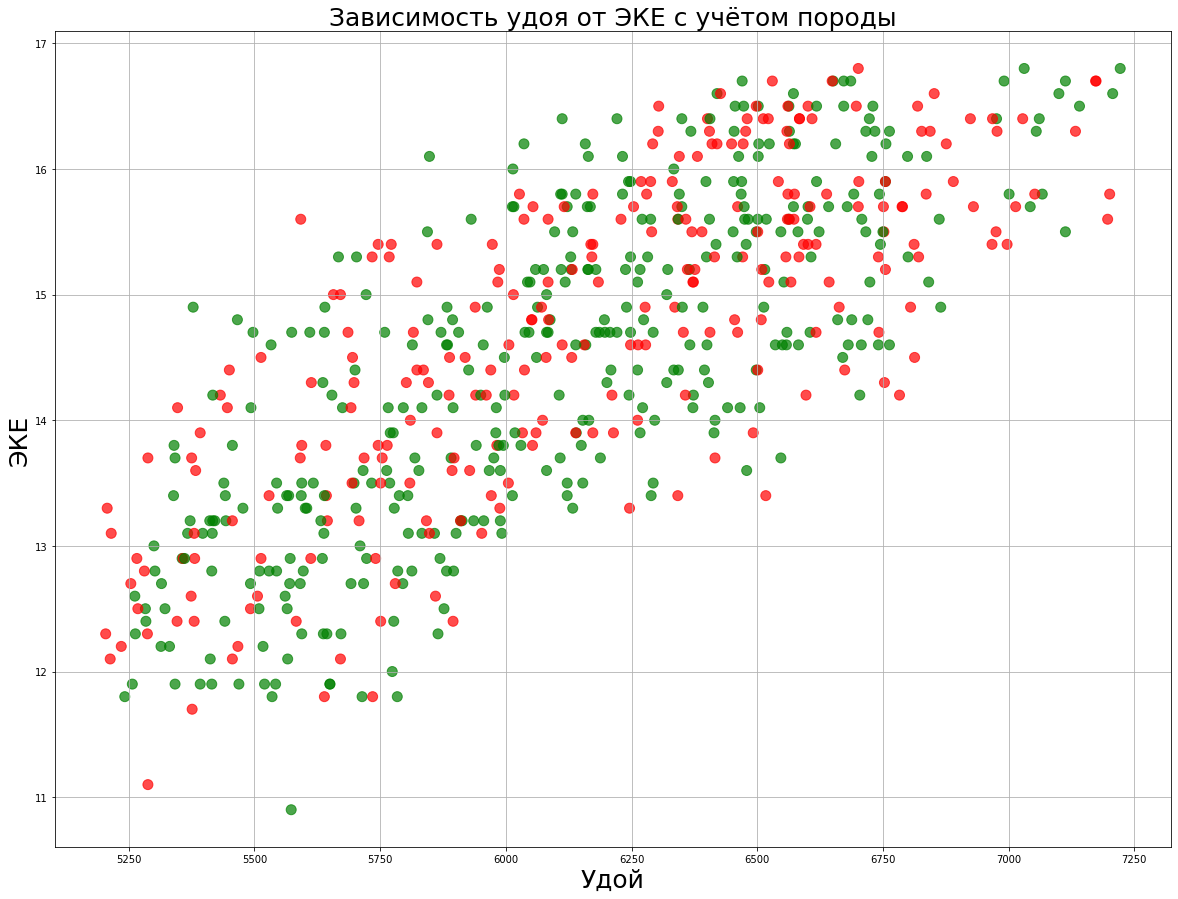

In [46]:
# Создадим словарь для подбора цвета:
color = {'РефлешнСоверинг': 'red', 'Вис Бик Айдиал': 'green'}
ferma_main['color'] = ferma_main['Порода'].apply(lambda x: color[x])

# Диаграмма рассеяния по удою от ЭКЕ:
ferma_main.plot.scatter(x='Удой, кг', y='ЭКЕ (Энергетическая кормовая единица)', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от ЭКЕ с учётом породы', fontsize=25)
plt.ylabel('ЭКЕ', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Стандартная диаграмма рассеяния с сильной корреляцией, породы распределены одинаково.

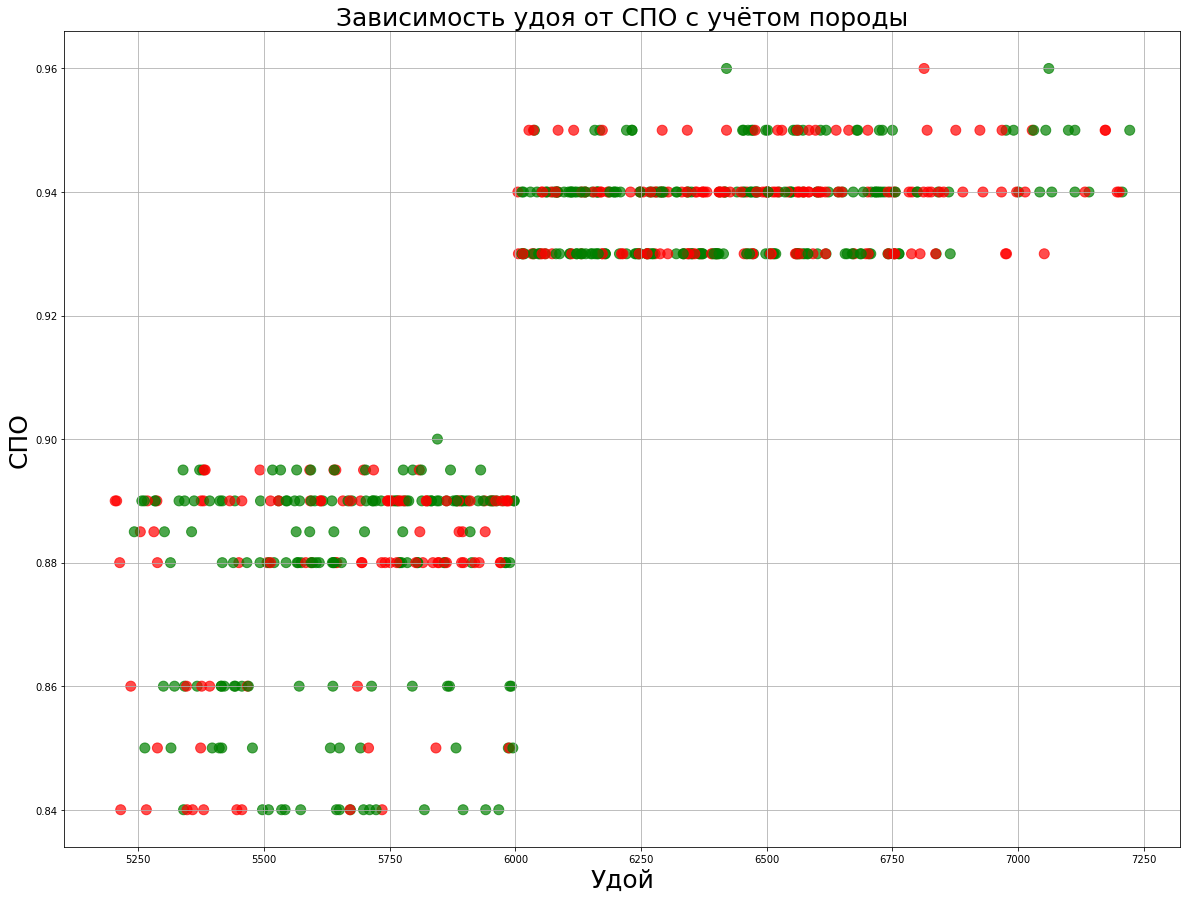

In [47]:
# Диаграмма рассеяния по удою от СПО:
ferma_main.plot.scatter(x='Удой, кг', y='СПО (Сахаро-протеиновое соотношение)', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от СПО с учётом породы', fontsize=25)
plt.ylabel('СПО', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Вот тут уже интересная картина: связь действительно сильная, но также ступенчатая - у коров с удоем меньше 6000 показатель СПО находится строго ниже 0.9, а у "более производительных" он начинается с 0.93. Кроме этого, мы видим, что зелёных кружочков больше до 6000 удоя, но, так как изначально в таблице представлено неравное количество особей каждой породы, однозначного вывода сделать нельзя.

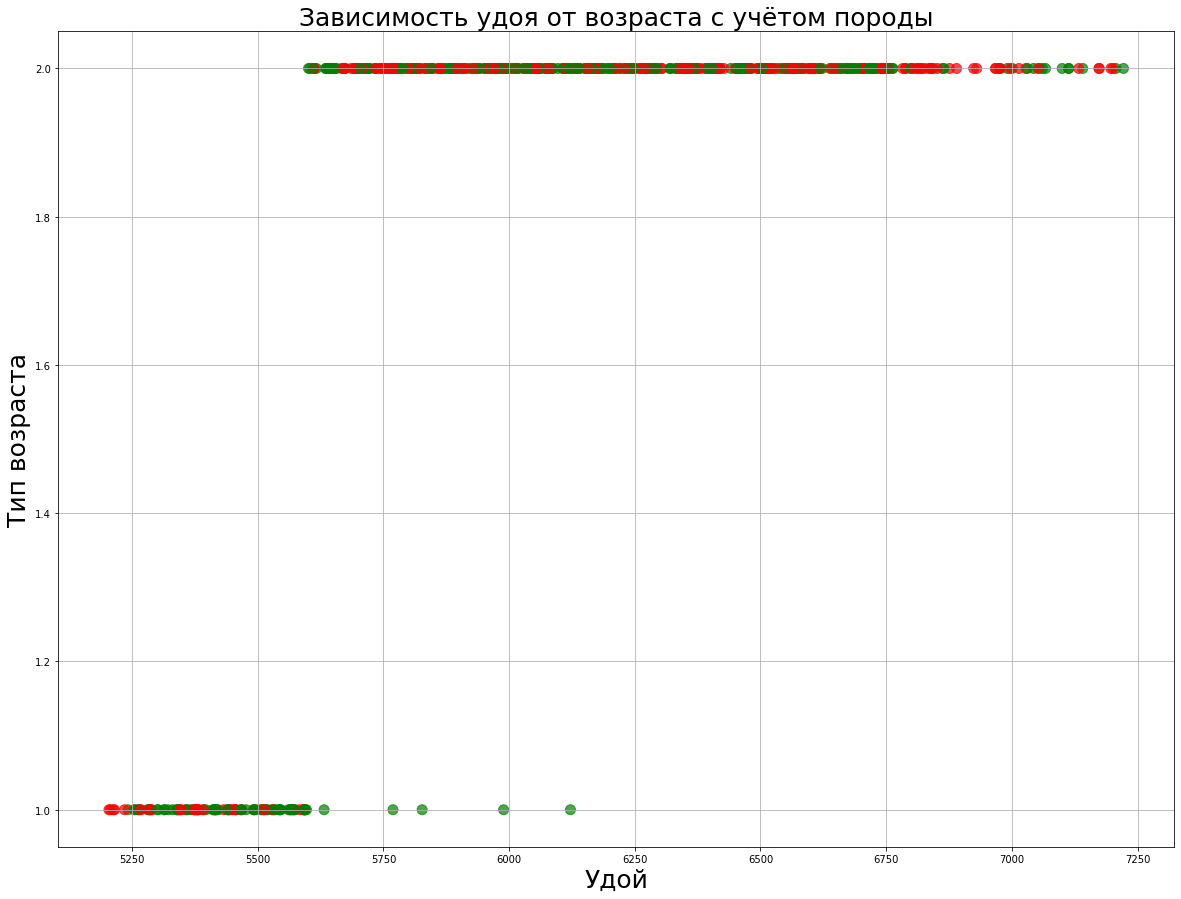

In [48]:
# Диаграмма рассеяния по удою от возраста:
ferma_main.plot.scatter(x='Удой, кг', y='Тип возраста', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от возраста с учётом породы', fontsize=25)
plt.ylabel('Тип возраста', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Явно видна закономерность - молодые коровы дают существенно меньше молока. Есть несколько исключений, все они одной породы Вис Бик Айдиал.

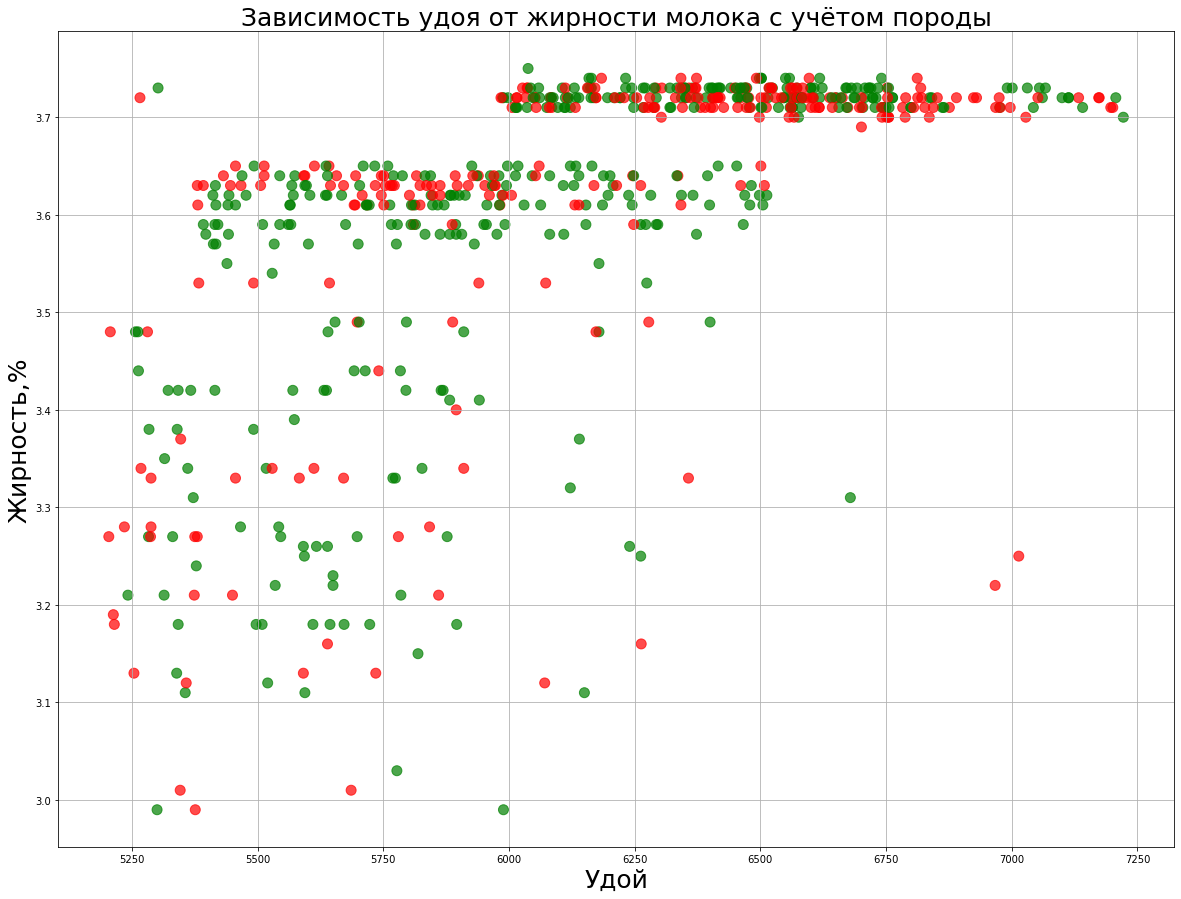

In [49]:
# Диаграмма рассеяния по удою от жирности молока:
ferma_main.plot.scatter(x='Удой, кг', y='Жирность,%', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от жирности молока с учётом породы', fontsize=25)
plt.ylabel('Жирность,%', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Закономерность следующая: начиная с 6000 удоя, основная масса коров даёт молоко с жирностью более 3,7%, другая часть (поменьше) имеет удой от 5300 до 6500, жирность колеблется в районе 3,5%. Оставшиеся особи случайно разбросаны по графику.

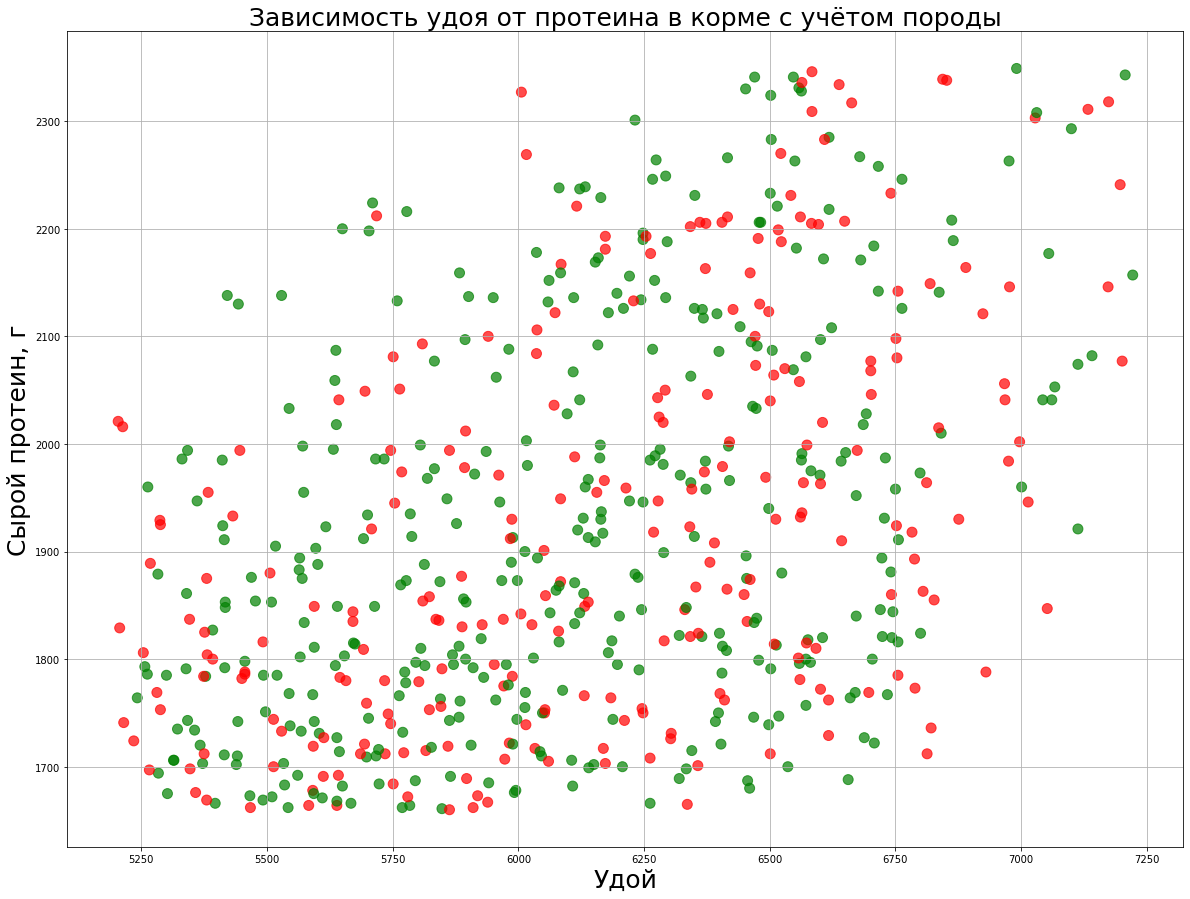

In [50]:
# Диаграмма рассеяния по удою от протеина в корме:
ferma_main.plot.scatter(x='Удой, кг', y='Сырой протеин, г', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от протеина в корме с учётом породы', fontsize=25)
plt.ylabel('Сырой протеин, г', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Связь такая же, как и у других компонентов корма, но менее выраженная.

##### Промежуточный вывод:
При рассмотрении отношения удоя с количественными характеристиками с имеющейся корреляционной связью с учётом породы особей делаем следущие выводы: 
  - зависимость от ЭКЕ представляет собой стандартную диаграмму рассеяния, породы распределены одинаково;
  - зависимость от СПО ступенчатая - у коров с удоем меньше 6000 показатель СПО находится строго ниже 0.9, а у "более производительных" он начинается с 0.93. Кроме этого, мы видим, что зелёных кружочков больше до 6000 удоя, но, так как изначально в таблице представлено неравное количество особей каждой породы, однозначного вывода сделать нельзя;
  - в зависимости от возраста явно видна закономерность - молодые коровы дают существенно меньше молока. Есть несколько исключений, все они одной породы Вис Бик Айдиал;
  - по жирности молока закономерность следующая: начиная с 6000 удоя, основная масса коров даёт молоко с жирностью более 3,7%, другая часть (поменьше) имеет удой от 5300 до 6500, жирность колеблется в районе 3,5%. Оставшиеся особи случайно разбросаны по графику;
  - зависимость от протеина в корме как и от ЭКЕ, но менее выраженная.
  
Таким образом, порода коровы не играет большой роли в её удое.

Следующей качественной характеристикой будет тип пастбища.

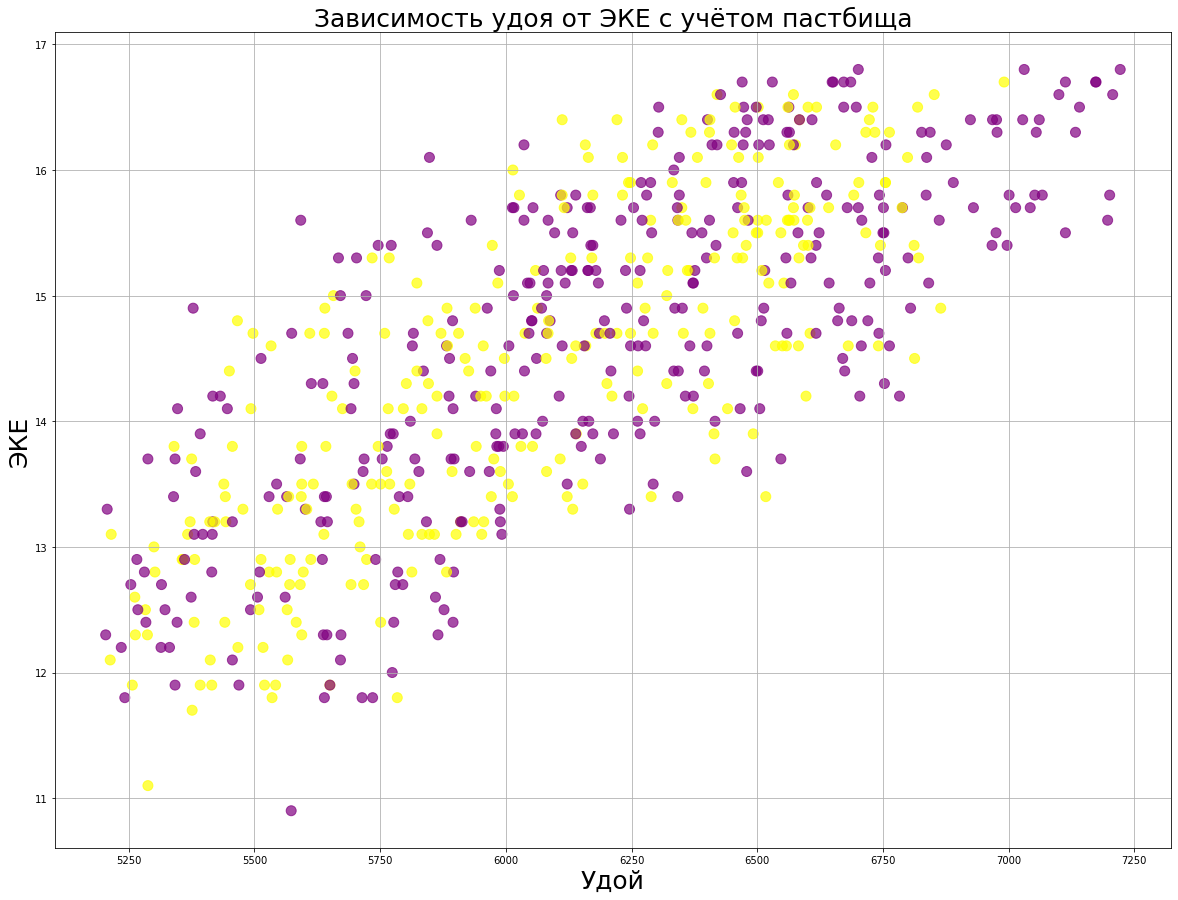

In [51]:
# Создадим словарь для подбора цвета:
color = {'Холмистое': 'purple', 'Равнинное': 'yellow'}
ferma_main['color'] = ferma_main['Тип пастбища'].apply(lambda x: color[x])

# Диаграмма рассеяния по удою от ЭКЕ:
ferma_main.plot.scatter(x='Удой, кг', y='ЭКЕ (Энергетическая кормовая единица)', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от ЭКЕ с учётом пастбища', fontsize=25)
plt.ylabel('ЭКЕ', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Коровы с удоем больше 7000 паслись исключительно на холмистых пастбищах. 

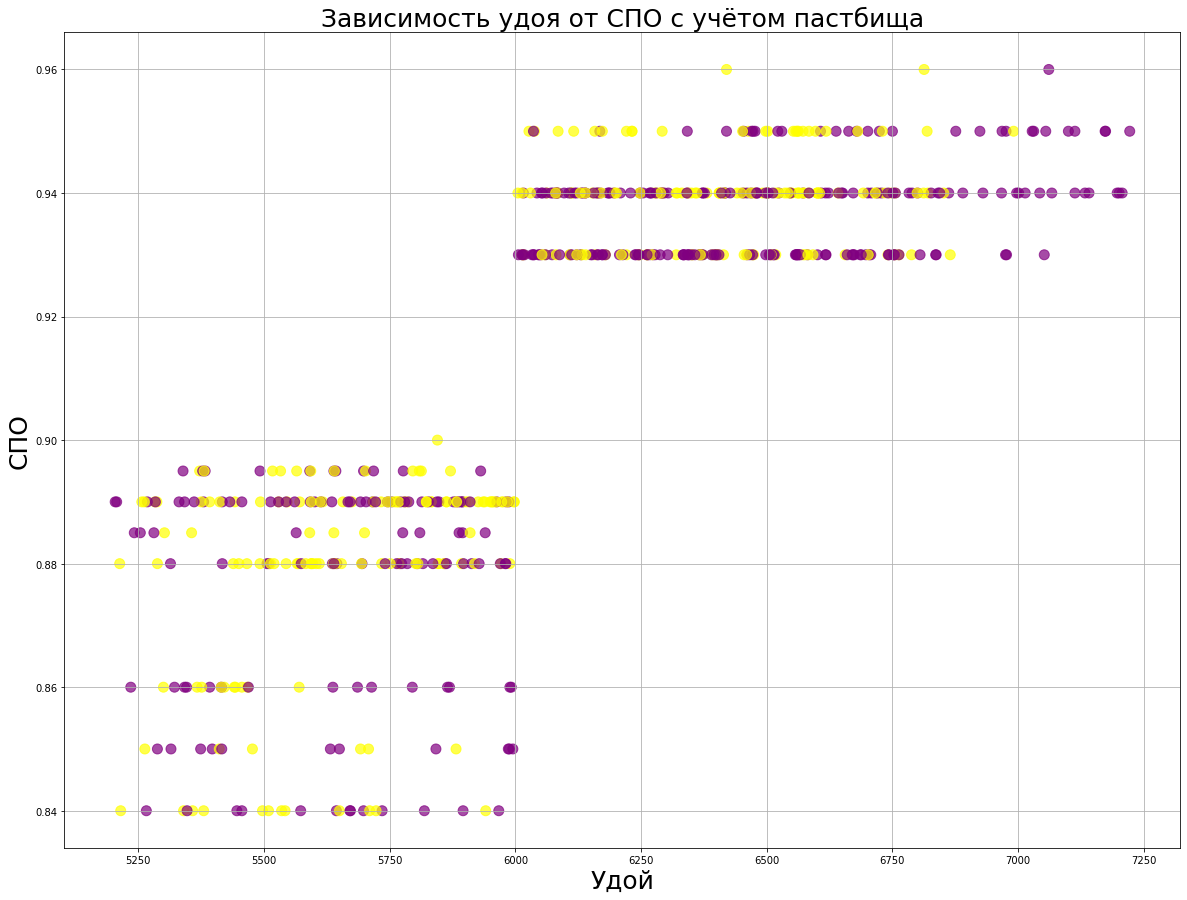

In [52]:
# Диаграмма рассеяния по удою от СПО:
ferma_main.plot.scatter(x='Удой, кг', y='СПО (Сахаро-протеиновое соотношение)', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от СПО с учётом пастбища', fontsize=25)
plt.ylabel('СПО', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Ситуация аналогична графику с учётом породы. Также здесь актуален вывод предыдущего графика: удой больше 7000 только у коров с холмистых пастбищ.

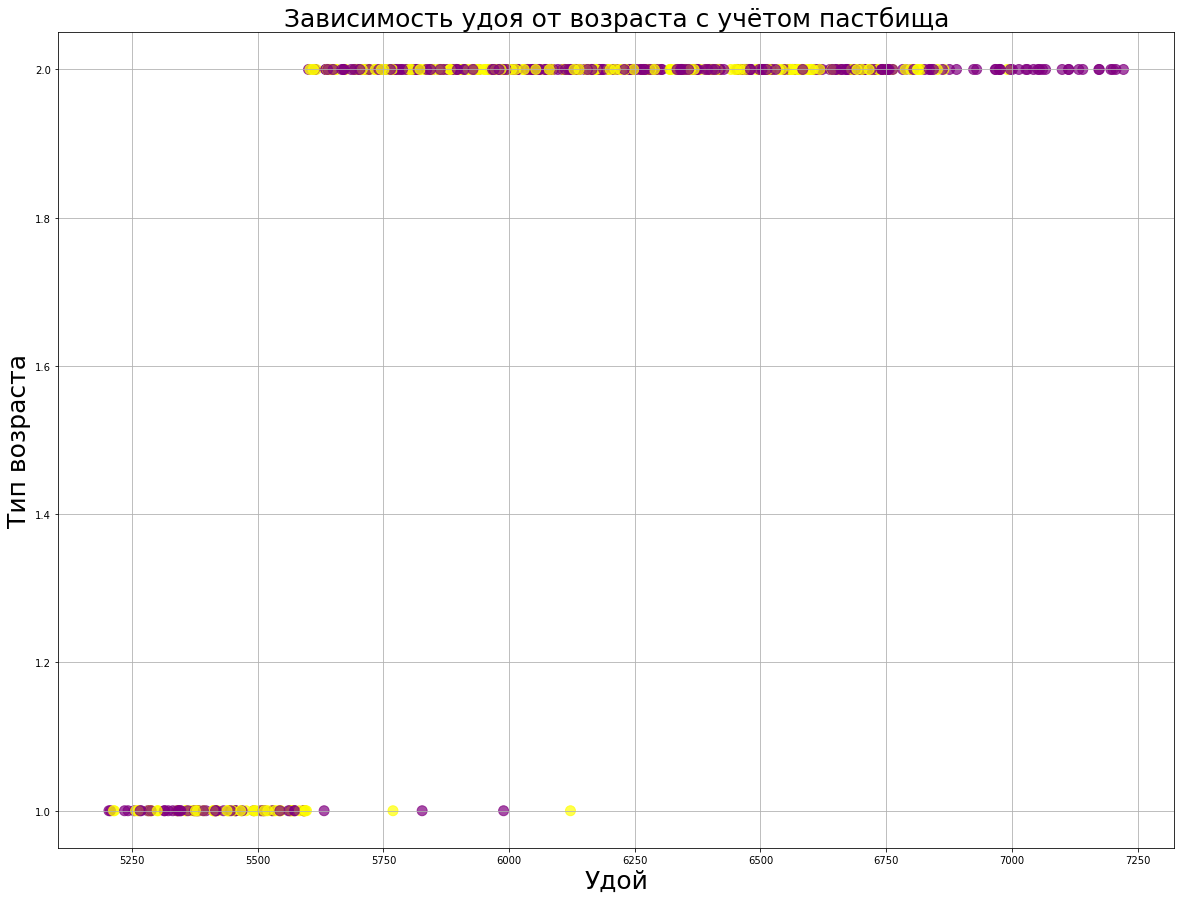

In [53]:
# Диаграмма рассеяния по удою от возраста:
ferma_main.plot.scatter(x='Удой, кг', y='Тип возраста', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от возраста с учётом пастбища', fontsize=25)
plt.ylabel('Тип возраста', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

У молодых коров удой меньше, вывод предыдущие графиков сохраняется.

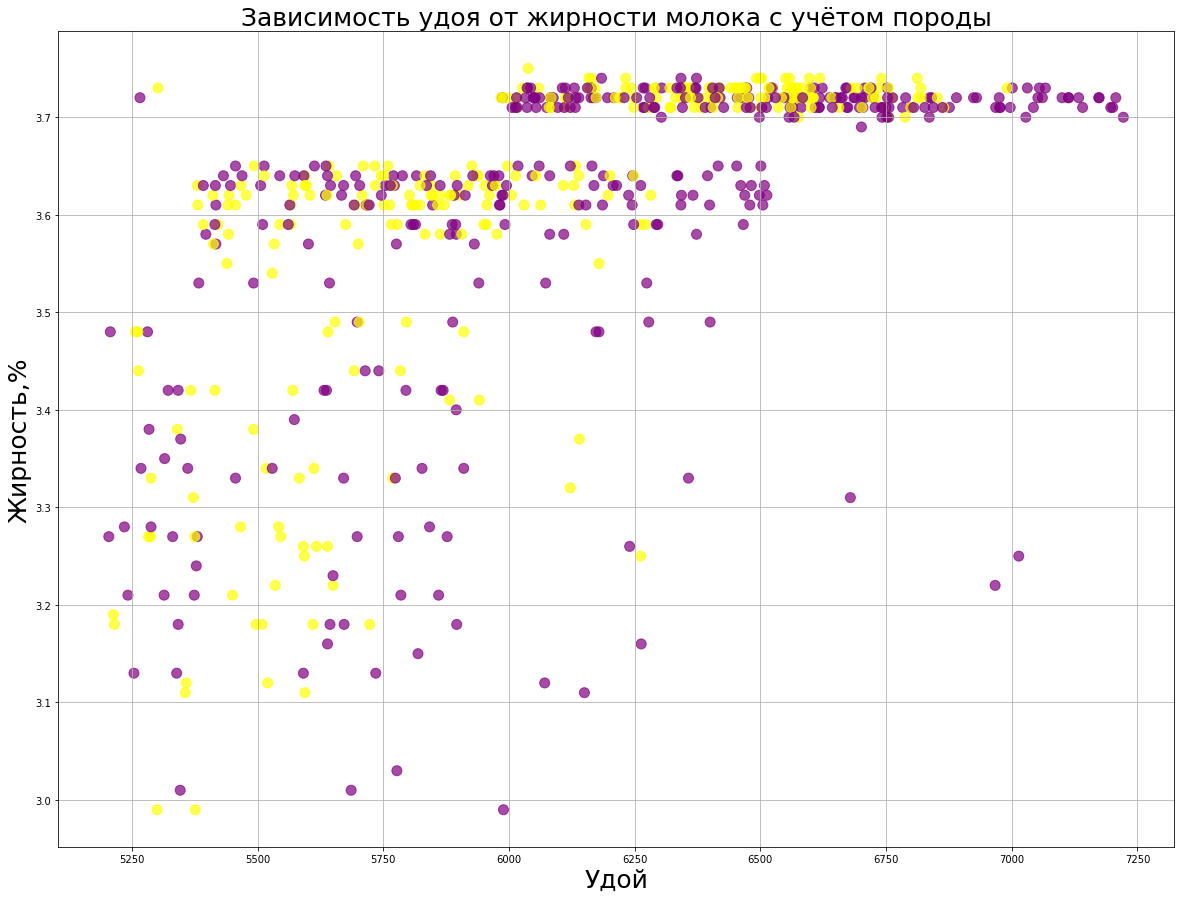

In [54]:
# Диаграмма рассеяния по удою от жирности молока:
ferma_main.plot.scatter(x='Удой, кг', y='Жирность,%', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от жирности молока с учётом породы', fontsize=25)
plt.ylabel('Жирность,%', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

В целом видно, что максимальные/выбивающиеся показатели у коров с холмистых пастбищ.

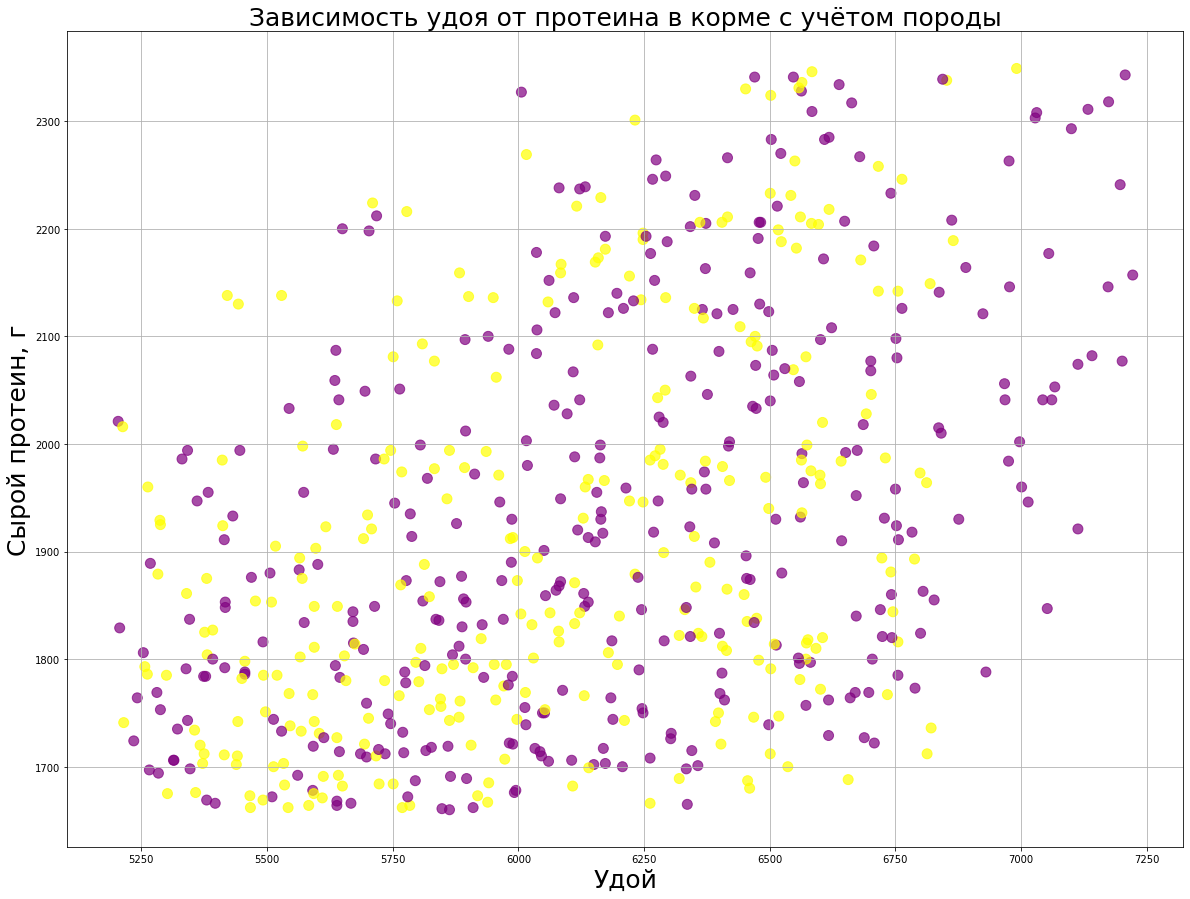

In [55]:
# Диаграмма рассеяния по удою от протеина в корме:
ferma_main.plot.scatter(x='Удой, кг', y='Сырой протеин, г', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от протеина в корме с учётом породы', fontsize=25)
plt.ylabel('Сырой протеин, г', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Связь между параметрами есть, но несильная.

##### Промежуточный вывод:
При рассмотрении отношения удоя с количественными характеристиками с имеющейся корреляционной связью с учётом типа пастбища особей делаем следущие выводы: 
  - в зависимости от ЭКЕ коровы с удоем больше 7000 паслись исключительно на холмистых пастбищах, также зависимость скорее нелинейна;
  - зависимость от СПО ступенчатая - у коров с удоем меньше 6000 показатель СПО находится строго ниже 0.9, а у "более производительных" он начинается с 0.93. Кроме этого, мы видим, что зелёных кружочков больше до 6000 удоя, но, так как изначально в таблице представлено неравное количество особей каждой породы, однозначного вывода сделать нельзя;
  - в зависимости от возраста явно видна закономерность - молодые коровы дают существенно меньше молока;
  - по жирности молока закономерность следующая: максимальные/выбивающиеся показатели у коров с холмистых пастбищ;
  - зависимость от протеина в корме как и от ЭКЕ, но менее выраженная.
  
Таким образом, тип пастбища является фактором, влияющим на удой коров: лучше холмистые.

В зависимости от породы папы быка:

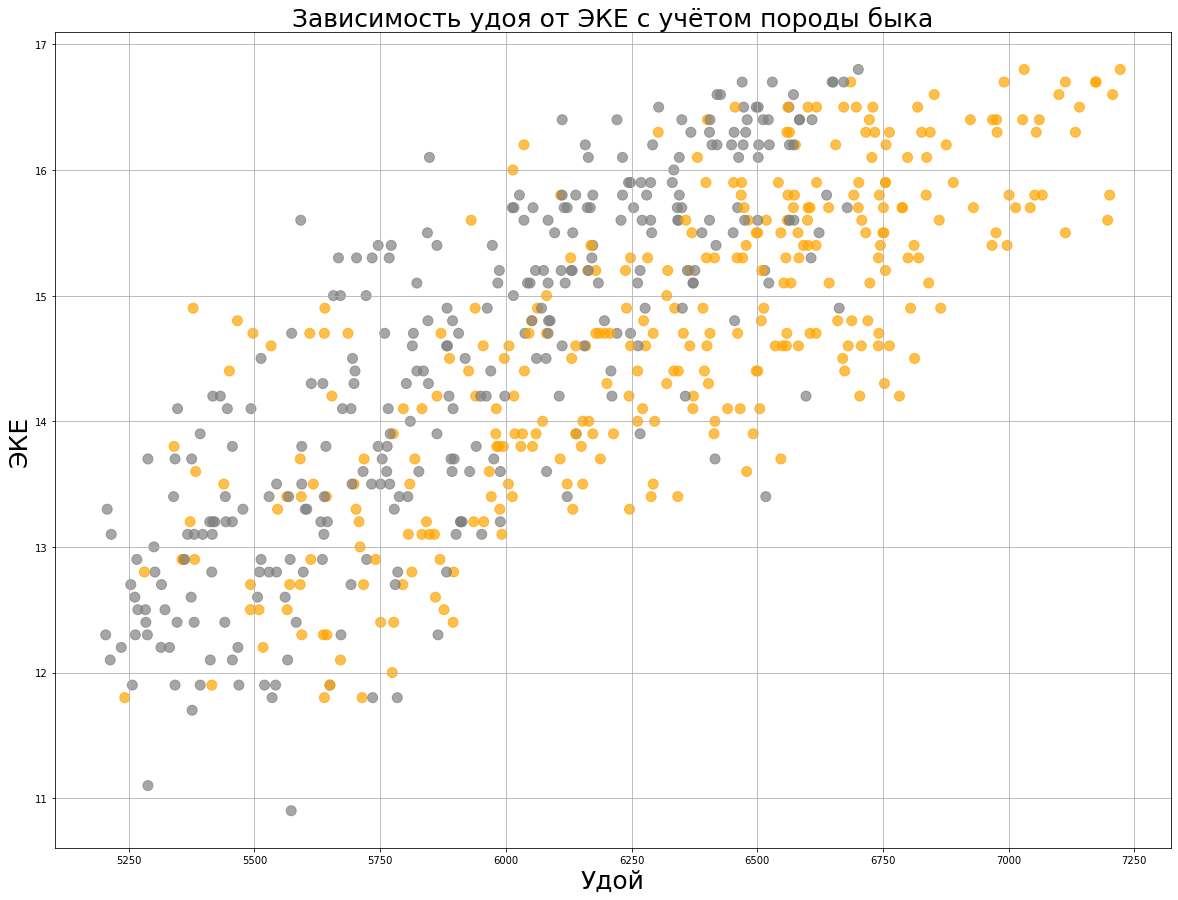

In [56]:
# Создадим словарь для подбора цвета:
color = {'Айдиал': 'orange', 'Соверин': 'grey'}
ferma_main['color'] = ferma_main['Порода папы быка'].apply(lambda x: color[x])

# Диаграмма рассеяния по удою от ЭКЕ:
ferma_main.plot.scatter(x='Удой, кг', y='ЭКЕ (Энергетическая кормовая единица)', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от ЭКЕ с учётом породы быка', fontsize=25)
plt.ylabel('ЭКЕ', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Интересно, все коровы с удоем больше 6750 пошли от быков породы Айдиал.

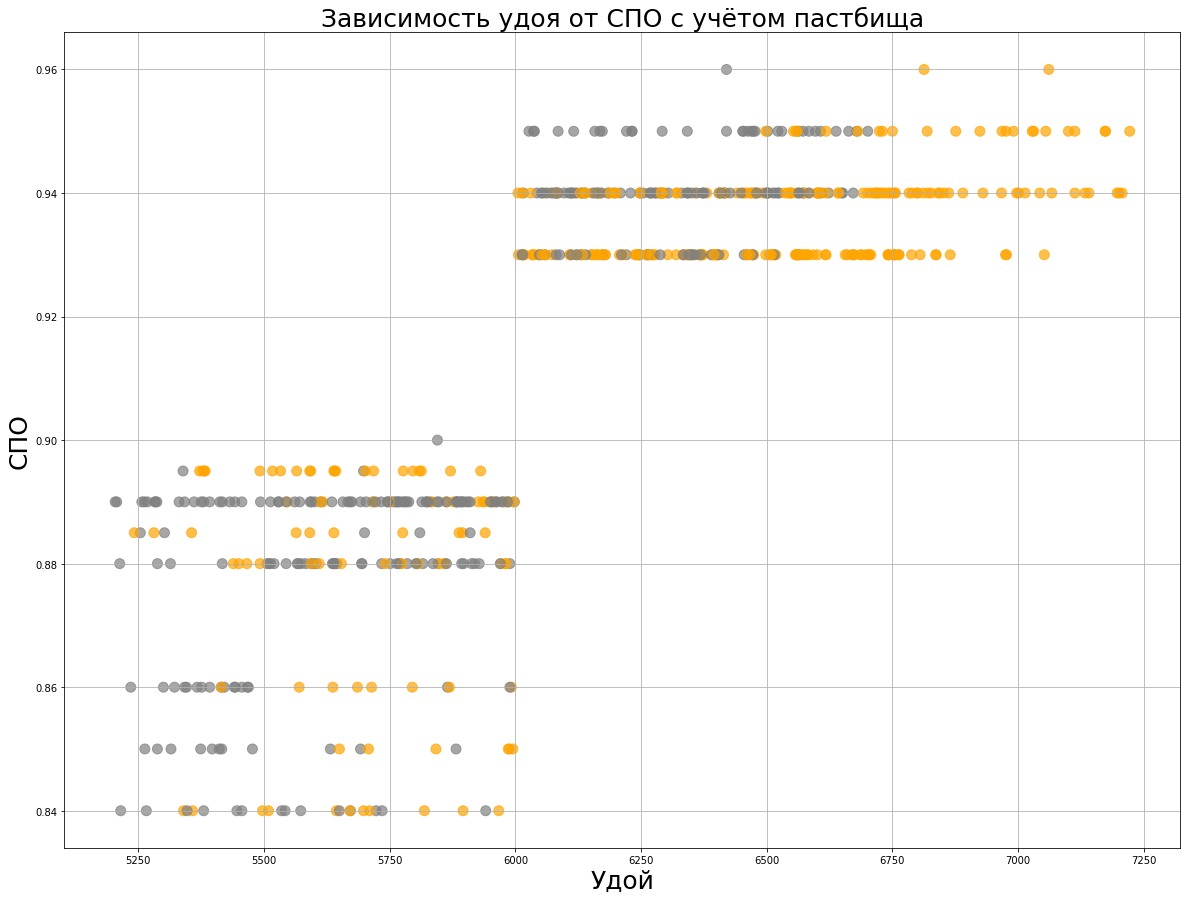

In [57]:
# Диаграмма рассеяния по удою от СПО:
ferma_main.plot.scatter(x='Удой, кг', y='СПО (Сахаро-протеиновое соотношение)', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от СПО с учётом пастбища', fontsize=25)
plt.ylabel('СПО', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Ситуация аналогична предыдущим графикам.

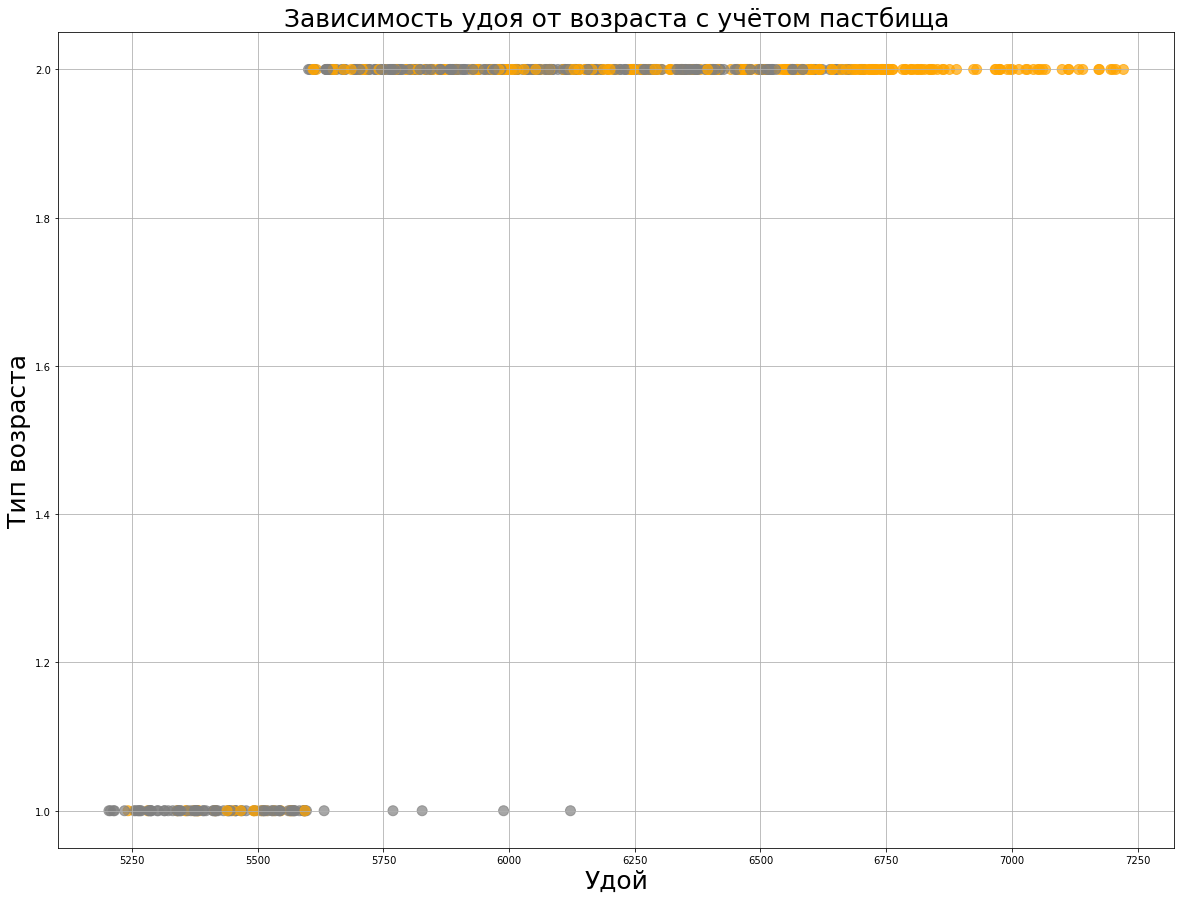

In [58]:
# Диаграмма рассеяния по удою от возраста:
ferma_main.plot.scatter(x='Удой, кг', y='Тип возраста', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от возраста с учётом пастбища', fontsize=25)
plt.ylabel('Тип возраста', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Молодые коровы с выдающимися значениями пошли от быков породы Соверин.

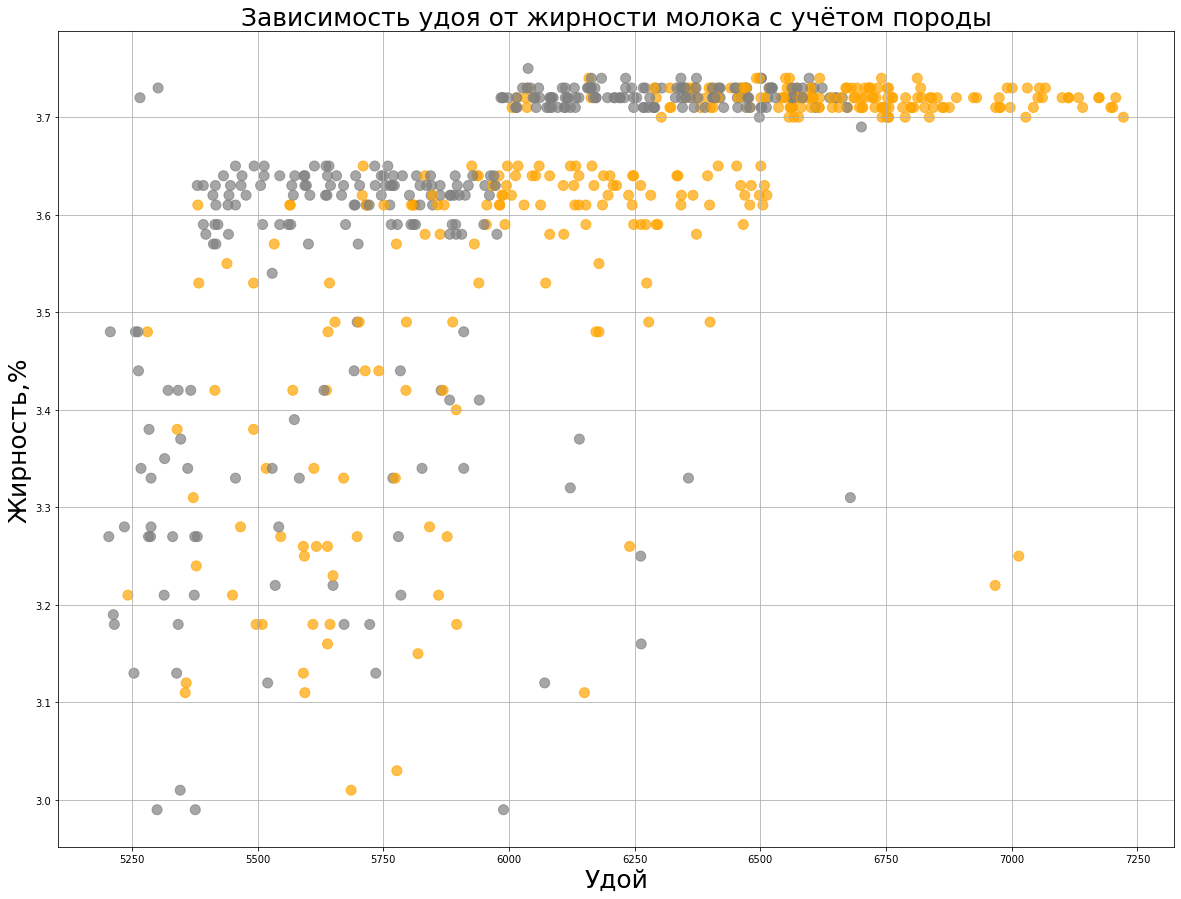

In [59]:
# Диаграмма рассеяния по удою от жирности молока:
ferma_main.plot.scatter(x='Удой, кг', y='Жирность,%', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от жирности молока с учётом породы', fontsize=25)
plt.ylabel('Жирность,%', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

По всем скоплениям точек видно превосходство потомства быков Айдиал.

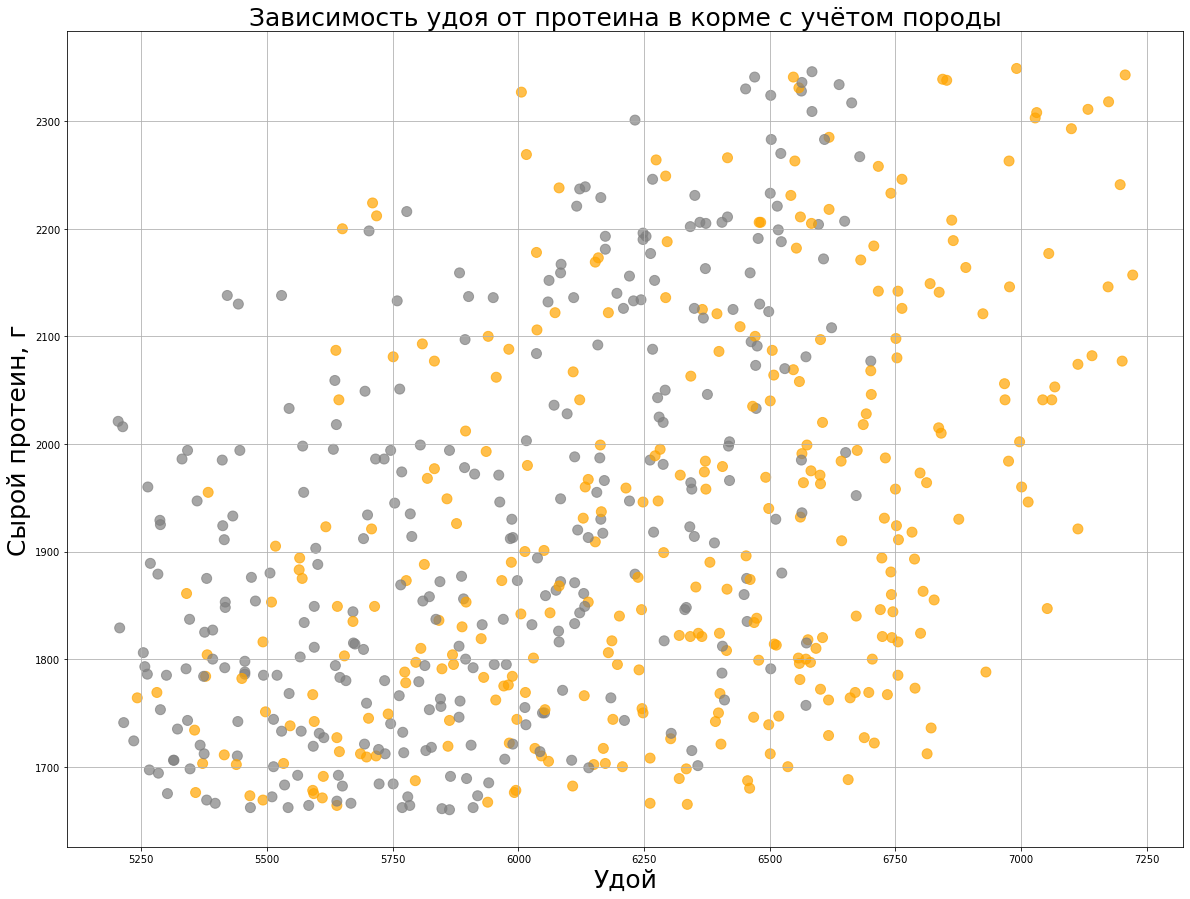

In [60]:
# Диаграмма рассеяния по удою от протеина в корме:
ferma_main.plot.scatter(x='Удой, кг', y='Сырой протеин, г', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от протеина в корме с учётом породы', fontsize=25)
plt.ylabel('Сырой протеин, г', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Выводы аналогичны предыдущим.

##### Промежуточный вывод:
При рассмотрении отношения удоя с количественными характеристиками с имеющейся корреляционной связью с учётом породы папы быка особей делаем следущие выводы: 
  - в зависимости от ЭКЕ все коровы с удоем больше 6750 пошли от быков породы Айдиал;
  - зависимость от СПО ступенчатая - у коров с удоем меньше 6000 показатель СПО находится строго ниже 0.9, а у "более производительных" он начинается с 0.93. Кроме этого, мы видим, что зелёных кружочков больше до 6000 удоя, но, так как изначально в таблице представлено неравное количество особей каждой породы, однозначного вывода сделать нельзя;
  - в зависимости от возраста явно видна закономерность - молодые коровы дают существенно меньше молока. Молодые коровы с выдающимися значениями пошли от быков породы Соверин;
  - по жирности молока закономерность следующая: по всем скоплениям точек видно превосходство потомства быков Айдиал;
  - зависимость от протеина в корме как и от ЭКЕ, но менее выраженная.
  
Таким образом, порода папы быка влияет на удой коровы: у молодых коров от Соверинов удой больше, у особей старше наоборот - явное превосходство потомства Айдиалов.

#### Вывод:
Рассмотрели зависимости всех параметров, влияющих на удой с учётом качественных характеристик.

Всего получили 5 параметров, влияющих на удой коровы:
  1) Корреляция с ЭКЕ: 0.7650977877344268;\
  2) Корреляция с протеином: 0.4467312546088666;\
  3) Корреляция с СПО: 0.8063389252912262;\
  4) Корреляция с возрастом: 0.6607067709686171;\
  5) Корреляция с жирностью молока: 0.6009018484316156.

С учётом качественных характеристик делаем следущие выводы:

  - зависимость от ЭКЕ представляет собой стандартную диаграмму рассеяния, породы распределены одинаково, коровы с удоем больше 7000 паслись исключительно на холмистых пастбищах, все коровы с удоем больше 6750 пошли от быков породы Айдиал;
  - зависимость от СПО ступенчатая - у коров с удоем меньше 6000 показатель СПО находится строго ниже 0.9, а у "более производительных" он начинается с 0.93. Кроме этого, мы видим, что зелёных кружочков больше до 6000 удоя, но, так как изначально в таблице представлено неравное количество особей каждой породы, однозначного вывода сделать нельзя;
  - в зависимости от возраста явно видна закономерность - молодые коровы дают существенно меньше молока. Есть несколько исключений, все они одной породы Вис Бик Айдиал, молодые коровы с выдающимися значениями пошли от быков породы Соверин;
  - по жирности молока закономерность следующая: начиная с 6000 удоя, основная масса коров даёт молоко с жирностью более 3,7%, другая часть (поменьше) имеет удой от 5300 до 6500, жирность колеблется в районе 3,5%. Оставшиеся особи случайно разбросаны по графику, максимальные/выбивающиеся показатели у коров с холмистых пастбищ, по всем скоплениям точек видно превосходство потомства быков Айдиал;
  - зависимость от протеина в корме как и от ЭКЕ, но менее выраженная.

Таким образом, порода самой коровы не играет большой роли в её удое; тип пастбища влияет - лучше холмистые; порода папы быка влияет на удой коровы: у молодых коров от Соверинов удой больше, у особей старше наоборот - явное превосходство потомства Айдиалов.

Получили 8 параметров, которые напрямую влияют на удой коровы. С учётом их суммарного влияния обучим модели МО в следующем пункте. На данном этапе дополнительная информация не требуется.

### Обучение модели линейной регрессии

Нам предстоит обучить 3 модели линейной регрессии, сделать с помощью них прогнозы и сравнить полученные результаты. В качестве целевого признака будет удой коровы, остальные, соответственно, входящими. Обучаться модели будут на датафрейме "ferma_main".

##### Обучение первой модели:

In [61]:
# Ещё раз выведем информацию по дф:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     628 non-null    int64  
 1   Удой, кг                               628 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  628 non-null    float64
 3   Сырой протеин, г                       628 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   628 non-null    float64
 5   Порода                                 628 non-null    object 
 6   Тип пастбища                           628 non-null    object 
 7   Порода папы быка                       628 non-null    object 
 8   Жирность,%                             628 non-null    float64
 9   Белок,%                                628 non-null    float64
 10  Вкус молока                            628 non-null    object 
 11  Возрас

Из корреляционного анализа мы узнали, что на удой прямо влияют следующие параметры: ЭКЕ, сырой протеин, СПО, тип пастбища, порода папы быка, жирность молока, возраст особи. Из логических соображений исключим жирность молока - характеристика не самой коровы, а связь с удоем правильнее будет трактовать в обратную сторону: чем больше удой у коровы, тем больше шанс получить молоко большей жирности.

Разобьём "ferma_main" на тренировочную и тестовую выборки, закодируем качественные признаки и масштабируем количественные.

In [62]:
# Разобьём датафрейм на выборки:
X_1 = ferma_main.drop(['Удой, кг', 'color'], axis=1)
y_1 = ferma_main['Удой, кг']

display(X_1)
print()
display(y_1)

id  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      1                                   14.2              1743   
1      2                                   12.8              2138   
2      3                                   14.0              1854   
3      4                                   12.4              2012   
4      5                                   12.8              1675   
..   ...                                    ...               ...   
624  625                                   15.4              1964   
625  626                                   12.9              1700   
626  627                                   14.4              1837   
627  628                                   13.8              1994   
628  629                                   16.2              2283   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                   0.890   Вис Бик Айдиал    Равнинное   
1                                   0.890   Вис Бик Айдиал    Равнинное   
2                                   0.885  РефлешнСоверинг    Холмистое   
3                                   0.885  РефлешнСоверинг    Холмистое   
4                                   0.885   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
624                                 0.940  РефлешнСоверинг    Равнинное   
625                                 0.880  РефлешнСоверинг    Равнинное   
626                                 0.880  РефлешнСоверинг    Холмистое   
627                                 0.890  РефлешнСоверинг    Равнинное   
628                                 0.940   Вис Бик Айдиал    Холмистое   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0             Айдиал        3.58    3.076      вкусно  более_2_лет   
1            Соверин        3.54    3.079      вкусно  менее_2_лет   
2            Соверин        3.59    3.074   не вкусно  более_2_лет   
3             Айдиал        3.40    3.075   не вкусно  более_2_лет   
4            Соверин        3.73    3.073      вкусно  менее_2_лет   
..               ...         ...      ...         ...          ...   
624           Айдиал        3.74    3.075   не вкусно  более_2_лет   
625          Соверин        3.64    3.073      вкусно  менее_2_лет   
626          Соверин        3.64    3.075   не вкусно  более_2_лет   
627          Соверин        3.64    3.077      вкусно  более_2_лет   
628          Соверин        3.71    3.076      вкусно  более_2_лет   

     Тип возраста  
0               2  
1               1  
2               2  
3               2  
4               1  
..            ...  
624             2  
625             1  
626             2  
627             2  
628             2  

[628 rows x 12 columns]

0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: Удой, кг, Length: 628, dtype: int64

In [63]:
# Создадим константу для деления:
rs = 42

# Разделим датафрейм на тренировочную и тестовую выборки:
X_train_1, X_test_1, y_train_1, y_test_1 = tts(X_1, y_1, random_state = rs)
display(X_train_1)

id  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
508  509                                   16.5              2123   
383  384                                   12.5              1889   
587  588                                   14.7              1671   
197  198                                   14.4              2063   
328  329                                   13.1              2077   
..   ...                                    ...               ...   
72    73                                   13.7              2212   
107  108                                   14.9              1742   
271  272                                   13.4              1775   
436  437                                   13.1              1949   
103  104                                   12.7              1767   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
508                                 0.940  РефлешнСоверинг    Холмистое   
383                                 0.890  РефлешнСоверинг    Холмистое   
587                                 0.880   Вис Бик Айдиал    Равнинное   
197                                 0.940   Вис Бик Айдиал    Холмистое   
328                                 0.890   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
72                                  0.895  РефлешнСоверинг    Холмистое   
107                                 0.930   Вис Бик Айдиал    Равнинное   
271                                 0.880  РефлешнСоверинг    Равнинное   
436                                 0.880   Вис Бик Айдиал    Равнинное   
103                                 0.885   Вис Бик Айдиал    Равнинное   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
508          Соверин        3.70    3.074      вкусно  более_2_лет   
383          Соверин        3.34    3.072      вкусно  менее_2_лет   
587           Айдиал        3.18    3.079   не вкусно  более_2_лет   
197           Айдиал        3.62    3.079      вкусно  более_2_лет   
328           Айдиал        3.64    3.076      вкусно  более_2_лет   
..               ...         ...      ...         ...          ...   
72            Айдиал        3.61    3.077      вкусно  более_2_лет   
107           Айдиал        3.72    3.073      вкусно  более_2_лет   
271           Айдиал        3.63    3.071      вкусно  более_2_лет   
436           Айдиал        3.61    3.075   не вкусно  более_2_лет   
103           Айдиал        3.26    3.075   не вкусно  менее_2_лет   

     Тип возраста  
508             2  
383             1  
587             2  
197             2  
328             2  
..            ...  
72              2  
107             2  
271             2  
436             2  
103             1  

[471 rows x 12 columns]

In [64]:
# Закодируем качественные параметры:
encoder = OneHotEncoder(drop='first', sparse=False)

# Столбцы с качественными параметрами:
cat_col_names = ['Порода', 'Порода папы быка', 'Тип пастбища', 'Возраст']

X_train_ohe_1 = encoder.fit_transform(X_train_1[cat_col_names])
X_test_ohe_1 = encoder.transform(X_test_1[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Преобразование в датафреймы:
X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns=encoder_col_names)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns=encoder_col_names)

display(X_train_ohe_1)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет
0                   1.0         1.0           1.0             0.0
1                   1.0         1.0           1.0             1.0
2                   0.0         0.0           0.0             0.0
3                   0.0         0.0           1.0             0.0
4                   0.0         0.0           0.0             0.0
..                  ...         ...           ...             ...
466                 1.0         0.0           1.0             0.0
467                 0.0         0.0           0.0             0.0
468                 1.0         0.0           0.0             0.0
469                 0.0         0.0           0.0             0.0
470                 0.0         0.0           0.0             1.0

[471 rows x 4 columns]

In [65]:
# Масштабируем количественные параметры:
scaler = StandardScaler()

# Столбцы с количественными параметрами:
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']

X_train_scaled_1 = scaler.fit_transform(X_train_1[num_col_names])
X_test_scaled_1 = scaler.transform(X_test_1[num_col_names])

# Преобразование в датафреймы:
X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns=num_col_names)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns=num_col_names)

display(X_train_scaled_1)

ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0                                 1.502378          1.079523   
1                                -1.557270         -0.196920   
2                                 0.125537         -1.386085   
3                                -0.103937          0.752230   
4                                -1.098323          0.828598   
..                                     ...               ...   
466                              -0.639376          1.565008   
467                               0.278519         -0.998788   
468                              -0.868849         -0.818777   
469                              -1.098323          0.130373   
470                              -1.404288         -0.862416   

     СПО (Сахаро-протеиновое соотношение)  
0                                0.837130  
1                               -0.703660  
2                               -1.011818  
3                                0.837130  
4                               -0.703660  
..                                    ...  
466                             -0.549581  
467                              0.528972  
468                             -1.011818  
469                             -1.011818  
470                             -0.857739  

[471 rows x 3 columns]

In [66]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы, сбрасывая индексы:
X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)

display(X_train_1)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  \
0                   1.0         1.0           1.0             0.0   
1                   1.0         1.0           1.0             1.0   
2                   0.0         0.0           0.0             0.0   
3                   0.0         0.0           1.0             0.0   
4                   0.0         0.0           0.0             0.0   
..                  ...         ...           ...             ...   
466                 1.0         0.0           1.0             0.0   
467                 0.0         0.0           0.0             0.0   
468                 1.0         0.0           0.0             0.0   
469                 0.0         0.0           0.0             0.0   
470                 0.0         0.0           0.0             1.0   

     ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0                                 1.502378          1.079523   
1                                -1.557270         -0.196920   
2                                 0.125537         -1.386085   
3                                -0.103937          0.752230   
4                                -1.098323          0.828598   
..                                     ...               ...   
466                              -0.639376          1.565008   
467                               0.278519         -0.998788   
468                              -0.868849         -0.818777   
469                              -1.098323          0.130373   
470                              -1.404288         -0.862416   

     СПО (Сахаро-протеиновое соотношение)  
0                                0.837130  
1                               -0.703660  
2                               -1.011818  
3                                0.837130  
4                               -0.703660  
..                                    ...  
466                             -0.549581  
467                              0.528972  
468                             -1.011818  
469                             -1.011818  
470                             -0.857739  

[471 rows x 7 columns]

Выборки готовы для дальнейшей работы. Теперь обучим модель.

In [67]:
# Обучаем модель:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1)

# Делаем предсказания:
predictions_1 = model_lr_1.predict(X_test_1)
print(predictions_1[1], y_test_1.reset_index().loc[1, 'Удой, кг'])

6433.102409373978 6512


На первый взгляд получилось довольно неплохо. Убедимся в этом с помощью проверок.

In [68]:
# Расчёт коэффициента детерминации:
r2_1 = r2_score(y_test_1, predictions_1)

print("R2 LinearRegression =", r2_1)

R2 LinearRegression = 0.784407817341697


Среднее по остаткам: -25.373286208200387
Медиана по остаткам: -34.294515556111946


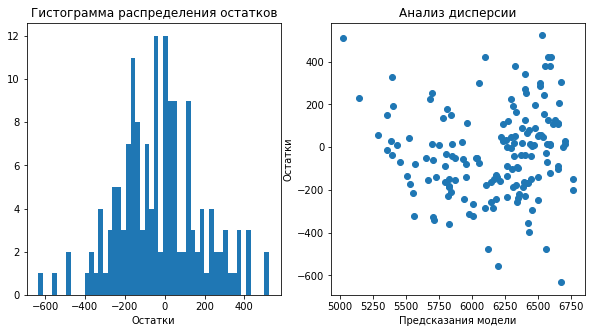

In [69]:
# Проведём анализ остатков:
residuals_1 = y_test_1 - predictions_1
print('Среднее по остаткам:', residuals_1.mean())
print('Медиана по остаткам:', residuals_1.median())

# Строим гистограмму частотности для остатков: 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals_1, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions_1, y = residuals_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

А вот по критериям уже не всё так радужно.

##### Промежуточный вывод:
Создана первая модель МО на основе непреобразованных начальных данных. Коэффициент детерминации близок к 0,8, что говорит о весьма неплохих показателях предсказаний, но анализ остатков показывает значительное несовершенство модели. Гистограмма остатков имеет много выбросов, хоть и напоминает нормальное распределение с небольшим смещением влево; анализ дисперсии также не идеален.

Необходимы дополнительные исследования и преобразования уже имеющихся данных для создания лучшей модели.

##### Обучение второй модели:

Повторно просмотрев 4-ый пункт работы (корреляционный анализ) делаем следующие замечания: зависимость удоя от ЭКЕ на самом деле представляем собой нелинейную зависимость, зависимость от СПО для улучшения предсказаний модели можно преобразовать в качественный признак, разделив значения по видимой границе 0,9, зависимость от протеина в корме слабее двух других, её преобразовывать нет причин.

Начнём с зависимости от ЭКЕ. Попробуем возвести параметр в квадрат; добавим новый столбец в датафрейм и построим диаграмму рассеяния для него.

In [70]:
# Добавление нового столбца:
ferma_main['ЭКЕ в квадрате'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'] ** 2
display(ferma_main.head())

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинное   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинное   

  Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0           Айдиал        3.58    3.076      вкусно  более_2_лет   
1          Соверин        3.54    3.079      вкусно  менее_2_лет   
2          Соверин        3.59    3.074   не вкусно  более_2_лет   
3           Айдиал        3.40    3.075   не вкусно  более_2_лет   
4          Соверин        3.73    3.073      вкусно  менее_2_лет   

   Тип возраста   color  ЭКЕ в квадрате  
0             2  orange          201.64  
1             1    grey          163.84  
2             2    grey          196.00  
3             2  orange          153.76  
4             1    grey          163.84

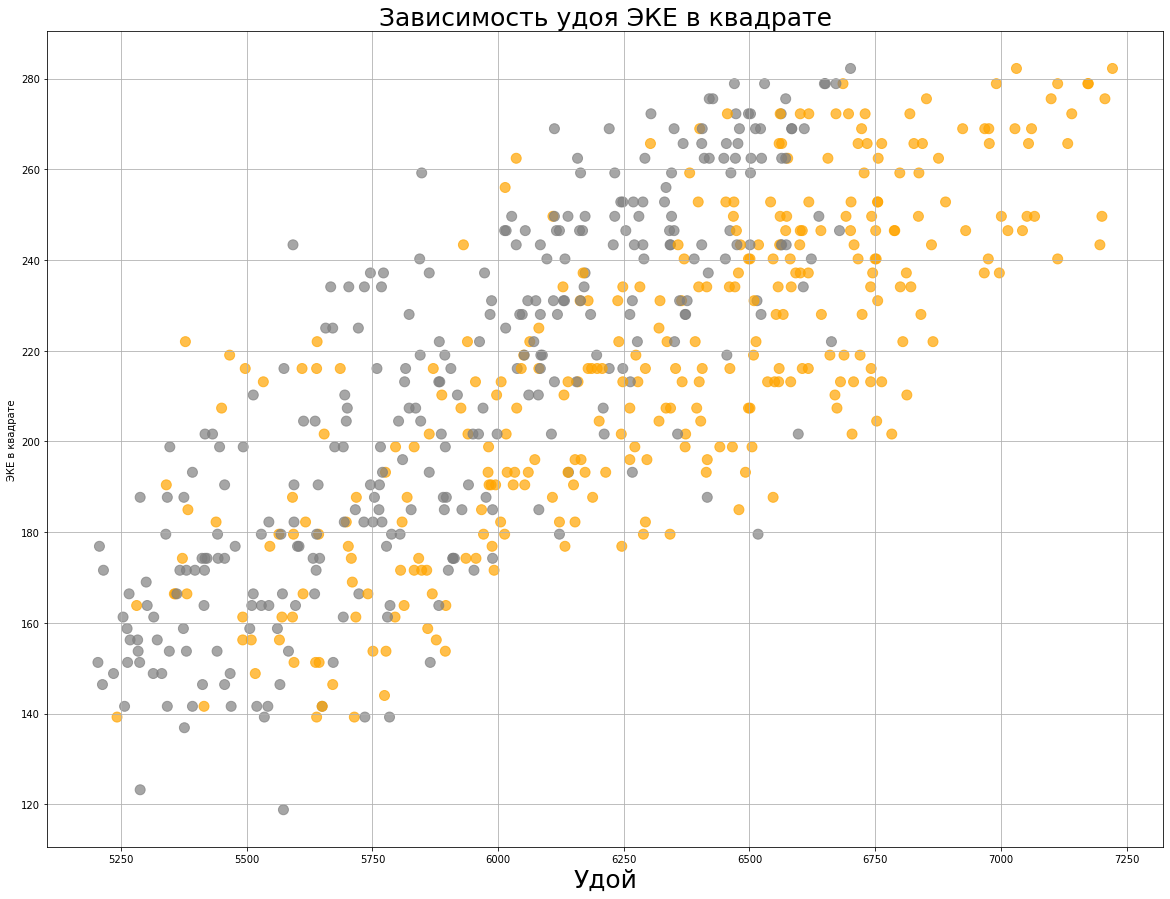

In [71]:
# Диаграмма рассеяния по новому признаку:
ferma_main.plot.scatter(x='Удой, кг', y='ЭКЕ в квадрате', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя ЭКЕ в квадрате', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Видно, что зависимость стала более линейной, значит, модель будет адекватнее её воспринимать.

Напомним, как выглядела количественная зависимость удоя от СПО.

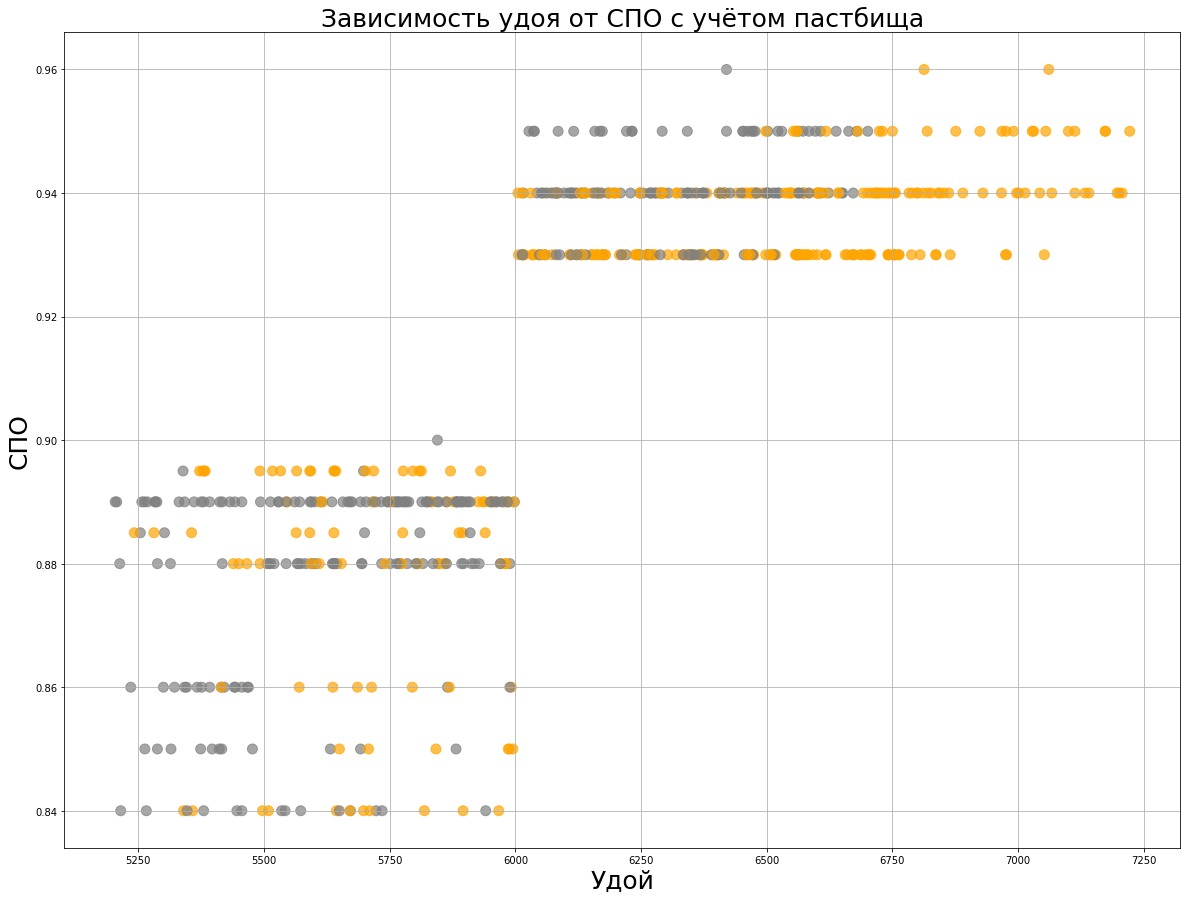

In [72]:
# Диаграмма рассеяния по удою от СПО:
ferma_main.plot.scatter(x='Удой, кг', y='СПО (Сахаро-протеиновое соотношение)', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от СПО с учётом пастбища', fontsize=25)
plt.ylabel('СПО', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Видим явную границу: при значении меньше 0.92 удой строго меньше 6000 кг. Преобразуем эту зависимость в качественный параметр.

In [73]:
# Создание функции для разделения:
def spo_cat(spo):
    if spo < 0.92:
        return 'Нет'
    elif spo > 0.92:
        return 'Да'

# Добавление нового столбца:
ferma_main['СПО больше 0.92'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].apply(spo_cat)
display(ferma_main.head())

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинное   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинное   

  Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0           Айдиал        3.58    3.076      вкусно  более_2_лет   
1          Соверин        3.54    3.079      вкусно  менее_2_лет   
2          Соверин        3.59    3.074   не вкусно  более_2_лет   
3           Айдиал        3.40    3.075   не вкусно  более_2_лет   
4          Соверин        3.73    3.073      вкусно  менее_2_лет   

   Тип возраста   color  ЭКЕ в квадрате СПО больше 0.92  
0             2  orange          201.64             Нет  
1             1    grey          163.84             Нет  
2             2    grey          196.00             Нет  
3             2  orange          153.76             Нет  
4             1    grey          163.84             Нет

Готово, теперь можно использовать понятный качественный признак, вместо нелинейного количественного.

Из количественных характеристик неизменённым осталось только количество сырого протеина в корме, преобразовать его в более удобный формат не получится, поэтому оставим так. Теперь копируем предыдущий подпункт и создаём новую модель с 2 количественными и 3 качественными параметрами.

In [74]:
# Разобьём датафрейм на выборки:
X_2 = ferma_main.drop(['Удой, кг', 'color'], axis=1)
y_2 = ferma_main['Удой, кг']

display(X_2)
print()
display(y_2)

id  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      1                                   14.2              1743   
1      2                                   12.8              2138   
2      3                                   14.0              1854   
3      4                                   12.4              2012   
4      5                                   12.8              1675   
..   ...                                    ...               ...   
624  625                                   15.4              1964   
625  626                                   12.9              1700   
626  627                                   14.4              1837   
627  628                                   13.8              1994   
628  629                                   16.2              2283   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                   0.890   Вис Бик Айдиал    Равнинное   
1                                   0.890   Вис Бик Айдиал    Равнинное   
2                                   0.885  РефлешнСоверинг    Холмистое   
3                                   0.885  РефлешнСоверинг    Холмистое   
4                                   0.885   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
624                                 0.940  РефлешнСоверинг    Равнинное   
625                                 0.880  РефлешнСоверинг    Равнинное   
626                                 0.880  РефлешнСоверинг    Холмистое   
627                                 0.890  РефлешнСоверинг    Равнинное   
628                                 0.940   Вис Бик Айдиал    Холмистое   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0             Айдиал        3.58    3.076      вкусно  более_2_лет   
1            Соверин        3.54    3.079      вкусно  менее_2_лет   
2            Соверин        3.59    3.074   не вкусно  более_2_лет   
3             Айдиал        3.40    3.075   не вкусно  более_2_лет   
4            Соверин        3.73    3.073      вкусно  менее_2_лет   
..               ...         ...      ...         ...          ...   
624           Айдиал        3.74    3.075   не вкусно  более_2_лет   
625          Соверин        3.64    3.073      вкусно  менее_2_лет   
626          Соверин        3.64    3.075   не вкусно  более_2_лет   
627          Соверин        3.64    3.077      вкусно  более_2_лет   
628          Соверин        3.71    3.076      вкусно  более_2_лет   

     Тип возраста  ЭКЕ в квадрате СПО больше 0.92  
0               2          201.64             Нет  
1               1          163.84             Нет  
2               2          196.00             Нет  
3               2          153.76             Нет  
4               1          163.84             Нет  
..            ...             ...             ...  
624             2          237.16              Да  
625             1          166.41             Нет  
626             2          207.36             Нет  
627             2          190.44             Нет  
628             2          262.44              Да  

[628 rows x 14 columns]

0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: Удой, кг, Length: 628, dtype: int64

In [75]:
# Создадим константу для деления:
rs = 42

# Разделим датафрейм на тренировочную и тестовую выборки:
X_train_2, X_test_2, y_train_2, y_test_2 = tts(X_2, y_2, random_state = rs)
display(X_train_2)

id  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
508  509                                   16.5              2123   
383  384                                   12.5              1889   
587  588                                   14.7              1671   
197  198                                   14.4              2063   
328  329                                   13.1              2077   
..   ...                                    ...               ...   
72    73                                   13.7              2212   
107  108                                   14.9              1742   
271  272                                   13.4              1775   
436  437                                   13.1              1949   
103  104                                   12.7              1767   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
508                                 0.940  РефлешнСоверинг    Холмистое   
383                                 0.890  РефлешнСоверинг    Холмистое   
587                                 0.880   Вис Бик Айдиал    Равнинное   
197                                 0.940   Вис Бик Айдиал    Холмистое   
328                                 0.890   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
72                                  0.895  РефлешнСоверинг    Холмистое   
107                                 0.930   Вис Бик Айдиал    Равнинное   
271                                 0.880  РефлешнСоверинг    Равнинное   
436                                 0.880   Вис Бик Айдиал    Равнинное   
103                                 0.885   Вис Бик Айдиал    Равнинное   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
508          Соверин        3.70    3.074      вкусно  более_2_лет   
383          Соверин        3.34    3.072      вкусно  менее_2_лет   
587           Айдиал        3.18    3.079   не вкусно  более_2_лет   
197           Айдиал        3.62    3.079      вкусно  более_2_лет   
328           Айдиал        3.64    3.076      вкусно  более_2_лет   
..               ...         ...      ...         ...          ...   
72            Айдиал        3.61    3.077      вкусно  более_2_лет   
107           Айдиал        3.72    3.073      вкусно  более_2_лет   
271           Айдиал        3.63    3.071      вкусно  более_2_лет   
436           Айдиал        3.61    3.075   не вкусно  более_2_лет   
103           Айдиал        3.26    3.075   не вкусно  менее_2_лет   

     Тип возраста  ЭКЕ в квадрате СПО больше 0.92  
508             2          272.25              Да  
383             1          156.25             Нет  
587             2          216.09             Нет  
197             2          207.36              Да  
328             2          171.61             Нет  
..            ...             ...             ...  
72              2          187.69             Нет  
107             2          222.01              Да  
271             2          179.56             Нет  
436             2          171.61             Нет  
103             1          161.29             Нет  

[471 rows x 14 columns]

In [76]:
# Кодируем категориальные признаки:
encoder = OneHotEncoder(drop='if_binary', sparse=False)

# Столбцы с качественными параметрами:
cat_col_names = ['Порода', 'Порода папы быка', 'Тип пастбища', 'Возраст', 'СПО больше 0.92']

X_train_ohe_2 = encoder.fit_transform(X_train_2[cat_col_names])
X_test_ohe_2 = encoder.transform(X_test_2[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Преобразование в датафреймы:
X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names)

display(X_train_ohe_2)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Нет
0                   1.0         1.0           1.0             0.0     0.0
1                   1.0         1.0           1.0             1.0     1.0
2                   0.0         0.0           0.0             0.0     1.0
3                   0.0         0.0           1.0             0.0     0.0
4                   0.0         0.0           0.0             0.0     1.0
..                  ...         ...           ...             ...     ...
466                 1.0         0.0           1.0             0.0     1.0
467                 0.0         0.0           0.0             0.0     0.0
468                 1.0         0.0           0.0             0.0     1.0
469                 0.0         0.0           0.0             0.0     1.0
470                 0.0         0.0           0.0             1.0     1.0

[471 rows x 5 columns]

In [77]:
# Масштабируем количественные признаки:
scaler = StandardScaler()

# Столбцы с количественными параметрами:
num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']

X_train_scaled_2 = scaler.fit_transform(X_train_2[num_col_names])
X_test_scaled_2 = scaler.transform(X_test_2[num_col_names])

# Преобразование в датафреймы:
X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names)

display(X_train_scaled_2)

ЭКЕ в квадрате  Сырой протеин, г
0          1.577968          1.079523
1         -1.511438         -0.196920
2          0.082269         -1.386085
3         -0.150235          0.752230
4         -1.102358          0.828598
..              ...               ...
466       -0.674102          1.565008
467        0.239936         -0.998788
468       -0.890627         -0.818777
469       -1.102358          0.130373
470       -1.377208         -0.862416

[471 rows x 2 columns]

In [78]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы, сбрасывая индексы:
X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

display(X_train_2)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Нет  \
0                   1.0         1.0           1.0             0.0     0.0   
1                   1.0         1.0           1.0             1.0     1.0   
2                   0.0         0.0           0.0             0.0     1.0   
3                   0.0         0.0           1.0             0.0     0.0   
4                   0.0         0.0           0.0             0.0     1.0   
..                  ...         ...           ...             ...     ...   
466                 1.0         0.0           1.0             0.0     1.0   
467                 0.0         0.0           0.0             0.0     0.0   
468                 1.0         0.0           0.0             0.0     1.0   
469                 0.0         0.0           0.0             0.0     1.0   
470                 0.0         0.0           0.0             1.0     1.0   

     ЭКЕ в квадрате  Сырой протеин, г  
0          1.577968          1.079523  
1         -1.511438         -0.196920  
2          0.082269         -1.386085  
3         -0.150235          0.752230  
4         -1.102358          0.828598  
..              ...               ...  
466       -0.674102          1.565008  
467        0.239936         -0.998788  
468       -0.890627         -0.818777  
469       -1.102358          0.130373  
470       -1.377208         -0.862416  

[471 rows x 7 columns]

In [79]:
# Обучаем модель:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)

# Делаем предсказания:
predictions_2 = model_lr_2.predict(X_test_2)
print(predictions_2[1], y_test_2.reset_index().loc[1, 'Удой, кг'])

6466.6556613630255 6512


Достаточно близко, смотрим на математические характеристики результатов.

In [80]:
# Расчёт коэффициента детерминации:
r2_2 = r2_score(y_test_2, predictions_2)
print("R2 LinearRegression =", r2_2)

R2 LinearRegression = 0.8180879926867503


Среднее по остаткам: -24.372798135531983
Медиана по остаткам: -27.87125863129586


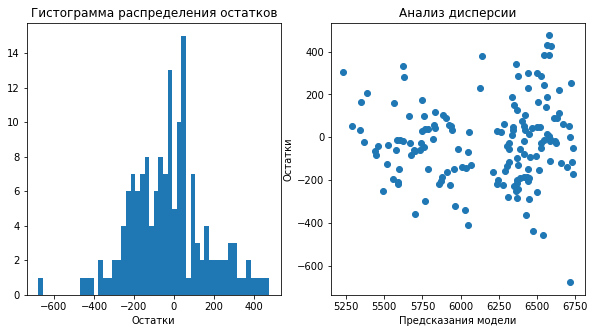

In [81]:
# Проведём анализ остатков:
residuals_2 = y_test_2 - predictions_2
print('Среднее по остаткам:', residuals_2.mean())
print('Медиана по остаткам:', residuals_2.median())

# Строим гистограмму частотности для остатков: 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals_2, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions_2, y = residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Коэффициент детерминации уверенно перевалил за 0.8, анализ остатков также показывает улучшение результата (среднее и медиана уменьшили разброс на треть/четверть). Однако результат всё ещё недостаточно близок к точному прогнозированию.

##### Промежуточный вывод:
Были обработаны и преобразованы уже имеющиеся данные: показатель ЭКЕ возведён в квадрат для большей линейности, СПО преобразовано в качественный признак. В результате получили улучшение предсказаний модели: коэффициент детерминации увеличился с 0.78 до 0.81, остатки показали уменьшение (вместо среднего -25.4 и медианы -34.8 получили -19.5 и -26.0 соответственно). Однако такое улучшение всё ещё не делает модель достоверной. В связи с этим делаем вывод о необходимости сбора дополнительной информации и добавлении её в исходник.

##### Обучение третьей модели:

Из неиспользованных данных у нас осталась вторая таблица "ferma_dad". Как стало понятно из корреляционного анализа, порода папы однозначно влияет на удой коровы, попробуем добавить в изначальный датафрейм данные об имени папы и посмотрим зависимость целевого параметра от него.

In [82]:
# Объединение таблиц:
ferma_main = ferma_main.merge(ferma_dad)
display(ferma_main.head())

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинное   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинное   

  Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0           Айдиал        3.58    3.076      вкусно  более_2_лет   
1          Соверин        3.54    3.079      вкусно  менее_2_лет   
2          Соверин        3.59    3.074   не вкусно  более_2_лет   
3           Айдиал        3.40    3.075   не вкусно  более_2_лет   
4          Соверин        3.73    3.073      вкусно  менее_2_лет   

   Тип возраста   color  ЭКЕ в квадрате СПО больше 0.92  Имя папы  
0             2  orange          201.64             Нет    Буйный  
1             1    grey          163.84             Нет  Соловчик  
2             2    grey          196.00             Нет     Барин  
3             2  orange          153.76             Нет    Буйный  
4             1    grey          163.84             Нет     Барин

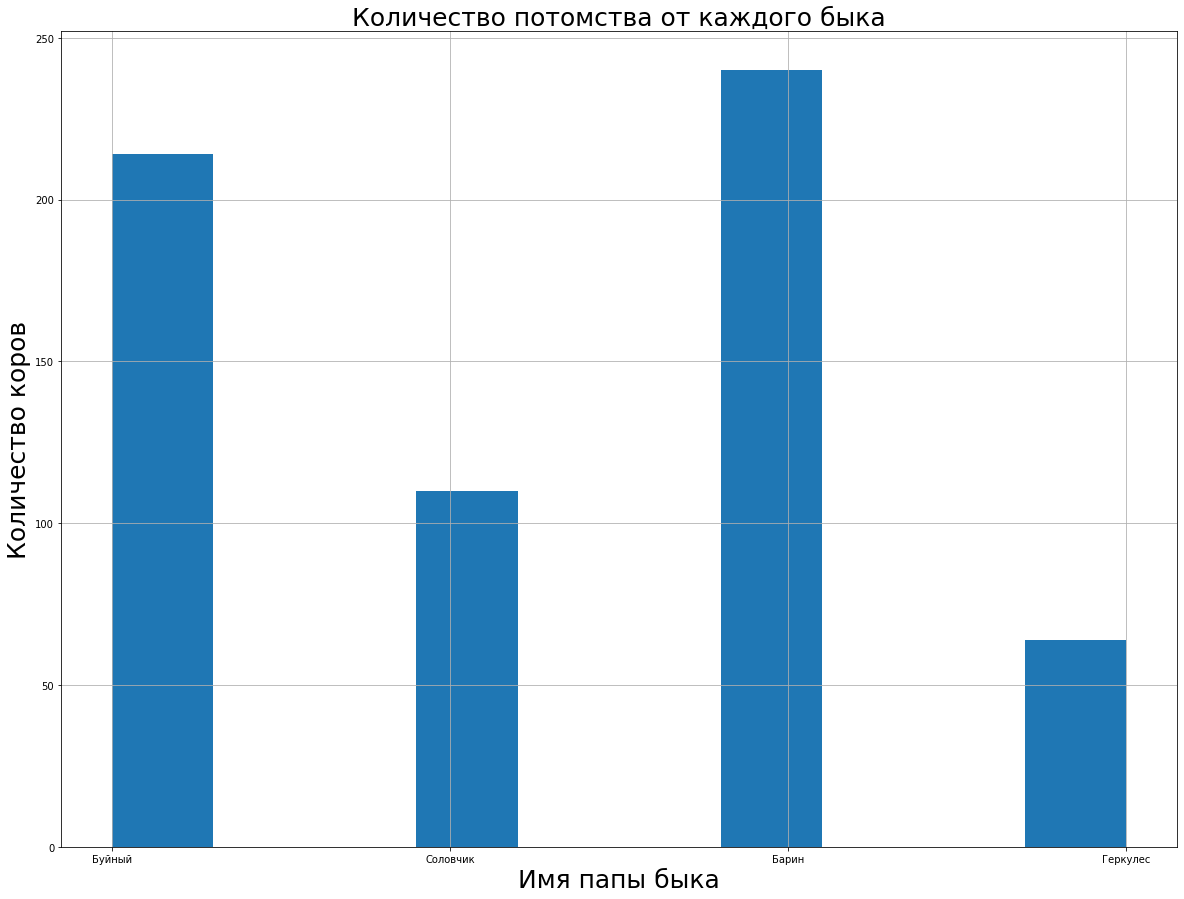

In [83]:
# Посмотрим общую статистику:
ferma_main['Имя папы'].hist(figsize=(20, 15))
plt.title('Количество потомства от каждого быка', fontsize=25)
plt.ylabel('Количество коров', fontsize=25)
plt.xlabel('Имя папы быка', fontsize=25)
plt.show()

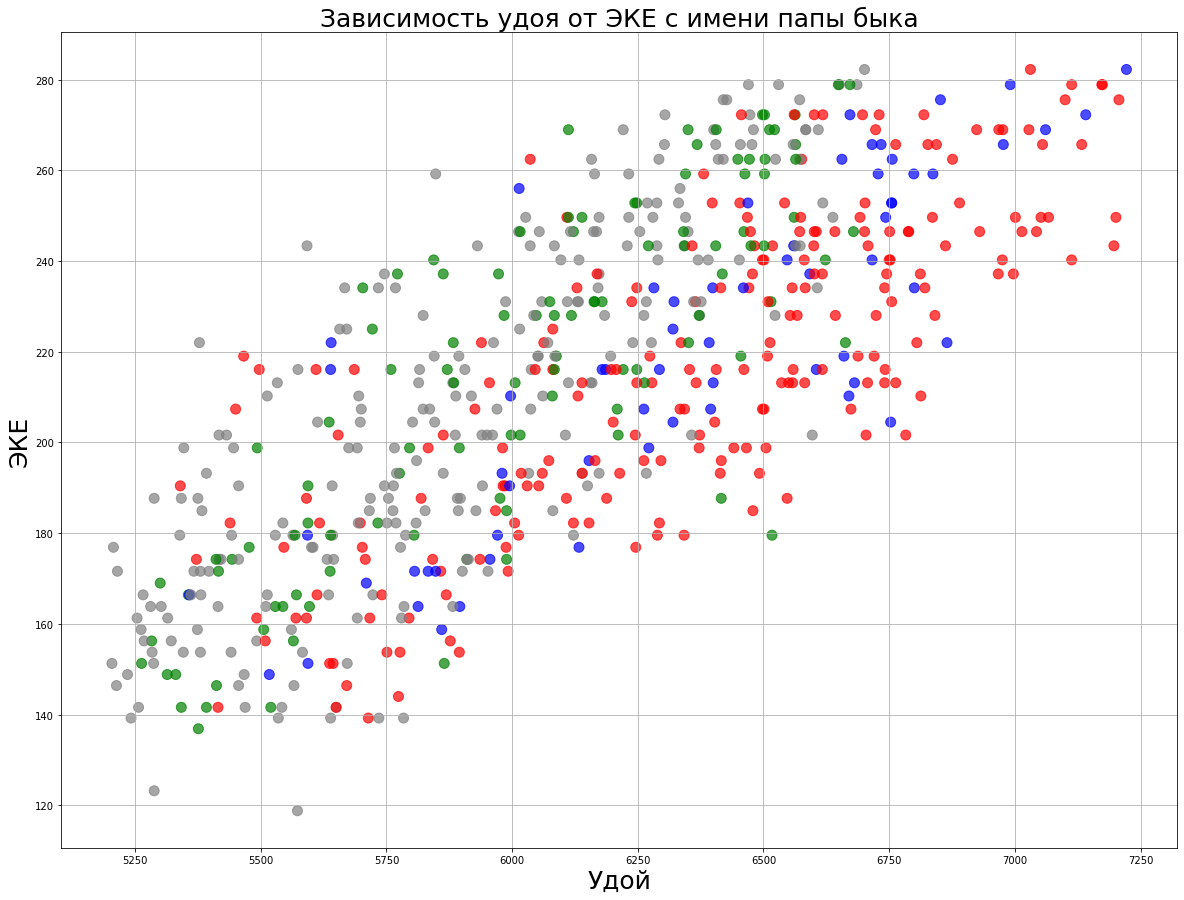

In [84]:
# Создадим словарь для подбора цвета:
color = {'Буйный': 'red', 'Соловчик': 'green', 'Барин': 'grey', 'Геркулес': 'blue'}
ferma_main['color'] = ferma_main['Имя папы'].apply(lambda x: color[x])

# Диаграмма рассеяния по удою от ЭКЕ:
ferma_main.plot.scatter(x='Удой, кг', y='ЭКЕ в квадрате', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость удоя от ЭКЕ с имени папы быка', fontsize=25)
plt.ylabel('ЭКЕ', fontsize=25)
plt.xlabel('Удой', fontsize=25)
plt.show()

Потомство Буйного и Геркулеса явно работоспособнее, а вот у Барина с генами хуже, хотя больше всего коров пошло от него.

Используем параметры для второй модели, добавив в них новый качественный признак.

In [85]:
# Разобьём датафрейм на выборки:
X_3 = ferma_main.drop('Удой, кг', axis=1)
y_3 = ferma_main['Удой, кг']

display(X_3)
print()
display(y_3)

id  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      1                                   14.2              1743   
1      2                                   12.8              2138   
2      3                                   14.0              1854   
3      4                                   12.4              2012   
4      5                                   12.8              1675   
..   ...                                    ...               ...   
623  625                                   15.4              1964   
624  626                                   12.9              1700   
625  627                                   14.4              1837   
626  628                                   13.8              1994   
627  629                                   16.2              2283   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                   0.890   Вис Бик Айдиал    Равнинное   
1                                   0.890   Вис Бик Айдиал    Равнинное   
2                                   0.885  РефлешнСоверинг    Холмистое   
3                                   0.885  РефлешнСоверинг    Холмистое   
4                                   0.885   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
623                                 0.940  РефлешнСоверинг    Равнинное   
624                                 0.880  РефлешнСоверинг    Равнинное   
625                                 0.880  РефлешнСоверинг    Холмистое   
626                                 0.890  РефлешнСоверинг    Равнинное   
627                                 0.940   Вис Бик Айдиал    Холмистое   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0             Айдиал        3.58    3.076      вкусно  более_2_лет   
1            Соверин        3.54    3.079      вкусно  менее_2_лет   
2            Соверин        3.59    3.074   не вкусно  более_2_лет   
3             Айдиал        3.40    3.075   не вкусно  более_2_лет   
4            Соверин        3.73    3.073      вкусно  менее_2_лет   
..               ...         ...      ...         ...          ...   
623           Айдиал        3.74    3.075   не вкусно  более_2_лет   
624          Соверин        3.64    3.073      вкусно  менее_2_лет   
625          Соверин        3.64    3.075   не вкусно  более_2_лет   
626          Соверин        3.64    3.077      вкусно  более_2_лет   
627          Соверин        3.71    3.076      вкусно  более_2_лет   

     Тип возраста  color  ЭКЕ в квадрате СПО больше 0.92  Имя папы  
0               2    red          201.64             Нет    Буйный  
1               1  green          163.84             Нет  Соловчик  
2               2   grey          196.00             Нет     Барин  
3               2    red          153.76             Нет    Буйный  
4               1   grey          163.84             Нет     Барин  
..            ...    ...             ...             ...       ...  
623             2    red          237.16              Да    Буйный  
624             1   grey          166.41             Нет     Барин  
625             2   grey          207.36             Нет     Барин  
626             2   grey          190.44             Нет     Барин  
627             2  green          262.44              Да  Соловчик  

[628 rows x 16 columns]

0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
623    6812
624    5513
625    5970
626    5746
627    6503
Name: Удой, кг, Length: 628, dtype: int64

In [86]:
# Создаём тренировочную и тестовую выборки:
X_train_3, X_test_3, y_train_3, y_test_3 = tts(X_3, y_3, random_state = rs)
display(X_train_3)

id  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
507  509                                   16.5              2123   
382  384                                   12.5              1889   
586  588                                   14.7              1671   
196  198                                   14.4              2063   
327  329                                   13.1              2077   
..   ...                                    ...               ...   
71    73                                   13.7              2212   
106  108                                   14.9              1742   
270  272                                   13.4              1775   
435  437                                   13.1              1949   
102  104                                   12.7              1767   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
507                                 0.940  РефлешнСоверинг    Холмистое   
382                                 0.890  РефлешнСоверинг    Холмистое   
586                                 0.880   Вис Бик Айдиал    Равнинное   
196                                 0.940   Вис Бик Айдиал    Холмистое   
327                                 0.890   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
71                                  0.895  РефлешнСоверинг    Холмистое   
106                                 0.930   Вис Бик Айдиал    Равнинное   
270                                 0.880  РефлешнСоверинг    Равнинное   
435                                 0.880   Вис Бик Айдиал    Равнинное   
102                                 0.885   Вис Бик Айдиал    Равнинное   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
507          Соверин        3.70    3.074      вкусно  более_2_лет   
382          Соверин        3.34    3.072      вкусно  менее_2_лет   
586           Айдиал        3.18    3.079   не вкусно  более_2_лет   
196           Айдиал        3.62    3.079      вкусно  более_2_лет   
327           Айдиал        3.64    3.076      вкусно  более_2_лет   
..               ...         ...      ...         ...          ...   
71            Айдиал        3.61    3.077      вкусно  более_2_лет   
106           Айдиал        3.72    3.073      вкусно  более_2_лет   
270           Айдиал        3.63    3.071      вкусно  более_2_лет   
435           Айдиал        3.61    3.075   не вкусно  более_2_лет   
102           Айдиал        3.26    3.075   не вкусно  менее_2_лет   

     Тип возраста  color  ЭКЕ в квадрате СПО больше 0.92  Имя папы  
507             2  green          272.25              Да  Соловчик  
382             1   grey          156.25             Нет     Барин  
586             2    red          216.09             Нет    Буйный  
196             2    red          207.36              Да    Буйный  
327             2   blue          171.61             Нет  Геркулес  
..            ...    ...             ...             ...       ...  
71              2   grey          187.69             Нет     Барин  
106             2   blue          222.01              Да  Геркулес  
270             2   blue          179.56             Нет  Геркулес  
435             2    red          171.61             Нет    Буйный  
102             1    red          161.29             Нет    Буйный  

[471 rows x 16 columns]

In [87]:
# Столбцы с качественными параметрами:
cat_col_names = ['Порода', 'Порода папы быка', 'Тип пастбища', 'Возраст', 'СПО больше 0.92', 'Имя папы']

X_train_ohe_3 = encoder.fit_transform(X_train_3[cat_col_names])
X_test_ohe_3 = encoder.transform(X_test_3[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Преобразование в датафреймы:
X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names)

display(X_train_ohe_3)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Нет  \
0                   1.0         1.0           1.0             0.0     0.0   
1                   1.0         1.0           1.0             1.0     1.0   
2                   0.0         0.0           0.0             0.0     1.0   
3                   0.0         0.0           1.0             0.0     0.0   
4                   0.0         0.0           0.0             0.0     1.0   
..                  ...         ...           ...             ...     ...   
466                 1.0         0.0           1.0             0.0     1.0   
467                 0.0         0.0           0.0             0.0     0.0   
468                 1.0         0.0           0.0             0.0     1.0   
469                 0.0         0.0           0.0             0.0     1.0   
470                 0.0         0.0           0.0             1.0     1.0   

     x5_Барин  x5_Буйный  x5_Геркулес  x5_Соловчик  
0         0.0        0.0          0.0          1.0  
1         1.0        0.0          0.0          0.0  
2         0.0        1.0          0.0          0.0  
3         0.0        1.0          0.0          0.0  
4         0.0        0.0          1.0          0.0  
..        ...        ...          ...          ...  
466       1.0        0.0          0.0          0.0  
467       0.0        0.0          1.0          0.0  
468       0.0        0.0          1.0          0.0  
469       0.0        1.0          0.0          0.0  
470       0.0        1.0          0.0          0.0  

[471 rows x 9 columns]

In [88]:
# Столбцы с количественными параметрами:
num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г']

X_train_scaled_3 = scaler.fit_transform(X_train_3[num_col_names])
X_test_scaled_3 = scaler.transform(X_test_3[num_col_names])

# Преобразование в датафреймы:
X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names)

display(X_train_scaled_3)

ЭКЕ в квадрате  Сырой протеин, г
0          1.577968          1.079523
1         -1.511438         -0.196920
2          0.082269         -1.386085
3         -0.150235          0.752230
4         -1.102358          0.828598
..              ...               ...
466       -0.674102          1.565008
467        0.239936         -0.998788
468       -0.890627         -0.818777
469       -1.102358          0.130373
470       -1.377208         -0.862416

[471 rows x 2 columns]

In [89]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы, сбрасывая индексы:
X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

display(X_train_3)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Нет  \
0                   1.0         1.0           1.0             0.0     0.0   
1                   1.0         1.0           1.0             1.0     1.0   
2                   0.0         0.0           0.0             0.0     1.0   
3                   0.0         0.0           1.0             0.0     0.0   
4                   0.0         0.0           0.0             0.0     1.0   
..                  ...         ...           ...             ...     ...   
466                 1.0         0.0           1.0             0.0     1.0   
467                 0.0         0.0           0.0             0.0     0.0   
468                 1.0         0.0           0.0             0.0     1.0   
469                 0.0         0.0           0.0             0.0     1.0   
470                 0.0         0.0           0.0             1.0     1.0   

     x5_Барин  x5_Буйный  x5_Геркулес  x5_Соловчик  ЭКЕ в квадрате  \
0         0.0        0.0          0.0          1.0        1.577968   
1         1.0        0.0          0.0          0.0       -1.511438   
2         0.0        1.0          0.0          0.0        0.082269   
3         0.0        1.0          0.0          0.0       -0.150235   
4         0.0        0.0          1.0          0.0       -1.102358   
..        ...        ...          ...          ...             ...   
466       1.0        0.0          0.0          0.0       -0.674102   
467       0.0        0.0          1.0          0.0        0.239936   
468       0.0        0.0          1.0          0.0       -0.890627   
469       0.0        1.0          0.0          0.0       -1.102358   
470       0.0        1.0          0.0          0.0       -1.377208   

     Сырой протеин, г  
0            1.079523  
1           -0.196920  
2           -1.386085  
3            0.752230  
4            0.828598  
..                ...  
466          1.565008  
467         -0.998788  
468         -0.818777  
469          0.130373  
470         -0.862416  

[471 rows x 11 columns]

In [90]:
# Обучаем модель:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)

# Делаем предсказания:
predictions_3 = model_lr_3.predict(X_test_3)
print(predictions_3[1], y_test_3.reset_index().loc[1, 'Удой, кг'])

6488.055641874493 6512


Из трёх моделей наиболее близкий результат.

In [91]:
# Расчёт коэффициента детерминации:
r2_3 = r2_score(y_test_3, predictions_3)
print("R2 LinearRegression =", r2_3)

R2 LinearRegression = 0.8247542745210406


Среднее по остаткам: -15.201522000921422
Медиана по остаткам: -15.967702524774722


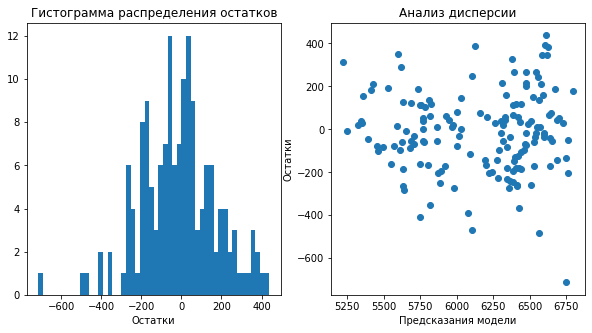

In [92]:
# Проведём анализ остатков:
residuals_3 = y_test_3 - predictions_3
print('Среднее по остаткам:', residuals_3.mean())
print('Медиана по остаткам:', residuals_3.median())

# Строим гистограмму частотности для остатков: 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals_3, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions_3, y = residuals_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Выбросы сохранились. Модель стала работать немного лучше, но всё так же неидеально. 1 нового параметра оказалось явно недостаточно.

##### Промежуточный вывод:
Наиболее перспективной стала третья модель, в которой были учтены все имеющиеся данные и произведены необходимые преобразования. По математическим характеристикам получили следующую картину:
  - первая модель: коэффициент детерминации - 0.78; среднее по остаткам - -25.4, медиана - -34.7
  - вторая модель: коэффициент детерминации - 0.81; среднее по остаткам - -24.1, медиана - -26.4
  - третья модель: коэффициент детерминации - 0.82; среднее по остаткам - -15.2, медиана - -15.9

Для дальнейших предсказаний будет применяться третья модель МО.

##### Оценка моделей:
Оценим все три модели по метрикам MSE, MAE, RMSE.

In [93]:
# Метрики для первой модели:
mse_1 = mse(y_test_1, predictions_1)
mae_1 = mae(predictions_1, y_test_1)
rmse_1 = mse(y_test_1, predictions_1, squared = False)
print(f'MSE первой модели = {mse_1:.0f}')
print(f'MAE первой модели = {mae_1:.0f}')
print(f'RMSE первой модели = {rmse_1:.0f}')

MSE первой модели = 43887
MAE первой модели = 164
RMSE первой модели = 209


In [94]:
# Метрики для первой модели:
mse_2 = mse(y_test_2, predictions_2)
mae_2 = mae(predictions_2, y_test_2)
rmse_2 = mse(y_test_2, predictions_2, squared = False)
print(f'MSE второй модели = {mse_2:.0f}')
print(f'MAE второй модели = {mae_2:.0f}')
print(f'RMSE второй модели = {rmse_2:.0f}')

MSE второй модели = 37031
MAE второй модели = 149
RMSE второй модели = 192


In [95]:
# Метрики для первой модели:
mse_3 = mse(y_test_3, predictions_3)
mae_3 = mae(predictions_3, y_test_3)
rmse_3 = mse(y_test_3, predictions_3, squared = False)
print(f'MSE третьей модели = {mse_3:.0f}')
print(f'MAE третьей модели = {mae_3:.0f}')
print(f'RMSE третьей модели = {rmse_3:.0f}')

MSE третьей модели = 35674
MAE третьей модели = 146
RMSE третьей модели = 189


In [96]:
# Расчёт доверительного интервала:
print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6092.340075854288, 6221.3750700583805)


##### Промежуточный вывод:
Вывод предыдущего пункта подтвердился: третья модель имеет наименьшие погрешности. Пусть они всё ещё достаточно большие, однако за неимением дополнительных данных для улучшения модели, будем работать с ней.

Доверительным интервалом можем считать значения от 6092 до 6221 кг. При меньших и больших значениях удоя на графике остатков наблюдается наибольшие выбросы.

##### Предсказание по исследуемой таблице:

Итак, настало время сделать прогноз по коровам, которых хочет купить фермер. Напомним себе, как выглядит эта таблица.

In [97]:
# Повторная оценка таблицы:
cow_buy

Порода Тип пастбища Порода папы быка  Имя папы  Жирность,%  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.54   
2   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.63   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.57   
8   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.73   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.68   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин        3.42   
14  РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.77   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.34   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   

    Белок,%      Возраст  Тип возраста  
0     3.076  более_2_лет             2  
1     3.081  менее_2_лет             1  
2     3.074  более_2_лет             2  
3     3.061  более_2_лет             2  
4     3.074  более_2_лет             2  
5     3.053  менее_2_лет             1  
6     3.076  более_2_лет             2  
7     3.079  более_2_лет             2  
8     3.074  более_2_лет             2  
9     3.079  менее_2_лет             1  
10    3.055  более_2_лет             2  
11    3.073  более_2_лет             2  
12    3.046  более_2_лет             2  
13    3.075  менее_2_лет             1  
14    3.074  более_2_лет             2  
15    3.065  более_2_лет             2  
16    3.079  более_2_лет             2  
17    3.053  менее_2_лет             1  
18    3.069  более_2_лет             2  
19    3.074  более_2_лет             2

Видим, что таблица не содержит никакой информации о корме коров. Из условия задачи мы знаем, что содержание компонентов будет увеличено на 5%. Посчитаем средние значения из таблицы "ferma_main", увеличим их на 5% и добавим в эту.

In [98]:
# Добавление новых столбцов с характеристиками корма:
cow_buy['ЭКЕ'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].mean() * 1.05
cow_buy['Протеин'] = ferma_main['Сырой протеин, г'].mean() * 1.05
cow_buy['СПО'] = ferma_main['СПО (Сахаро-протеиновое соотношение)'].mean() * 1.05
display(cow_buy)

Порода Тип пастбища Порода папы быка  Имя папы  Жирность,%  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.54   
2   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.63   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.57   
8   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.73   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.68   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин        3.42   
14  РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.77   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.34   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   

    Белок,%      Возраст  Тип возраста        ЭКЕ      Протеин       СПО  
0     3.076  более_2_лет             2  15.276162  2019.947532  0.958744  
1     3.081  менее_2_лет             1  15.276162  2019.947532  0.958744  
2     3.074  более_2_лет             2  15.276162  2019.947532  0.958744  
3     3.061  более_2_лет             2  15.276162  2019.947532  0.958744  
4     3.074  более_2_лет             2  15.276162  2019.947532  0.958744  
5     3.053  менее_2_лет             1  15.276162  2019.947532  0.958744  
6     3.076  более_2_лет             2  15.276162  2019.947532  0.958744  
7     3.079  более_2_лет             2  15.276162  2019.947532  0.958744  
8     3.074  более_2_лет             2  15.276162  2019.947532  0.958744  
9     3.079  менее_2_лет             1  15.276162  2019.947532  0.958744  
10    3.055  более_2_лет             2  15.276162  2019.947532  0.958744  
11    3.073  более_2_лет             2  15.276162  2019.947532  0.958744  
12    3.046  более_2_лет             2  15.276162  2019.947532  0.958744  
13    3.075  менее_2_лет             1  15.276162  2019.947532  0.958744  
14    3.074  более_2_лет             2  15.276162  2019.947532  0.958744  
15    3.065  более_2_лет             2  15.276162  2019.947532  0.958744  
16    3.079  более_2_лет             2  15.276162  2019.947532  0.958744  
17    3.053  менее_2_лет             1  15.276162  2019.947532  0.958744  
18    3.069  более_2_лет             2  15.276162  2019.947532  0.958744  
19    3.074  более_2_лет             2  15.276162  2019.947532  0.958744

Теперь подготовим данные и сделаем на их основе предсказание по удою.

In [99]:
# Столбцы с качественными параметрами:
cat_col_names = ['Порода', 'Порода папы быка', 'Тип пастбища', 'Возраст', 'Имя папы']

cow_buy_ohe = encoder.fit_transform(cow_buy[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Преобразование в датафреймы:
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

display(cow_buy_ohe)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Барин  \
0                  0.0         0.0           1.0             0.0       0.0   
1                  0.0         1.0           0.0             1.0       0.0   
2                  1.0         1.0           0.0             0.0       1.0   
3                  1.0         0.0           1.0             0.0       0.0   
4                  1.0         0.0           0.0             0.0       0.0   
5                  1.0         1.0           0.0             1.0       0.0   
6                  0.0         0.0           1.0             0.0       0.0   
7                  0.0         1.0           0.0             0.0       0.0   
8                  1.0         1.0           0.0             0.0       1.0   
9                  1.0         0.0           1.0             1.0       0.0   
10                 0.0         1.0           1.0             0.0       0.0   
11                 1.0         1.0           0.0             0.0       0.0   
12                 0.0         0.0           1.0             0.0       0.0   
13                 0.0         1.0           1.0             1.0       1.0   
14                 1.0         1.0           0.0             0.0       1.0   
15                 1.0         0.0           1.0             0.0       0.0   
16                 0.0         1.0           1.0             0.0       0.0   
17                 1.0         1.0           0.0             1.0       0.0   
18                 0.0         1.0           0.0             0.0       0.0   
19                 1.0         0.0           0.0             0.0       0.0   

    x4_Буйный  x4_Геркулес  x4_Соловчик  
0         0.0          1.0          0.0  
1         1.0          0.0          0.0  
2         0.0          0.0          0.0  
3         1.0          0.0          0.0  
4         1.0          0.0          0.0  
5         0.0          1.0          0.0  
6         0.0          1.0          0.0  
7         1.0          0.0          0.0  
8         0.0          0.0          0.0  
9         1.0          0.0          0.0  
10        0.0          0.0          1.0  
11        0.0          1.0          0.0  
12        0.0          1.0          0.0  
13        0.0          0.0          0.0  
14        0.0          0.0          0.0  
15        1.0          0.0          0.0  
16        0.0          0.0          1.0  
17        0.0          1.0          0.0  
18        1.0          0.0          0.0  
19        1.0          0.0          0.0

In [100]:
# Столбцы с количественными параметрами:
num_col_names = ['ЭКЕ', 'Протеин', 'СПО']

cow_buy_scaled = scaler.fit_transform(cow_buy[num_col_names])

# Преобразование в датафреймы:
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

display(cow_buy_scaled)

ЭКЕ  Протеин  СПО
0   1.0      1.0 -1.0
1   1.0      1.0 -1.0
2   1.0      1.0 -1.0
3   1.0      1.0 -1.0
4   1.0      1.0 -1.0
5   1.0      1.0 -1.0
6   1.0      1.0 -1.0
7   1.0      1.0 -1.0
8   1.0      1.0 -1.0
9   1.0      1.0 -1.0
10  1.0      1.0 -1.0
11  1.0      1.0 -1.0
12  1.0      1.0 -1.0
13  1.0      1.0 -1.0
14  1.0      1.0 -1.0
15  1.0      1.0 -1.0
16  1.0      1.0 -1.0
17  1.0      1.0 -1.0
18  1.0      1.0 -1.0
19  1.0      1.0 -1.0

In [101]:
# Объединяем все преобразованные данные в тренировочный и тестовый датафреймы, сбрасывая индексы:
cow_buy_A = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

display(cow_buy_A)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Барин  \
0                  0.0         0.0           1.0             0.0       0.0   
1                  0.0         1.0           0.0             1.0       0.0   
2                  1.0         1.0           0.0             0.0       1.0   
3                  1.0         0.0           1.0             0.0       0.0   
4                  1.0         0.0           0.0             0.0       0.0   
5                  1.0         1.0           0.0             1.0       0.0   
6                  0.0         0.0           1.0             0.0       0.0   
7                  0.0         1.0           0.0             0.0       0.0   
8                  1.0         1.0           0.0             0.0       1.0   
9                  1.0         0.0           1.0             1.0       0.0   
10                 0.0         1.0           1.0             0.0       0.0   
11                 1.0         1.0           0.0             0.0       0.0   
12                 0.0         0.0           1.0             0.0       0.0   
13                 0.0         1.0           1.0             1.0       1.0   
14                 1.0         1.0           0.0             0.0       1.0   
15                 1.0         0.0           1.0             0.0       0.0   
16                 0.0         1.0           1.0             0.0       0.0   
17                 1.0         1.0           0.0             1.0       0.0   
18                 0.0         1.0           0.0             0.0       0.0   
19                 1.0         0.0           0.0             0.0       0.0   

    x4_Буйный  x4_Геркулес  x4_Соловчик  ЭКЕ  Протеин  СПО  
0         0.0          1.0          0.0  1.0      1.0 -1.0  
1         1.0          0.0          0.0  1.0      1.0 -1.0  
2         0.0          0.0          0.0  1.0      1.0 -1.0  
3         1.0          0.0          0.0  1.0      1.0 -1.0  
4         1.0          0.0          0.0  1.0      1.0 -1.0  
5         0.0          1.0          0.0  1.0      1.0 -1.0  
6         0.0          1.0          0.0  1.0      1.0 -1.0  
7         1.0          0.0          0.0  1.0      1.0 -1.0  
8         0.0          0.0          0.0  1.0      1.0 -1.0  
9         1.0          0.0          0.0  1.0      1.0 -1.0  
10        0.0          0.0          1.0  1.0      1.0 -1.0  
11        0.0          1.0          0.0  1.0      1.0 -1.0  
12        0.0          1.0          0.0  1.0      1.0 -1.0  
13        0.0          0.0          0.0  1.0      1.0 -1.0  
14        0.0          0.0          0.0  1.0      1.0 -1.0  
15        1.0          0.0          0.0  1.0      1.0 -1.0  
16        0.0          0.0          1.0  1.0      1.0 -1.0  
17        0.0          1.0          0.0  1.0      1.0 -1.0  
18        1.0          0.0          0.0  1.0      1.0 -1.0  
19        1.0          0.0          0.0  1.0      1.0 -1.0

In [102]:
# Делаем предсказания:
cow_buy['Предполагаемый удой, кг'] = model_lr_3.predict(cow_buy_A).astype('int')
display(cow_buy)

Порода Тип пастбища Порода папы быка  Имя папы  Жирность,%  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.54   
2   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.63   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.57   
8   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.73   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.68   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин        3.42   
14  РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.77   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.34   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   

    Белок,%      Возраст  Тип возраста        ЭКЕ      Протеин       СПО  \
0     3.076  более_2_лет             2  15.276162  2019.947532  0.958744   
1     3.081  менее_2_лет             1  15.276162  2019.947532  0.958744   
2     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
3     3.061  более_2_лет             2  15.276162  2019.947532  0.958744   
4     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
5     3.053  менее_2_лет             1  15.276162  2019.947532  0.958744   
6     3.076  более_2_лет             2  15.276162  2019.947532  0.958744   
7     3.079  более_2_лет             2  15.276162  2019.947532  0.958744   
8     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
9     3.079  менее_2_лет             1  15.276162  2019.947532  0.958744   
10    3.055  более_2_лет             2  15.276162  2019.947532  0.958744   
11    3.073  более_2_лет             2  15.276162  2019.947532  0.958744   
12    3.046  более_2_лет             2  15.276162  2019.947532  0.958744   
13    3.075  менее_2_лет             1  15.276162  2019.947532  0.958744   
14    3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
15    3.065  более_2_лет             2  15.276162  2019.947532  0.958744   
16    3.079  более_2_лет             2  15.276162  2019.947532  0.958744   
17    3.053  менее_2_лет             1  15.276162  2019.947532  0.958744   
18    3.069  более_2_лет             2  15.276162  2019.947532  0.958744   
19    3.074  более_2_лет             2  15.276162  2019.947532  0.958744   

    Предполагаемый удой, кг  
0                      6433  
1                      5931  
2                      5950  
3                      6145  
4                      6094  
5                      6248  
6                      6433  
7                      6123  
8                      5950  
9                      5953  
10                     6508  
11                     6441  
12                     6433  
13                     5793  
14                     5950  
15                     6145  
16                     6508  
17                     6248  
18                     6123  
19                     6094

Модель смогла определить удой всех коров. Практически половина значений входят в доверительный интервал, что обнадёживает.

#### Вывод:
В ходе выполнения данного пункта были созданы 3 модели линейной регрессии. Каждая последующая модель улучшалась по сравнению с предыдущей путём преобразования имеющихся данных и добавления новых. Хотя идеальные результаты не были достигнуты, третья модель показала относительно правдоподобные результаты предсказаний, что подтвердили метрики качества (MAE, MSE, RMSE, R^(2), анализ остатков).

Созданная первая модель МО на основе непреобразованных начальных данных имеет коэффициент детерминации близкий к 0,8, что говорит о весьма неплохих показателях предсказаний, но анализ остатков показывает значительное несовершенство модели. Гистограмма остатков имеет много выбросов, хоть и напоминает нормальное распределение с небольшим смещением влево; анализ дисперсии также не идеален.

Были обработаны и преобразованы уже имеющиеся данные: показатель ЭКЕ возведён в квадрат для большей линейности, СПО преобразовано в качественный признак. В результате получили улучшение предсказаний модели: коэффициент детерминации увеличился с 0.78 до 0.81, остатки показали уменьшение (вместо среднего -25.4 и медианы -34.8 получили -19.5 и -26.0 соответственно). Однако такое улучшение всё ещё не делает модель достоверной. В связи с этим делаем вывод о необходимости сбора дополнительной информации и добавлении её в исходник.

Наиболее перспективной стала третья модель, в которой были учтены все имеющиеся данные и произведены необходимые преобразования. По математическим характеристикам получили следующую картину:
  - первая модель: коэффициент детерминации - 0.78; среднее по остаткам - -25.4, медиана - -34.7
  - вторая модель: коэффициент детерминации - 0.81; среднее по остаткам - -24.1, медиана - -26.4
  - третья модель: коэффициент детерминации - 0.82; среднее по остаткам - -14.4, медиана - -7.0

Третья модель имеет наименьшие погрешности. Пусть они всё ещё достаточно большие, однако за неимением дополнительных данных для улучшения модели, будем работать с ней.

Доверительным интервалом можем считать значения от 6092 до 6221 кг. При меньших и больших значениях удоя на графике остатков наблюдается наибольшие выбросы.

Модель смогла определить удой всех коров. Практически половина значений входят в доверительный интервал, что обнадёживает.

### Обучение модели логистической регрессии

С удоем разобрались. Теперь нужно предсказать второй целевой параметр - вкус молока. Сделать это можно с помощью логистической регрессии. Выведем данные по основной таблице, посмотрим, можем ли мы что-то изменить в лучшую сторону.

In [103]:
ferma_main.head()

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинное   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинное   

  Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0           Айдиал        3.58    3.076      вкусно  более_2_лет   
1          Соверин        3.54    3.079      вкусно  менее_2_лет   
2          Соверин        3.59    3.074   не вкусно  более_2_лет   
3           Айдиал        3.40    3.075   не вкусно  более_2_лет   
4          Соверин        3.73    3.073      вкусно  менее_2_лет   

   Тип возраста  color  ЭКЕ в квадрате СПО больше 0.92  Имя папы  
0             2    red          201.64             Нет    Буйный  
1             1  green          163.84             Нет  Соловчик  
2             2   grey          196.00             Нет     Барин  
3             2    red          153.76             Нет    Буйный  
4             1   grey          163.84             Нет     Барин

К характеристикам молока относятся его жирность и белок. Имеет смысл рассмотреть графики зависимости вкуса от них. Возможно, какой-то из этих показателей удастся перевести в категориальный для лучшей работы модели.

In [104]:
# Напишем функцию для определния типа молока:
def milk_cat(milk):
    if milk == 'вкусно':
        return 1
    if milk == 'не вкусно':
        return 0
    
# Применим функцию для создания нового столбца:
ferma_main['Тип молока'] = ferma_main['Вкус молока'].apply(milk_cat)
display(ferma_main.head())

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинное   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинное   

  Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0           Айдиал        3.58    3.076      вкусно  более_2_лет   
1          Соверин        3.54    3.079      вкусно  менее_2_лет   
2          Соверин        3.59    3.074   не вкусно  более_2_лет   
3           Айдиал        3.40    3.075   не вкусно  более_2_лет   
4          Соверин        3.73    3.073      вкусно  менее_2_лет   

   Тип возраста  color  ЭКЕ в квадрате СПО больше 0.92  Имя папы  Тип молока  
0             2    red          201.64             Нет    Буйный           1  
1             1  green          163.84             Нет  Соловчик           1  
2             2   grey          196.00             Нет     Барин           0  
3             2    red          153.76             Нет    Буйный           0  
4             1   grey          163.84             Нет     Барин           1

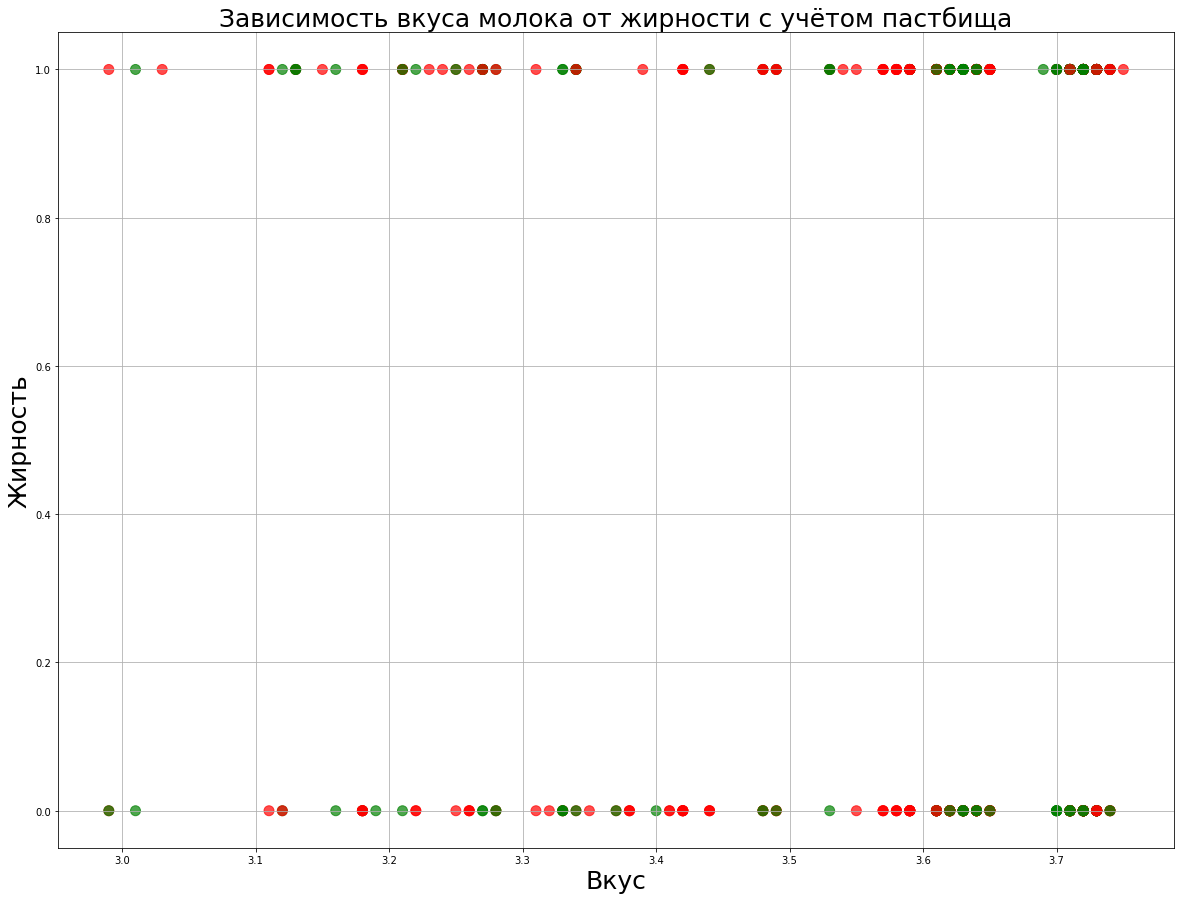

In [105]:
# Словарь для цветов:
color = {'Вис Бик Айдиал': 'red', 'РефлешнСоверинг': 'green'}
ferma_main['color'] = ferma_main['Порода'].apply(lambda x: color[x])

# Диаграмма рассеяния по молоку от жирности:
ferma_main.plot.scatter(x='Жирность,%', y='Тип молока', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True, color= ferma_main['color'])

plt.title('Зависимость вкуса молока от жирности с учётом пастбища', fontsize=25)
plt.ylabel('Жирность', fontsize=25)
plt.xlabel('Вкус', fontsize=25)
plt.show()

Как показывать данный график, в категориальную переменную эти данные вряд ли получится преобразовать. Сделаем предположение, что остальные будут выглядеть примерно так же, значит, сразу приступим к созданию модели.

In [106]:
# Разобьём датафрейм на выборки:
X = ferma_main.drop('Тип молока', axis=1)
y = ferma_main['Тип молока']

display(X)
print()
display(y)

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      1      5863                                   14.2              1743   
1      2      5529                                   12.8              2138   
2      3      5810                                   14.0              1854   
3      4      5895                                   12.4              2012   
4      5      5302                                   12.8              1675   
..   ...       ...                                    ...               ...   
623  625      6812                                   15.4              1964   
624  626      5513                                   12.9              1700   
625  627      5970                                   14.4              1837   
626  628      5746                                   13.8              1994   
627  629      6503                                   16.2              2283   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                   0.890   Вис Бик Айдиал    Равнинное   
1                                   0.890   Вис Бик Айдиал    Равнинное   
2                                   0.885  РефлешнСоверинг    Холмистое   
3                                   0.885  РефлешнСоверинг    Холмистое   
4                                   0.885   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
623                                 0.940  РефлешнСоверинг    Равнинное   
624                                 0.880  РефлешнСоверинг    Равнинное   
625                                 0.880  РефлешнСоверинг    Холмистое   
626                                 0.890  РефлешнСоверинг    Равнинное   
627                                 0.940   Вис Бик Айдиал    Холмистое   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
0             Айдиал        3.58    3.076      вкусно  более_2_лет   
1            Соверин        3.54    3.079      вкусно  менее_2_лет   
2            Соверин        3.59    3.074   не вкусно  более_2_лет   
3             Айдиал        3.40    3.075   не вкусно  более_2_лет   
4            Соверин        3.73    3.073      вкусно  менее_2_лет   
..               ...         ...      ...         ...          ...   
623           Айдиал        3.74    3.075   не вкусно  более_2_лет   
624          Соверин        3.64    3.073      вкусно  менее_2_лет   
625          Соверин        3.64    3.075   не вкусно  более_2_лет   
626          Соверин        3.64    3.077      вкусно  более_2_лет   
627          Соверин        3.71    3.076      вкусно  более_2_лет   

     Тип возраста  color  ЭКЕ в квадрате СПО больше 0.92  Имя папы  
0               2    red          201.64             Нет    Буйный  
1               1    red          163.84             Нет  Соловчик  
2               2  green          196.00             Нет     Барин  
3               2  green          153.76             Нет    Буйный  
4               1    red          163.84             Нет     Барин  
..            ...    ...             ...             ...       ...  
623             2  green          237.16              Да    Буйный  
624             1  green          166.41             Нет     Барин  
625             2  green          207.36             Нет     Барин  
626             2  green          190.44             Нет     Барин  
627             2    red          262.44              Да  Соловчик  

[628 rows x 17 columns]

0      1
1      1
2      0
3      0
4      1
      ..
623    0
624    1
625    0
626    1
627    1
Name: Тип молока, Length: 628, dtype: int64

In [107]:
# Создаём тренировочную и тестовую выборки:
X_train, X_test, y_train, y_test = tts(X, y, random_state = rs)
display(X_train)

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
507  509      6498                                   16.5              2123   
382  384      5268                                   12.5              1889   
586  588      5610                                   14.7              1671   
196  198      6343                                   14.4              2063   
327  329      5833                                   13.1              2077   
..   ...       ...                                    ...               ...   
71    73      5718                                   13.7              2212   
106  108      6392                                   14.9              1742   
270  272      5971                                   13.4              1775   
435  437      5858                                   13.1              1949   
102  104      5591                                   12.7              1767   

     СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
507                                 0.940  РефлешнСоверинг    Холмистое   
382                                 0.890  РефлешнСоверинг    Холмистое   
586                                 0.880   Вис Бик Айдиал    Равнинное   
196                                 0.940   Вис Бик Айдиал    Холмистое   
327                                 0.890   Вис Бик Айдиал    Равнинное   
..                                    ...              ...          ...   
71                                  0.895  РефлешнСоверинг    Холмистое   
106                                 0.930   Вис Бик Айдиал    Равнинное   
270                                 0.880  РефлешнСоверинг    Равнинное   
435                                 0.880   Вис Бик Айдиал    Равнинное   
102                                 0.885   Вис Бик Айдиал    Равнинное   

    Порода папы быка  Жирность,%  Белок,% Вкус молока      Возраст  \
507          Соверин        3.70    3.074      вкусно  более_2_лет   
382          Соверин        3.34    3.072      вкусно  менее_2_лет   
586           Айдиал        3.18    3.079   не вкусно  более_2_лет   
196           Айдиал        3.62    3.079      вкусно  более_2_лет   
327           Айдиал        3.64    3.076      вкусно  более_2_лет   
..               ...         ...      ...         ...          ...   
71            Айдиал        3.61    3.077      вкусно  более_2_лет   
106           Айдиал        3.72    3.073      вкусно  более_2_лет   
270           Айдиал        3.63    3.071      вкусно  более_2_лет   
435           Айдиал        3.61    3.075   не вкусно  более_2_лет   
102           Айдиал        3.26    3.075   не вкусно  менее_2_лет   

     Тип возраста  color  ЭКЕ в квадрате СПО больше 0.92  Имя папы  
507             2  green          272.25              Да  Соловчик  
382             1  green          156.25             Нет     Барин  
586             2    red          216.09             Нет    Буйный  
196             2    red          207.36              Да    Буйный  
327             2    red          171.61             Нет  Геркулес  
..            ...    ...             ...             ...       ...  
71              2  green          187.69             Нет     Барин  
106             2    red          222.01              Да  Геркулес  
270             2  green          179.56             Нет  Геркулес  
435             2    red          171.61             Нет    Буйный  
102             1    red          161.29             Нет    Буйный  

[471 rows x 17 columns]

In [108]:
# Столбцы с качественными параметрами:
cat_col_names = ['Порода', 'Порода папы быка', 'Тип пастбища', 'Возраст', 'СПО больше 0.92', 'Имя папы']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Преобразование в датафреймы:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

display(X_train_ohe)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Нет  \
0                   1.0         1.0           1.0             0.0     0.0   
1                   1.0         1.0           1.0             1.0     1.0   
2                   0.0         0.0           0.0             0.0     1.0   
3                   0.0         0.0           1.0             0.0     0.0   
4                   0.0         0.0           0.0             0.0     1.0   
..                  ...         ...           ...             ...     ...   
466                 1.0         0.0           1.0             0.0     1.0   
467                 0.0         0.0           0.0             0.0     0.0   
468                 1.0         0.0           0.0             0.0     1.0   
469                 0.0         0.0           0.0             0.0     1.0   
470                 0.0         0.0           0.0             1.0     1.0   

     x5_Барин  x5_Буйный  x5_Геркулес  x5_Соловчик  
0         0.0        0.0          0.0          1.0  
1         1.0        0.0          0.0          0.0  
2         0.0        1.0          0.0          0.0  
3         0.0        1.0          0.0          0.0  
4         0.0        0.0          1.0          0.0  
..        ...        ...          ...          ...  
466       1.0        0.0          0.0          0.0  
467       0.0        0.0          1.0          0.0  
468       0.0        0.0          1.0          0.0  
469       0.0        1.0          0.0          0.0  
470       0.0        1.0          0.0          0.0  

[471 rows x 9 columns]

In [109]:
# Столбцы с количественными параметрами:
num_col_names = ['Удой, кг', 'ЭКЕ в квадрате', 'Сырой протеин, г', 'Жирность,%', 'Белок,%']

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Преобразование в датафреймы:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

display(X_train_scaled)

Удой, кг  ЭКЕ в квадрате  Сырой протеин, г  Жирность,%   Белок,%
0    0.780768        1.577968          1.079523    0.562532 -0.679069
1   -1.764802       -1.511438         -0.196920   -1.601817 -1.452568
2   -1.057010        0.082269         -1.386085   -2.563750  1.254677
3    0.459985       -0.150235          0.752230    0.081565  1.254677
4   -0.595496       -1.102358          0.828598    0.201807  0.094429
..        ...             ...               ...         ...       ...
466 -0.833496       -0.674102          1.565008    0.021444  0.481179
467  0.561394        0.239936         -0.998788    0.682773 -1.065819
468 -0.309895       -0.890627         -0.818777    0.141686 -1.839317
469 -0.543756       -1.102358          0.130373    0.021444 -0.292320
470 -1.096331       -1.377208         -0.862416   -2.082784 -0.292320

[471 rows x 5 columns]

In [110]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы, сбрасывая индексы:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_train)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Нет  \
0                   1.0         1.0           1.0             0.0     0.0   
1                   1.0         1.0           1.0             1.0     1.0   
2                   0.0         0.0           0.0             0.0     1.0   
3                   0.0         0.0           1.0             0.0     0.0   
4                   0.0         0.0           0.0             0.0     1.0   
..                  ...         ...           ...             ...     ...   
466                 1.0         0.0           1.0             0.0     1.0   
467                 0.0         0.0           0.0             0.0     0.0   
468                 1.0         0.0           0.0             0.0     1.0   
469                 0.0         0.0           0.0             0.0     1.0   
470                 0.0         0.0           0.0             1.0     1.0   

     x5_Барин  x5_Буйный  x5_Геркулес  x5_Соловчик  Удой, кг  ЭКЕ в квадрате  \
0         0.0        0.0          0.0          1.0  0.780768        1.577968   
1         1.0        0.0          0.0          0.0 -1.764802       -1.511438   
2         0.0        1.0          0.0          0.0 -1.057010        0.082269   
3         0.0        1.0          0.0          0.0  0.459985       -0.150235   
4         0.0        0.0          1.0          0.0 -0.595496       -1.102358   
..        ...        ...          ...          ...       ...             ...   
466       1.0        0.0          0.0          0.0 -0.833496       -0.674102   
467       0.0        0.0          1.0          0.0  0.561394        0.239936   
468       0.0        0.0          1.0          0.0 -0.309895       -0.890627   
469       0.0        1.0          0.0          0.0 -0.543756       -1.102358   
470       0.0        1.0          0.0          0.0 -1.096331       -1.377208   

     Сырой протеин, г  Жирность,%   Белок,%  
0            1.079523    0.562532 -0.679069  
1           -0.196920   -1.601817 -1.452568  
2           -1.386085   -2.563750  1.254677  
3            0.752230    0.081565  1.254677  
4            0.828598    0.201807  0.094429  
..                ...         ...       ...  
466          1.565008    0.021444  0.481179  
467         -0.998788    0.682773 -1.065819  
468         -0.818777    0.141686 -1.839317  
469          0.130373    0.021444 -0.292320  
470         -0.862416   -2.082784 -0.292320  

[471 rows x 14 columns]

In [111]:
# Обучаем модель:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

# Получаем прогнозные значения
y_pred = clf.predict(X_test)
print(y_pred[1], y_test.reset_index().loc[1, 'Тип молока'])

1 1


Как минимум один раз модель угадала. Посмотрим, что покажут метрики.

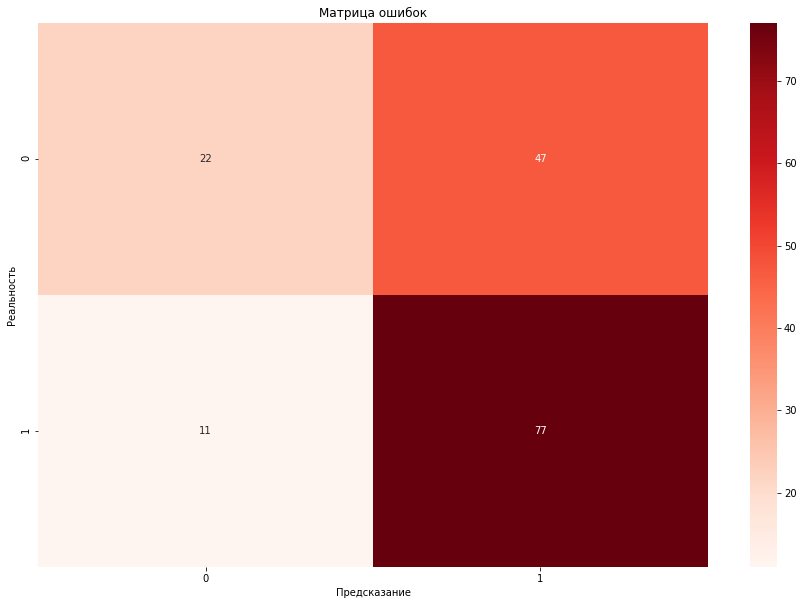

In [112]:
# Построим матрицу ошибок:
cm = confusion_matrix(y_test, y_pred)

figsize = (15,10)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Матрица ошибок')
hmap = sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.ylabel('Реальность')
plt.xlabel('Предсказание')
plt.show()

In [113]:
# Расчёт метрики:
acs = accuracy_score(y_test, y_pred)
print(acs)

0.6305732484076433


Модель ошибается практически в 40% случаев. Печально.

In [114]:
# Считаем метрики:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('recall: ', recall)
print('precision: ', precision)

recall:  0.875
precision:  0.6209677419354839


Модель присваивает 1 класс в 62% случаев, но из всех объектов 1 класса она смогла верно определить 87,5%.

##### Промежуточный вывод:
Из всех имеющихся данных были созданы выборки и обучена модель логистической регрессии. Она показывает плохой результат, угадывает нужный параметр в 60% случаев. По метрикам видна её главная проблема: слишком часто объектам класса 0 присвается 1 - ошибка False Positive. False Negative имеет неособо критичное значение.

Исходя из поставленной задачи, необходимо, чтобы фермер был уверен в том, что молоко вкусно. Следовательно, нужно проработать ошибку первого рода (FP).

Необходимо подобрать нужный порог классификации и минимизировать критическую ошибку.

In [115]:
# Устанавливаем пороги:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 5,endpoint=False)]
print(thresholds)

[0.1, 0.28, 0.46, 0.64, 0.82]


In [116]:
# Создадим датафрейм для характеристики работы модели:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_valid   y_proba
85         1  0.860468
51         1  0.851784
110        1  0.843654
66         1  0.841672
13         1  0.824066


In [117]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.28  y_pred_0.46  y_pred_0.64  \
147        1  0.813487           1            1            1            1   
103        1  0.775207           1            1            1            1   
94         0  0.544939           1            1            1            0   
153        1  0.656112           1            1            1            1   
92         1  0.507495           1            1            1            0   

     y_pred_0.82  
147            0  
103            0  
94             0  
153            0  
92             0  


In [118]:
# Считаем метрику:
print('Всего объектов 1 категории:', data[data['y_valid'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.1:', data[data['y_pred_0.1'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.28:', data[data['y_pred_0.28'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.46:', data[data['y_pred_0.46'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.64:', data[data['y_pred_0.64'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.82:', data[data['y_pred_0.82'] == 1]['y_valid'].count())

Всего объектов 1 категории: 88
Объектов 1 категории с порогом 0.1: 157
Объектов 1 категории с порогом 0.28: 155
Объектов 1 категории с порогом 0.46: 131
Объектов 1 категории с порогом 0.64: 70
Объектов 1 категории с порогом 0.82: 6


Видно, что где-то на пороге 0.55 начинается нужная граница, идёт она до 0.64. Сузим круг поисков.

In [119]:
# Устанавливаем пороги:
thresholds_1 = [round(i,2) for i in np.linspace(0.55,0.64,num = 5,endpoint=False)]
print(thresholds_1)

[0.55, 0.57, 0.59, 0.6, 0.62]


In [120]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds_1:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.28  y_pred_0.46  y_pred_0.64  \
141        0  0.288492           1            1            0            0   
46         0  0.321098           1            1            0            0   
34         0  0.701942           1            1            1            1   
16         0  0.677701           1            1            1            1   
10         1  0.744951           1            1            1            1   

     y_pred_0.82  y_pred_0.55  y_pred_0.57  y_pred_0.59  y_pred_0.6  \
141            0            0            0            0           0   
46             0            0            0            0           0   
34             0            1            1            1           1   
16             0            1            1            1           1   
10             0            1            1            1           1   

     y_pred_0.62  
141            0  
46             0  
34             1  
16             1  
10             

In [121]:
# Смотрим значения:
print('Всего объектов 1 категории:', data[data['y_valid'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.55:', data[data['y_pred_0.55'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.57:', data[data['y_pred_0.57'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.59:', data[data['y_pred_0.59'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.6:', data[data['y_pred_0.6'] == 1]['y_valid'].count())
print('Объектов 1 категории с порогом 0.62:', data[data['y_pred_0.62'] == 1]['y_valid'].count())

Всего объектов 1 категории: 88
Объектов 1 категории с порогом 0.55: 112
Объектов 1 категории с порогом 0.57: 108
Объектов 1 категории с порогом 0.59: 99
Объектов 1 категории с порогом 0.6: 91
Объектов 1 категории с порогом 0.62: 84


In [122]:
# Напишем функцию для предсказания с нужным порогом классификации:
def custom_predict(X, threshold):
    probs = clf.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
    
# Сами предсказания:    
new_preds = custom_predict(X=X_test, threshold=0.8)

Теперь методом подбора определим нужный порог. Напомним, что изначально модель давала 77 верных и 47 ложных прогнозов. Пострараемся максимально уменьшить количество ложных прогнозов (ошибок первого рода) и не допустить рост ошибок второго рода. Ориентироваться будем на метрики. Поднимем precision до 80%, recall постараемся оставить в районе хотя бы 50%.

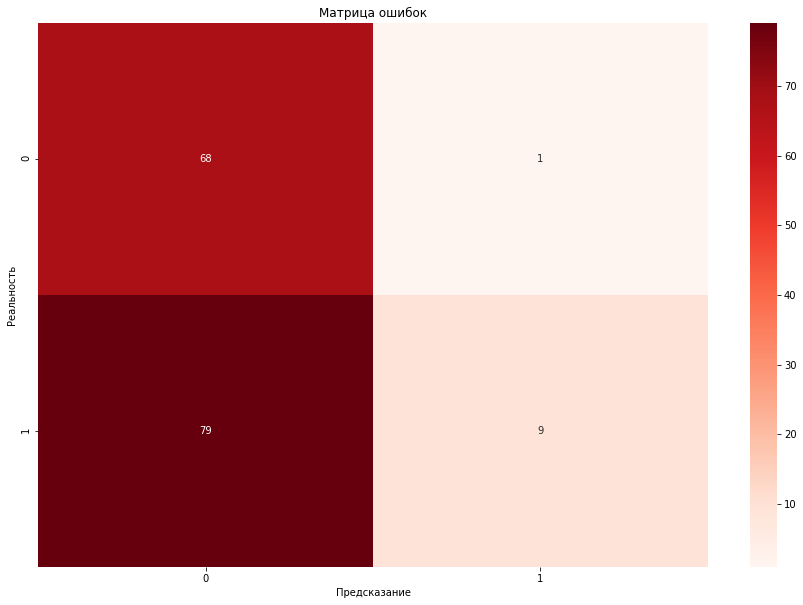

In [123]:
# Построим матрицу ошибок:
cm = confusion_matrix(y_test, new_preds)

figsize = (15,10)

fig, ax = plt.subplots(figsize=figsize)
plt.title('Матрица ошибок')
hmap = sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.ylabel('Реальность')
plt.xlabel('Предсказание')
plt.show()

In [124]:
# Считаем метрики:
recall = recall_score(y_test, new_preds)
precision = precision_score(y_test, new_preds)

print('recall: ', recall)
print('precision: ', precision)

recall:  0.10227272727272728
precision:  0.9


В ходе экспериментов оптимальным значением оказался порог 0.8. Показатель precision поднялся до 90%, что является достаточным для достоверного предсказания.

##### Промежуточный вывод:
Ошибка первого рода была обработана, теперь модель определит вкусное молоко с вероятностью 76%. Увеличилось количество ложно отброшенных вариантов, но в рамках нашей задачи это необходимая жертва.

Для дальнейшего улучшения модели нужны дополнительные исследования и внесение новых характеристик.

##### Прогнозирование:

Настало время предсказать вкус молока у коров из таблицы "cow_buy".

In [125]:
# Вспомним, как выглядит таблица:
cow_buy

Порода Тип пастбища Порода папы быка  Имя папы  Жирность,%  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.54   
2   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.63   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.57   
8   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.73   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.68   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин        3.42   
14  РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.77   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.34   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   

    Белок,%      Возраст  Тип возраста        ЭКЕ      Протеин       СПО  \
0     3.076  более_2_лет             2  15.276162  2019.947532  0.958744   
1     3.081  менее_2_лет             1  15.276162  2019.947532  0.958744   
2     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
3     3.061  более_2_лет             2  15.276162  2019.947532  0.958744   
4     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
5     3.053  менее_2_лет             1  15.276162  2019.947532  0.958744   
6     3.076  более_2_лет             2  15.276162  2019.947532  0.958744   
7     3.079  более_2_лет             2  15.276162  2019.947532  0.958744   
8     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
9     3.079  менее_2_лет             1  15.276162  2019.947532  0.958744   
10    3.055  более_2_лет             2  15.276162  2019.947532  0.958744   
11    3.073  более_2_лет             2  15.276162  2019.947532  0.958744   
12    3.046  более_2_лет             2  15.276162  2019.947532  0.958744   
13    3.075  менее_2_лет             1  15.276162  2019.947532  0.958744   
14    3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
15    3.065  более_2_лет             2  15.276162  2019.947532  0.958744   
16    3.079  более_2_лет             2  15.276162  2019.947532  0.958744   
17    3.053  менее_2_лет             1  15.276162  2019.947532  0.958744   
18    3.069  более_2_лет             2  15.276162  2019.947532  0.958744   
19    3.074  более_2_лет             2  15.276162  2019.947532  0.958744   

    Предполагаемый удой, кг  
0                      6433  
1                      5931  
2                      5950  
3                      6145  
4                      6094  
5                      6248  
6                      6433  
7                      6123  
8                      5950  
9                      5953  
10                     6508  
11                     6441  
12                     6433  
13                     5793  
14                     5950  
15                     6145  
16                     6508  
17                     6248  
18                     6123  
19                     6094

In [126]:
# Столбцы с качественными параметрами:
cat_col_names = ['Порода', 'Порода папы быка', 'Тип пастбища', 'Возраст', 'Имя папы']

cow_ohe = encoder.fit_transform(cow_buy[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Преобразование в датафреймы:
cow_ohe = pd.DataFrame(cow_ohe, columns=encoder_col_names)

display(cow_ohe)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Барин  \
0                  0.0         0.0           1.0             0.0       0.0   
1                  0.0         1.0           0.0             1.0       0.0   
2                  1.0         1.0           0.0             0.0       1.0   
3                  1.0         0.0           1.0             0.0       0.0   
4                  1.0         0.0           0.0             0.0       0.0   
5                  1.0         1.0           0.0             1.0       0.0   
6                  0.0         0.0           1.0             0.0       0.0   
7                  0.0         1.0           0.0             0.0       0.0   
8                  1.0         1.0           0.0             0.0       1.0   
9                  1.0         0.0           1.0             1.0       0.0   
10                 0.0         1.0           1.0             0.0       0.0   
11                 1.0         1.0           0.0             0.0       0.0   
12                 0.0         0.0           1.0             0.0       0.0   
13                 0.0         1.0           1.0             1.0       1.0   
14                 1.0         1.0           0.0             0.0       1.0   
15                 1.0         0.0           1.0             0.0       0.0   
16                 0.0         1.0           1.0             0.0       0.0   
17                 1.0         1.0           0.0             1.0       0.0   
18                 0.0         1.0           0.0             0.0       0.0   
19                 1.0         0.0           0.0             0.0       0.0   

    x4_Буйный  x4_Геркулес  x4_Соловчик  
0         0.0          1.0          0.0  
1         1.0          0.0          0.0  
2         0.0          0.0          0.0  
3         1.0          0.0          0.0  
4         1.0          0.0          0.0  
5         0.0          1.0          0.0  
6         0.0          1.0          0.0  
7         1.0          0.0          0.0  
8         0.0          0.0          0.0  
9         1.0          0.0          0.0  
10        0.0          0.0          1.0  
11        0.0          1.0          0.0  
12        0.0          1.0          0.0  
13        0.0          0.0          0.0  
14        0.0          0.0          0.0  
15        1.0          0.0          0.0  
16        0.0          0.0          1.0  
17        0.0          1.0          0.0  
18        1.0          0.0          0.0  
19        1.0          0.0          0.0

In [127]:
# Столбцы с количественными параметрами:
num_col_names = ['Предполагаемый удой, кг', 'ЭКЕ', 'Протеин', 'Жирность,%', 'Белок,%', 'СПО']

cow_scaled = scaler.fit_transform(cow_buy[num_col_names])

# Преобразование в датафреймы:
cow_scaled = pd.DataFrame(cow_scaled, columns=num_col_names)

display(cow_scaled)

Предполагаемый удой, кг  ЭКЕ  Протеин  Жирность,%   Белок,%  СПО
0                  1.195858  1.0      1.0    0.020225  0.645020 -1.0
1                 -1.132320  1.0      1.0   -0.303380  1.141190 -1.0
2                 -1.044202  1.0      1.0    0.101127  0.446553 -1.0
3                 -0.139830  1.0      1.0   -1.436000 -0.843488 -1.0
4                 -0.376358  1.0      1.0    0.505634  0.446553 -1.0
5                  0.337864  1.0      1.0    0.424732 -1.637359 -1.0
6                  1.195858  1.0      1.0    0.020225  0.645020 -1.0
7                 -0.241862  1.0      1.0   -0.060676  0.942722 -1.0
8                 -1.044202  1.0      1.0    0.101127  0.446553 -1.0
9                 -1.030289  1.0      1.0   -1.436000  0.942722 -1.0
10                 1.543694  1.0      1.0    1.233746 -1.438891 -1.0
11                 1.232961  1.0      1.0    1.233746  0.347319 -1.0
12                 1.195858  1.0      1.0    0.829239 -2.331997 -1.0
13                -1.772338  1.0      1.0   -1.274197  0.545786 -1.0
14                -1.044202  1.0      1.0    0.101127  0.446553 -1.0
15                -0.139830  1.0      1.0   -1.436000 -0.446553 -1.0
16                 1.543694  1.0      1.0    1.233746  0.942722 -1.0
17                 0.337864  1.0      1.0    1.557352 -1.637359 -1.0
18                -0.241862  1.0      1.0   -1.921408 -0.049617 -1.0
19                -0.376358  1.0      1.0    0.505634  0.446553 -1.0

In [128]:
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы, сбрасывая индексы:
cow = pd.concat([cow_ohe, cow_scaled], axis=1)

display(cow)

x0_РефлешнСоверинг  x1_Соверин  x2_Холмистое  x3_менее_2_лет  x4_Барин  \
0                  0.0         0.0           1.0             0.0       0.0   
1                  0.0         1.0           0.0             1.0       0.0   
2                  1.0         1.0           0.0             0.0       1.0   
3                  1.0         0.0           1.0             0.0       0.0   
4                  1.0         0.0           0.0             0.0       0.0   
5                  1.0         1.0           0.0             1.0       0.0   
6                  0.0         0.0           1.0             0.0       0.0   
7                  0.0         1.0           0.0             0.0       0.0   
8                  1.0         1.0           0.0             0.0       1.0   
9                  1.0         0.0           1.0             1.0       0.0   
10                 0.0         1.0           1.0             0.0       0.0   
11                 1.0         1.0           0.0             0.0       0.0   
12                 0.0         0.0           1.0             0.0       0.0   
13                 0.0         1.0           1.0             1.0       1.0   
14                 1.0         1.0           0.0             0.0       1.0   
15                 1.0         0.0           1.0             0.0       0.0   
16                 0.0         1.0           1.0             0.0       0.0   
17                 1.0         1.0           0.0             1.0       0.0   
18                 0.0         1.0           0.0             0.0       0.0   
19                 1.0         0.0           0.0             0.0       0.0   

    x4_Буйный  x4_Геркулес  x4_Соловчик  Предполагаемый удой, кг  ЭКЕ  \
0         0.0          1.0          0.0                 1.195858  1.0   
1         1.0          0.0          0.0                -1.132320  1.0   
2         0.0          0.0          0.0                -1.044202  1.0   
3         1.0          0.0          0.0                -0.139830  1.0   
4         1.0          0.0          0.0                -0.376358  1.0   
5         0.0          1.0          0.0                 0.337864  1.0   
6         0.0          1.0          0.0                 1.195858  1.0   
7         1.0          0.0          0.0                -0.241862  1.0   
8         0.0          0.0          0.0                -1.044202  1.0   
9         1.0          0.0          0.0                -1.030289  1.0   
10        0.0          0.0          1.0                 1.543694  1.0   
11        0.0          1.0          0.0                 1.232961  1.0   
12        0.0          1.0          0.0                 1.195858  1.0   
13        0.0          0.0          0.0                -1.772338  1.0   
14        0.0          0.0          0.0                -1.044202  1.0   
15        1.0          0.0          0.0                -0.139830  1.0   
16        0.0          0.0          1.0                 1.543694  1.0   
17        0.0          1.0          0.0                 0.337864  1.0   
18        1.0          0.0          0.0                -0.241862  1.0   
19        1.0          0.0          0.0                -0.376358  1.0   

    Протеин  Жирность,%   Белок,%  СПО  
0       1.0    0.020225  0.645020 -1.0  
1       1.0   -0.303380  1.141190 -1.0  
2       1.0    0.101127  0.446553 -1.0  
3       1.0   -1.436000 -0.843488 -1.0  
4       1.0    0.505634  0.446553 -1.0  
5       1.0    0.424732 -1.637359 -1.0  
6       1.0    0.020225  0.645020 -1.0  
7       1.0   -0.060676  0.942722 -1.0  
8       1.0    0.101127  0.446553 -1.0  
9       1.0   -1.436000  0.942722 -1.0  
10      1.0    1.233746 -1.438891 -1.0  
11      1.0    1.233746  0.347319 -1.0  
12      1.0    0.829239 -2.331997 -1.0  
13      1.0   -1.274197  0.545786 -1.0  
14      1.0    0.101127  0.446553 -1.0  
15      1.0   -1.436000 -0.446553 -1.0  
16      1.0    1.233746  0.942722 -1.0  
17      1.0    1.557352 -1.637359 -1.0  
18      1.0   -1.921408 -0.049617 -1.0  
19      1.0

In [129]:
# Сделаем прогноз:
predictions = custom_predict(X=cow, threshold=0.8)

# Добавим их в новый столбец в исходную таблицу:
cow_buy['Вкус молока'] = predictions
display(cow_buy)

Порода Тип пастбища Порода папы быка  Имя папы  Жирность,%  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.54   
2   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.63   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.57   
8   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.73   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.68   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин        3.42   
14  РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.77   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.34   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   

    Белок,%      Возраст  Тип возраста        ЭКЕ      Протеин       СПО  \
0     3.076  более_2_лет             2  15.276162  2019.947532  0.958744   
1     3.081  менее_2_лет             1  15.276162  2019.947532  0.958744   
2     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
3     3.061  более_2_лет             2  15.276162  2019.947532  0.958744   
4     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
5     3.053  менее_2_лет             1  15.276162  2019.947532  0.958744   
6     3.076  более_2_лет             2  15.276162  2019.947532  0.958744   
7     3.079  более_2_лет             2  15.276162  2019.947532  0.958744   
8     3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
9     3.079  менее_2_лет             1  15.276162  2019.947532  0.958744   
10    3.055  более_2_лет             2  15.276162  2019.947532  0.958744   
11    3.073  более_2_лет             2  15.276162  2019.947532  0.958744   
12    3.046  более_2_лет             2  15.276162  2019.947532  0.958744   
13    3.075  менее_2_лет             1  15.276162  2019.947532  0.958744   
14    3.074  более_2_лет             2  15.276162  2019.947532  0.958744   
15    3.065  более_2_лет             2  15.276162  2019.947532  0.958744   
16    3.079  более_2_лет             2  15.276162  2019.947532  0.958744   
17    3.053  менее_2_лет             1  15.276162  2019.947532  0.958744   
18    3.069  более_2_лет             2  15.276162  2019.947532  0.958744   
19    3.074  более_2_лет             2  15.276162  2019.947532  0.958744   

    Предполагаемый удой, кг  Вкус молока  
0                      6433            0  
1                      5931            0  
2                      5950            0  
3                      6145            0  
4                      6094            0  
5                      6248            0  
6                      6433            0  
7                      6123            0  
8                      5950            0  
9                      5953            0  
10                     6508            0  
11                     6441            0  
12                     6433            0  
13                     5793            0  
14                     5950            0  
15                     6145            0  
16                     6508            0  
17                     6248            0  
18                     

Из 20 коров модель определила, что вкусное молоко не светит ни от одной. Фермеру будет обидно (наверное).

#### Вывод:
Из всех имеющихся данных были созданы выборки и обучена модель логистической регрессии. Изначально она показывала достаточно низкий результат, угадывала нужный параметр в 60% случаев. По метрикам видна её главная проблема: слишком часто объектам класса 0 присвается 1 - ошибка False Positive. False Negative имеет неособо критичное значение.

Исходя из поставленной задачи, необходимо, чтобы фермер был уверен в том, что молоко вкусное. Следовательно, нужно проработать ошибку первого рода (FP).

Ошибка первого рода была обработана путём увеличения порога классификации до 0.8, теперь модель определит вкусное молоко с вероятностью 90%. Увеличилось количество ложно отброшенных вариантов, но в рамках нашей задачи это необходимая жертва.

Для дальнейшего улучшения модели нужны дополнительные исследования и внесение новых характеристик.

Модель сделала прогноз по таблице "cow_buy": ни от одной коровы не следует ожидать вкусного молока.

### Итоговые выводы

Ознакомимся с итоговой таблицей "cow_buy" и подытожим проделанную работу.

In [130]:
# Приведём характеристику вкуса молока в нормальный вид:
def anticat(type):
    if type == 1:
        return 'Вкусно'
    elif type == 0:
        return 'Не вкусно'
    
cow_buy['Молоко'] = cow_buy['Вкус молока'].apply(anticat)

# Удалим лишние столбцы для лучшего отображения:
cow_buy = cow_buy.drop(['Тип возраста', 'Вкус молока'], axis=1)

In [131]:
# Вывод таблицы:
cow_buy

Порода Тип пастбища Порода папы быка  Имя папы  Жирность,%  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.54   
2   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.63   
6    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.58   
7    Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.57   
8   РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
9   РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
10   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
11  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.73   
12   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес        3.68   
13   Вис Бик Айдиал    Холмистое          Соверин     Барин        3.42   
14  РефлешнСоверинг    Равнинное          Соверин     Барин        3.59   
15  РефлешнСоверинг    Холмистое           Айдиал    Буйный        3.40   
16   Вис Бик Айдиал    Холмистое          Соверин  Соловчик        3.73   
17  РефлешнСоверинг    Равнинное          Соверин  Геркулес        3.77   
18   Вис Бик Айдиал    Равнинное          Соверин    Буйный        3.34   
19  РефлешнСоверинг    Равнинное           Айдиал    Буйный        3.64   

    Белок,%      Возраст        ЭКЕ      Протеин       СПО  \
0     3.076  более_2_лет  15.276162  2019.947532  0.958744   
1     3.081  менее_2_лет  15.276162  2019.947532  0.958744   
2     3.074  более_2_лет  15.276162  2019.947532  0.958744   
3     3.061  более_2_лет  15.276162  2019.947532  0.958744   
4     3.074  более_2_лет  15.276162  2019.947532  0.958744   
5     3.053  менее_2_лет  15.276162  2019.947532  0.958744   
6     3.076  более_2_лет  15.276162  2019.947532  0.958744   
7     3.079  более_2_лет  15.276162  2019.947532  0.958744   
8     3.074  более_2_лет  15.276162  2019.947532  0.958744   
9     3.079  менее_2_лет  15.276162  2019.947532  0.958744   
10    3.055  более_2_лет  15.276162  2019.947532  0.958744   
11    3.073  более_2_лет  15.276162  2019.947532  0.958744   
12    3.046  более_2_лет  15.276162  2019.947532  0.958744   
13    3.075  менее_2_лет  15.276162  2019.947532  0.958744   
14    3.074  более_2_лет  15.276162  2019.947532  0.958744   
15    3.065  более_2_лет  15.276162  2019.947532  0.958744   
16    3.079  более_2_лет  15.276162  2019.947532  0.958744   
17    3.053  менее_2_лет  15.276162  2019.947532  0.958744   
18    3.069  более_2_лет  15.276162  2019.947532  0.958744   
19    3.074  более_2_лет  15.276162  2019.947532  0.958744   

    Предполагаемый удой, кг     Молоко  
0                      6433  Не вкусно  
1                      5931  Не вкусно  
2                      5950  Не вкусно  
3                      6145  Не вкусно  
4                      6094  Не вкусно  
5                      6248  Не вкусно  
6                      6433  Не вкусно  
7                      6123  Не вкусно  
8                      5950  Не вкусно  
9                      5953  Не вкусно  
10                     6508  Не вкусно  
11                     6441  Не вкусно  
12                     6433  Не вкусно  
13                     5793  Не вкусно  
14                     5950  Не вкусно  
15                     6145  Не вкусно  
16                     6508  Не вкусно  
17                     6248  Не вкусно  
18                     6123  Не вкусно  
19                     6094  Не вкусно

#### Описание проделанной работы:
По предварительной оценке данных можно сказать о том, что в первой и третьей таблице необходимо изменить названия некоторых столбцов, а также изменить типы данных в столбцах с количественными данными.

В ходе предобработки данных была проделана следующая работа:
  - удалены явные дубликаты; 
  - названия столбцов скорректированы; 
  - изменены типы данных в столбцах с количественными данными; 
  - исправлены неточности в записи качественных данных;
  - добавлен новый столбец "Тип возраста", необходимый для дальнейшего анализа.
  
В ходе исследовательского анализа были подробно рассмотрены все характеристики датафрейма "ferma_main". Можно сделать следующие выводы:
   1) По своим характеристикам корм у всех коров идентичный, соотношения для конкретных особей не выделяются на общем фоне. Явных выбросов не обнаружено;\
  2) По удою был обнаружен и удалён 1 явный выброс;\
  3) По характеристикам молока наблюдаем небольшие выдающиеся значения, которые сами по себе сильно не выбиваются из общего массива данных;\
  4) С некоторой натяжкой можно сказать, что есть нормальное распределение данных по количеству белка в молоке, остальные количественные данные распределены ненормально, в случае СПО наблюдается явная кластеризация;\
  5) Количество коров породы Вис Бик Айдиал на 40+% больше, чем Рефлешн Соверинг;\
  6) Соотношение животных по типу пастбища примерно как и с породами;\
  7) Около 40% из стада дают невкусное молоко;\
  8) Молодых особей (менее 2 лет) в 5 раз меньше.
  
Рассмотрели зависимости всех параметров, влияющих на удой с учётом качественных характеристик.

Всего получили 5 параметров, влияющих на удой коровы:
  1) Корреляция с ЭКЕ (коэффициент): 0.7651443116006692\
     Корреляция с ЭКЕ (p-значение): 8.359783320590403e-122

  2) Корреляция с протеином (коэффициент): 0.43754251989802084\
     Корреляция с протеином (p-значение): 9.395930002891475e-31

  3) Корреляция с СПО (коэффициент): 0.7879040908519489\
     Корреляция с СПО (p-значение): 6.236376891917409e-134

  4) Корреляция с жирностью молока (коэффициент): 0.688505794761783\
     Корреляция с жирностью молока (p-значение): 2.1035311214189552e-89

  5) Корреляция с белком в молоке: 0.002965710114691232.

С учётом качественных характеристик делаем следущие выводы:

  - зависимость от ЭКЕ представляет собой стандартную диаграмму рассеяния, породы распределены одинаково, коровы с удоем больше 7000 паслись исключительно на холмистых пастбищах, все коровы с удоем больше 6750 пошли от быков породы Айдиал;
  - зависимость от СПО ступенчатая - у коров с удоем меньше 6000 показатель СПО находится строго ниже 0.9, а у "более производительных" он начинается с 0.93. Кроме этого, мы видим, что зелёных кружочков больше до 6000 удоя, но, так как изначально в таблице представлено неравное количество особей каждой породы, однозначного вывода сделать нельзя;
  - в зависимости от возраста явно видна закономерность - молодые коровы дают существенно меньше молока. Есть несколько исключений, все они одной породы Вис Бик Айдиал, молодые коровы с выдающимися значениями пошли от быков породы Соверин;
  - по жирности молока закономерность следующая: начиная с 6000 удоя, основная масса коров даёт молоко с жирностью более 3,7%, другая часть (поменьше) имеет удой от 5300 до 6500, жирность колеблется в районе 3,5%. Оставшиеся особи случайно разбросаны по графику, максимальные/выбивающиеся показатели у коров с холмистых пастбищ, по всем скоплениям точек видно превосходство потомства быков Айдиал;
  - зависимость от протеина в корме как и от ЭКЕ, но менее выраженная.

Таким образом, порода самой коровы не играет большой роли в её удое; тип пастбища влияет - лучше холмистые; порода папы быка влияет на удой коровы: у молодых коров от Соверинов удой больше, у особей старше наоборот - явное превосходство потомства Айдиалов.

Получили 8 параметров, которые напрямую влияют на удой коровы.

Были созданы 3 модели линейной регрессии. Каждая последующая модель улучшалась по сравнению с предыдущей путём преобразования имеющихся данных и добавления новых. Хотя идеальные результаты не были достигнуты, третья модель показала относительно правдоподобные результаты предсказаний, что подтвердили метрики качества (MAE, MSE, RMSE, R^(2), анализ остатков).

Созданная первая модель МО на основе непреобразованных начальных данных имеет коэффициент детерминации близкий к 0,8, что говорит о весьма неплохих показателях предсказаний, но анализ остатков показывает значительное несовершенство модели. Гистограмма остатков имеет много выбросов, хоть и напоминает нормальное распределение с небольшим смещением влево; анализ дисперсии также не идеален.

Были обработаны и преобразованы уже имеющиеся данные: показатель ЭКЕ возведён в квадрат для большей линейности, СПО преобразовано в качественный признак. В результате получили улучшение предсказаний модели: коэффициент детерминации увеличился с 0.78 до 0.81, остатки показали уменьшение (вместо среднего -25.4 и медианы -34.8 получили -19.5 и -26.0 соответственно). Однако такое улучшение всё ещё не делает модель достоверной. В связи с этим делаем вывод о необходимости сбора дополнительной информации и добавлении её в исходник.

Наиболее перспективной стала третья модель, в которой были учтены все имеющиеся данные и произведены необходимые преобразования. По математическим характеристикам получили следующую картину:
  - первая модель: коэффициент детерминации - 0.78; среднее по остаткам - -25.4, медиана - -34.7
  - вторая модель: коэффициент детерминации - 0.81; среднее по остаткам - -24.1, медиана - -26.4
  - третья модель: коэффициент детерминации - 0.82; среднее по остаткам - -15.2, медиана - -15.9

Третья модель имеет наименьшие погрешности. Пусть они всё ещё достаточно большие, однако за неимением дополнительных данных для улучшения модели, будем работать с ней.

Доверительным интервалом можем считать значения от 6092 до 6221 кг. При меньших и больших значениях удоя на графике остатков наблюдается наибольшие выбросы.

По итогам предсказаний модель смогла определить удой всех особей, значения у 8 из них оказались в районе доверительного интервала, что обнадёживает.

Из всех имеющихся данных были созданы выборки и обучена модель логистической регрессии. Изначально она показывала достаточно низкий результат, угадывала нужный параметр в 60% случаев. По метрикам видна её главная проблема: слишком часто объектам класса 0 присвается 1 - ошибка False Positive. False Negative имеет неособо критичное значение.

Исходя из поставленной задачи, необходимо, чтобы фермер был уверен в том, что молоко вкусное. Следовательно, нужно проработать ошибку первого рода (FP).

Ошибка первого рода была обработана путём увеличения порога классификации до 0.8, теперь модель определит вкусное молоко с вероятностью 90%. Увеличилось количество ложно отброшенных вариантов, но в рамках нашей задачи это необходимая жертва.

Для дальнейшего улучшения модели нужны дополнительные исследования и внесение новых характеристик.

Модель сделала прогноз по таблице "cow_buy" и определила, что ни одна особь не будет давать вкусное молоко.

#### Общий вывод и рекомендации:
Результат работы отражён в двух последних столбцах обновлённой таблицы "cow_buy". По всем необходимым параметрам фермеру не подходят все предложенные коровы. 

К сожалению, данных для уточнения моделей оказалось недостаточно. По результатам предсказаний не было выявлено ни одной подходящей коровы: в случае определения удоя 8 особей получили значения параметра в доверительном интервале, но вот по вкусу молока не прошли, модель сильно завышает требования.

Для более точного прогнозирования необходим дополнительный сбор информации, либо расширение исходного списка.